In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}\nSeaborn {sns.__version__}" ) 
# Load the pokemon dataset
df = pd.read_csv('https://raw.githubusercontent.com/pongsapaks/DADS5001/main/movie_metadata.csv')  
df.shape

Python 3.9.12 (main, Jun  1 2022, 06:34:44) 
[Clang 12.0.0 ]
Pandas 1.5.2
NumPy 1.22.4
Seaborn 0.12.2


(5043, 28)

In [2]:
df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5038                   637.0          NaN                     Comedy|Drama   
5039                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5040                     0.0          NaN            Drama|Horror|Thriller   
5041                   946.0      10443.0             Comedy|Drama|Romance   
5042                    86.0      85222.0                      Documentary   

      ... num_user_for_reviews language  country  content_rating       budget  \
0     ...               3054.0  English      USA           PG-13  237000000.0   
1     ...               1238.0  English      USA           PG-13  300000000.0   
2     ...                994.0  English       UK           PG-13  245000000.0   
3     ...               2701.0  English      USA           PG-13  250000000.0   
4     ...                  NaN      NaN      NaN             NaN          NaN   
...   ...                  ...      ...      ...             ...          ...   
5038  ...                  6.0  English   Canada             NaN          NaN   
5039  ...                359.0  English      USA           TV-14          NaN   
5040  ...                  3.0  English      USA             NaN       1400.0   
5041  ...                  9.0  English      USA           PG-13          NaN   
5042  ...                 84.0  English      USA              PG       1100.0   

      title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0         2009.0                  936.0        7.9          1.78   
1         2007.0                 5000.0        7.1          2.35   
2         2015.0                  393.0        6.8          2.35   
3         2012.0                23000.0        8.5          2.35   
4            NaN                   12.

Cleansing data
โดยการดูข้อมูลที่มี rows data เป็น nan จากการหา จำนวน nan มาวัดเป็น percent และ drop rows ที่เป็นหัวข้อของข้อมูล percent missing value สูงมากกว่า 7.5 %
จึง ดรอปข้อมูล 'Gross' และ 'budget' เนื่องจาก percent สูง และต้องการใช้งานทั้ง 2 ตัวแปรนี้
ผลลัพธ์ที่ได้ บาง rows ที่ถูกลบออกไปเป็น rows ที่มีค่า nan หายไปจำนวนมากอยู่แล้วทำให้ผลกระทบ percent ของตัวอื่นน้อยลงไปด้วย

In [3]:
print("Percentage Of Missing Values")
Perc_Of_Missing_Values_before=df.isna().sum()/len(df)*100
Perc_Of_Missing_Values_before[Perc_Of_Missing_Values_before!=0]

Percentage Of Missing Values


color                       0.376760
director_name               2.062265
num_critic_for_reviews      0.991473
duration                    0.297442
director_facebook_likes     2.062265
actor_3_facebook_likes      0.456078
actor_2_name                0.257783
actor_1_facebook_likes      0.138806
gross                      17.529248
actor_1_name                0.138806
actor_3_name                0.456078
facenumber_in_poster        0.257783
plot_keywords               3.033908
num_user_for_reviews        0.416419
language                    0.237954
country                     0.099147
content_rating              6.008328
budget                      9.756098
title_year                  2.141582
actor_2_facebook_likes      0.257783
aspect_ratio                6.523895
dtype: float64

In [4]:
#drop na variable gross & budget
df.dropna(subset=['gross', 'budget'], inplace=True)
df.reset_index(drop=True, inplace=True)
Perc_Of_Missing_Values_after=df.isna().sum()/len(df)*100
Perc_Of_Missing_Values_after[Perc_Of_Missing_Values_after!=0]

color                     0.051401
num_critic_for_reviews    0.025700
duration                  0.025700
actor_3_facebook_likes    0.257003
actor_2_name              0.128502
actor_1_facebook_likes    0.077101
actor_1_name              0.077101
actor_3_name              0.257003
facenumber_in_poster      0.154202
plot_keywords             0.796710
language                  0.077101
content_rating            1.310717
actor_2_facebook_likes    0.128502
aspect_ratio              1.927525
dtype: float64

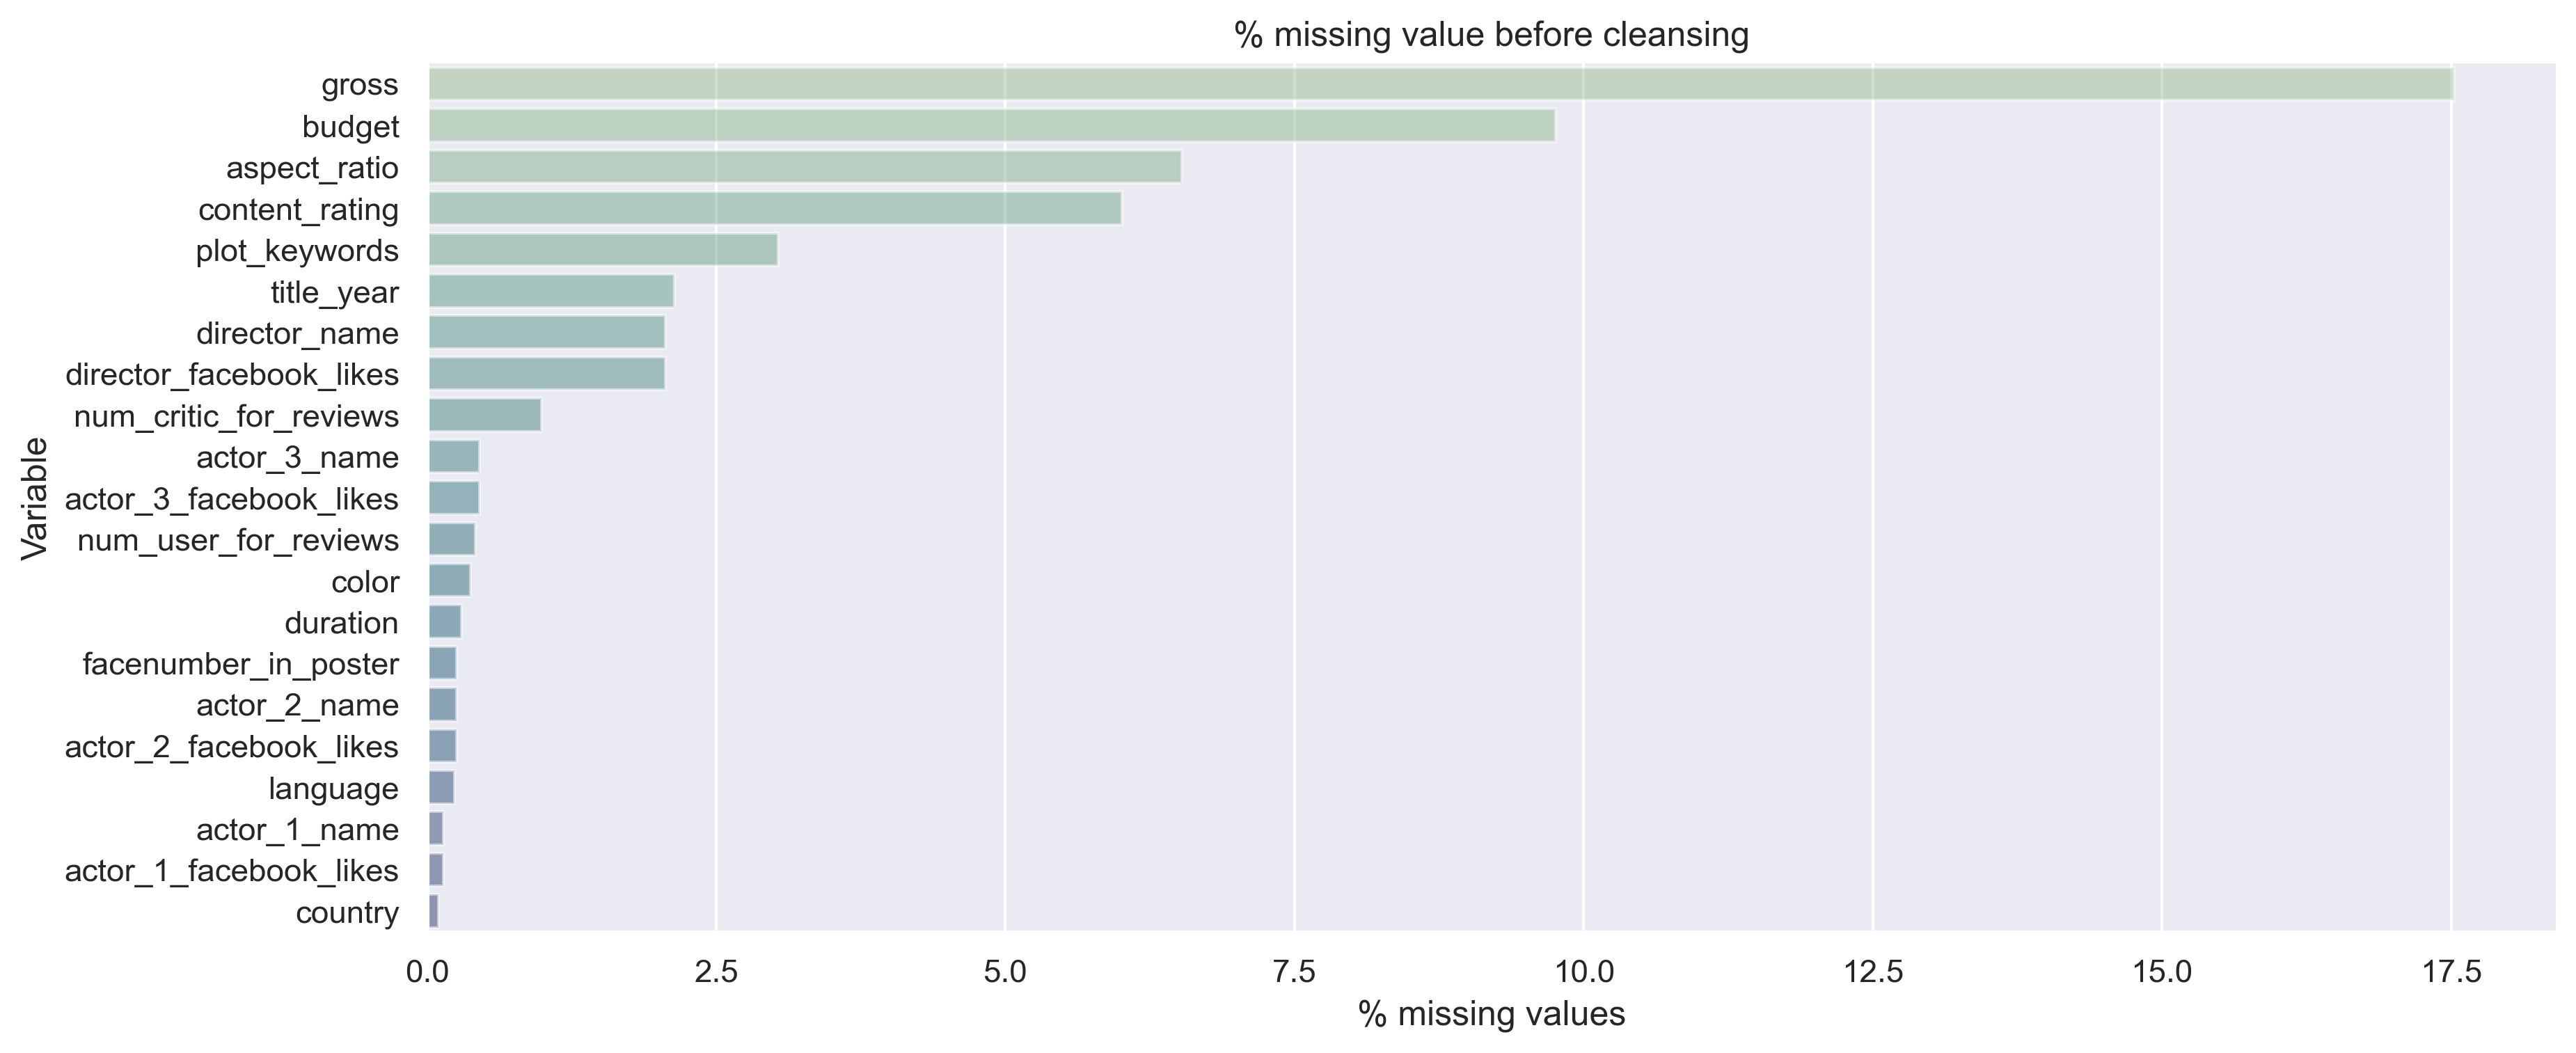

In [5]:
#*******ทำเรียง ascending >> มากไปน้อย*********
only_missing_before=Perc_Of_Missing_Values_before[Perc_Of_Missing_Values_before!=0]
df_only_missing_before = only_missing_before.reset_index()
df_only_missing_before.columns = ['variable', '% Missing']
df_only_missing_before = df_only_missing_before.sort_values(by='% Missing', ascending=False)
sns.set(rc={'figure.dpi':300})
sns.catplot(y='variable', 
            x='% Missing', 
            kind='bar',
            palette="crest", 
            data=df_only_missing_before, 
            height=5, aspect=2.5, 
            alpha=0.5,
            )
plt.title("% missing value before cleansing")
plt.xlabel("% missing values")
plt.ylabel("Variable")
plt.show()

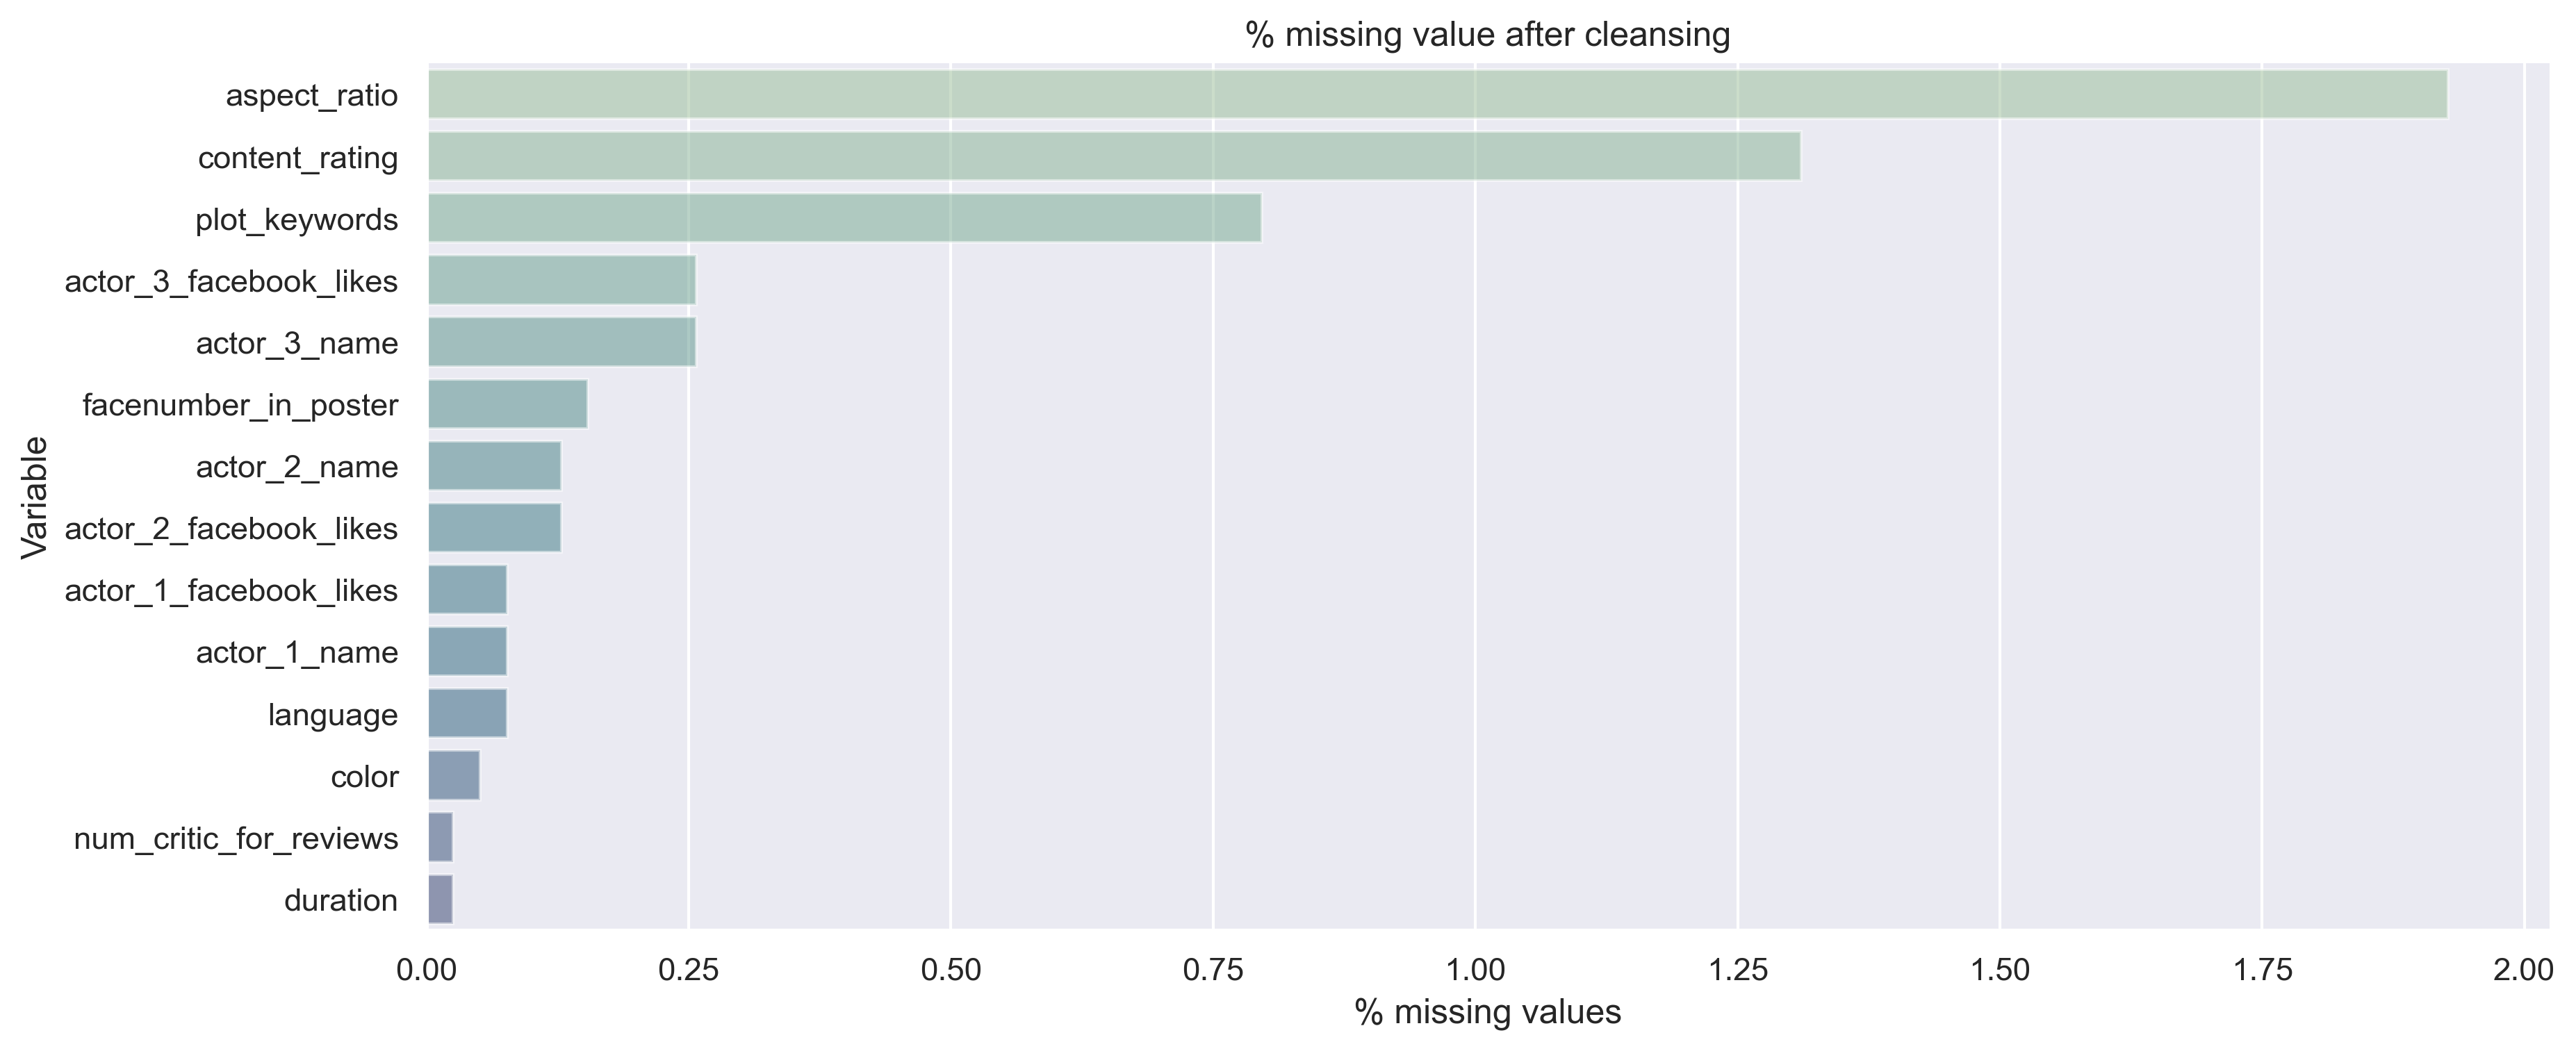

(3891, 28)

In [6]:
only_missing_after=Perc_Of_Missing_Values_after[Perc_Of_Missing_Values_after!=0]
df_only_missing_after = only_missing_after.reset_index()
df_only_missing_after.columns = ['variable', '% Missing']
df_only_missing_after = df_only_missing_after.sort_values(by='% Missing', ascending=False)
sns.set(rc={'figure.dpi':300})
sns.catplot(y='variable', 
            x='% Missing', 
            kind='bar', 
            palette="crest",
            data=df_only_missing_after, 
            height=5, aspect=2.5, 
            alpha=0.5
            )
plt.title("% missing value after cleansing")
plt.xlabel("% missing values")
plt.ylabel("Variable")
plt.show()
df.shape

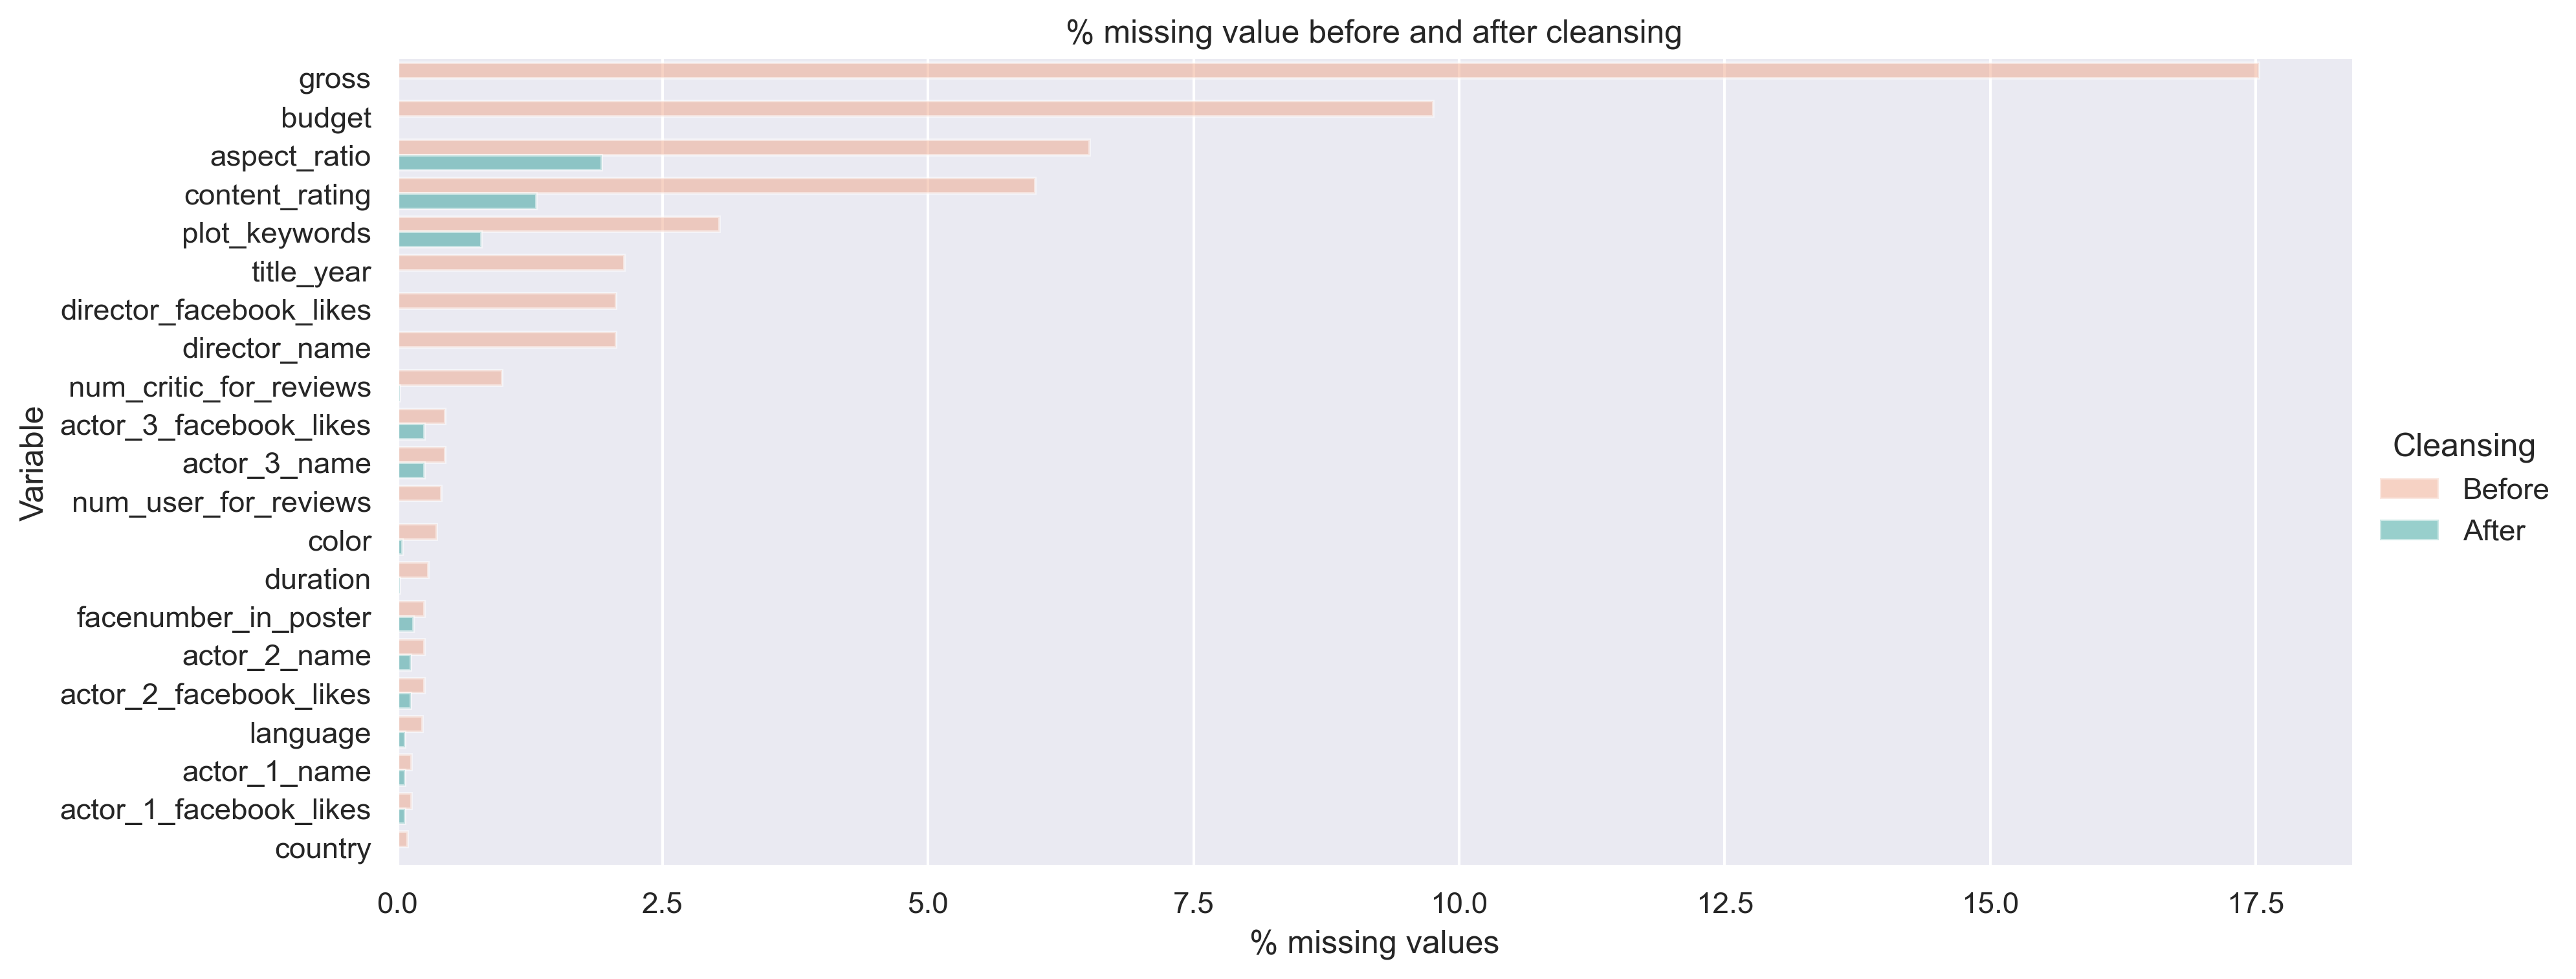

In [7]:
only_missing_before = Perc_Of_Missing_Values_before[Perc_Of_Missing_Values_before!=0]
df_only_missing_before = only_missing_before.reset_index()
df_only_missing_before.columns = ['variable', '% Missing']
df_only_missing_before['Cleansing'] = 'Before'
only_missing_after = Perc_Of_Missing_Values_after[Perc_Of_Missing_Values_after!=0]
df_only_missing_after = only_missing_after.reset_index()
df_only_missing_after.columns = ['variable', '% Missing']
df_only_missing_after['Cleansing'] = 'After'
df_combined = pd.concat([df_only_missing_before, df_only_missing_after])
df_combined = df_combined.sort_values(by='% Missing', ascending=False)
sns.catplot(y='variable', 
            x='% Missing', 
            kind='bar', 
            hue='Cleansing', 
            palette=["#FFA07A", "#20B2AA"],
            data=df_combined, 
            height=5, aspect=2.5, 
            alpha=0.5
            )
plt.title("% missing value before and after cleansing")
plt.xlabel("% missing values")
plt.ylabel("Variable")
plt.show()

ตรวจสอบข้อมูลก่อน cleansing data เนื่องจากจะเอาประเทศมาใช้งานเลยมีการ cleansing เพิ่มเติม และนำมาเปลี่ยนค่าจากอื่นมาเป็ฯ USA และเปลี่ยน west germany มาเป็น Germany ปกติ

In [8]:
#Cleansing country data
# Check Data in Country because we have to use this column
df['country'].unique()

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Germany',
       'China', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong',
       'Czech Republic', 'Peru', 'South Korea', 'India', 'Aruba',
       'Denmark', 'Belgium', 'Ireland', 'South Africa', 'Italy',
       'Romania', 'Chile', 'Netherlands', 'Hungary', 'Russia', 'Mexico',
       'Greece', 'Taiwan', 'Official site', 'Thailand', 'Iran',
       'West Germany', 'Georgia', 'Iceland', 'Brazil', 'Finland',
       'Norway', 'Argentina', 'Colombia', 'Poland', 'Israel', 'Indonesia',
       'Afghanistan', 'Sweden', 'Philippines'], dtype=object)

In [9]:
df['country'] = df['country'].replace(['Official site', 'New Line','USA'], 'United States of America').replace(['West Germany'],'Germany').replace(['UK'],'United Kingdom')

/var/folders/kg/w853qbnj03x0b8wb35_f_v540000gp/T/ipykernel_94490/195987681.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'], kde=False, color='blue',


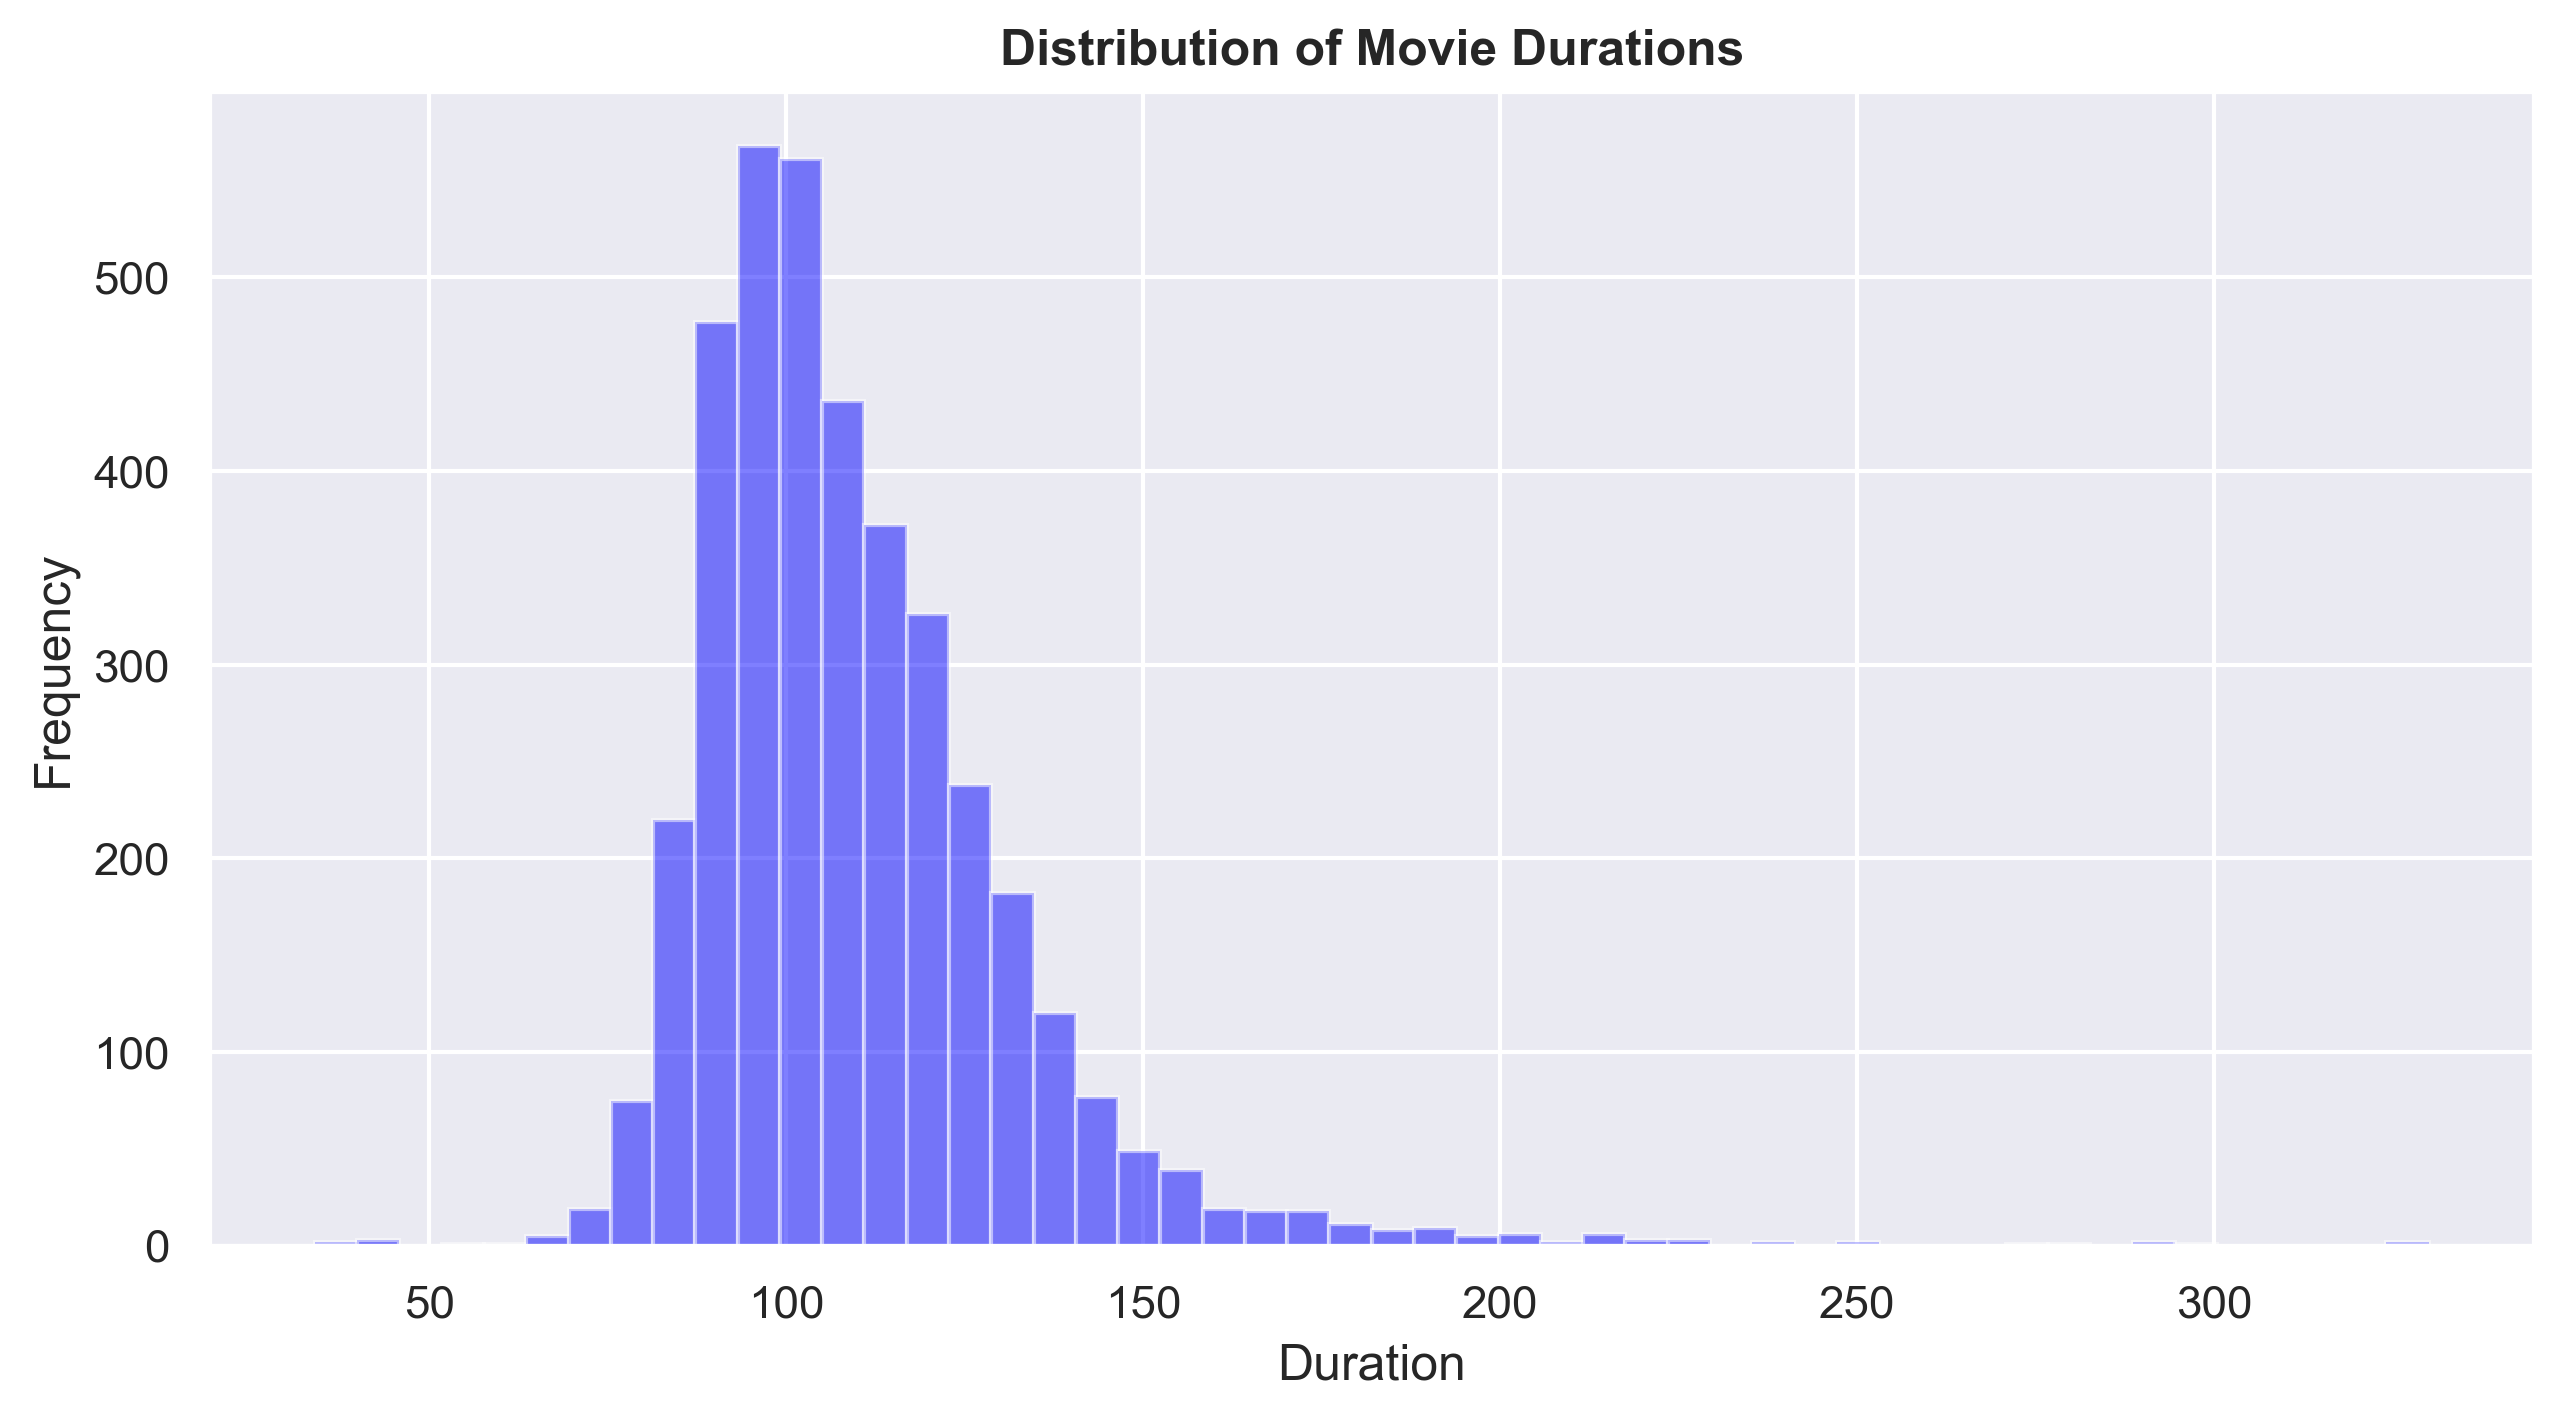

In [10]:

plt.figure(figsize=(10,5), dpi=300)
ax = plt.gca()
sns.distplot(df['duration'], kde=False, color='blue', 
            hist_kws={'alpha': 0.5},
            axlabel='Duration', 
            ax=ax,)
ax.set_xlabel('Duration')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Durations', fontweight='bold')
plt.show()


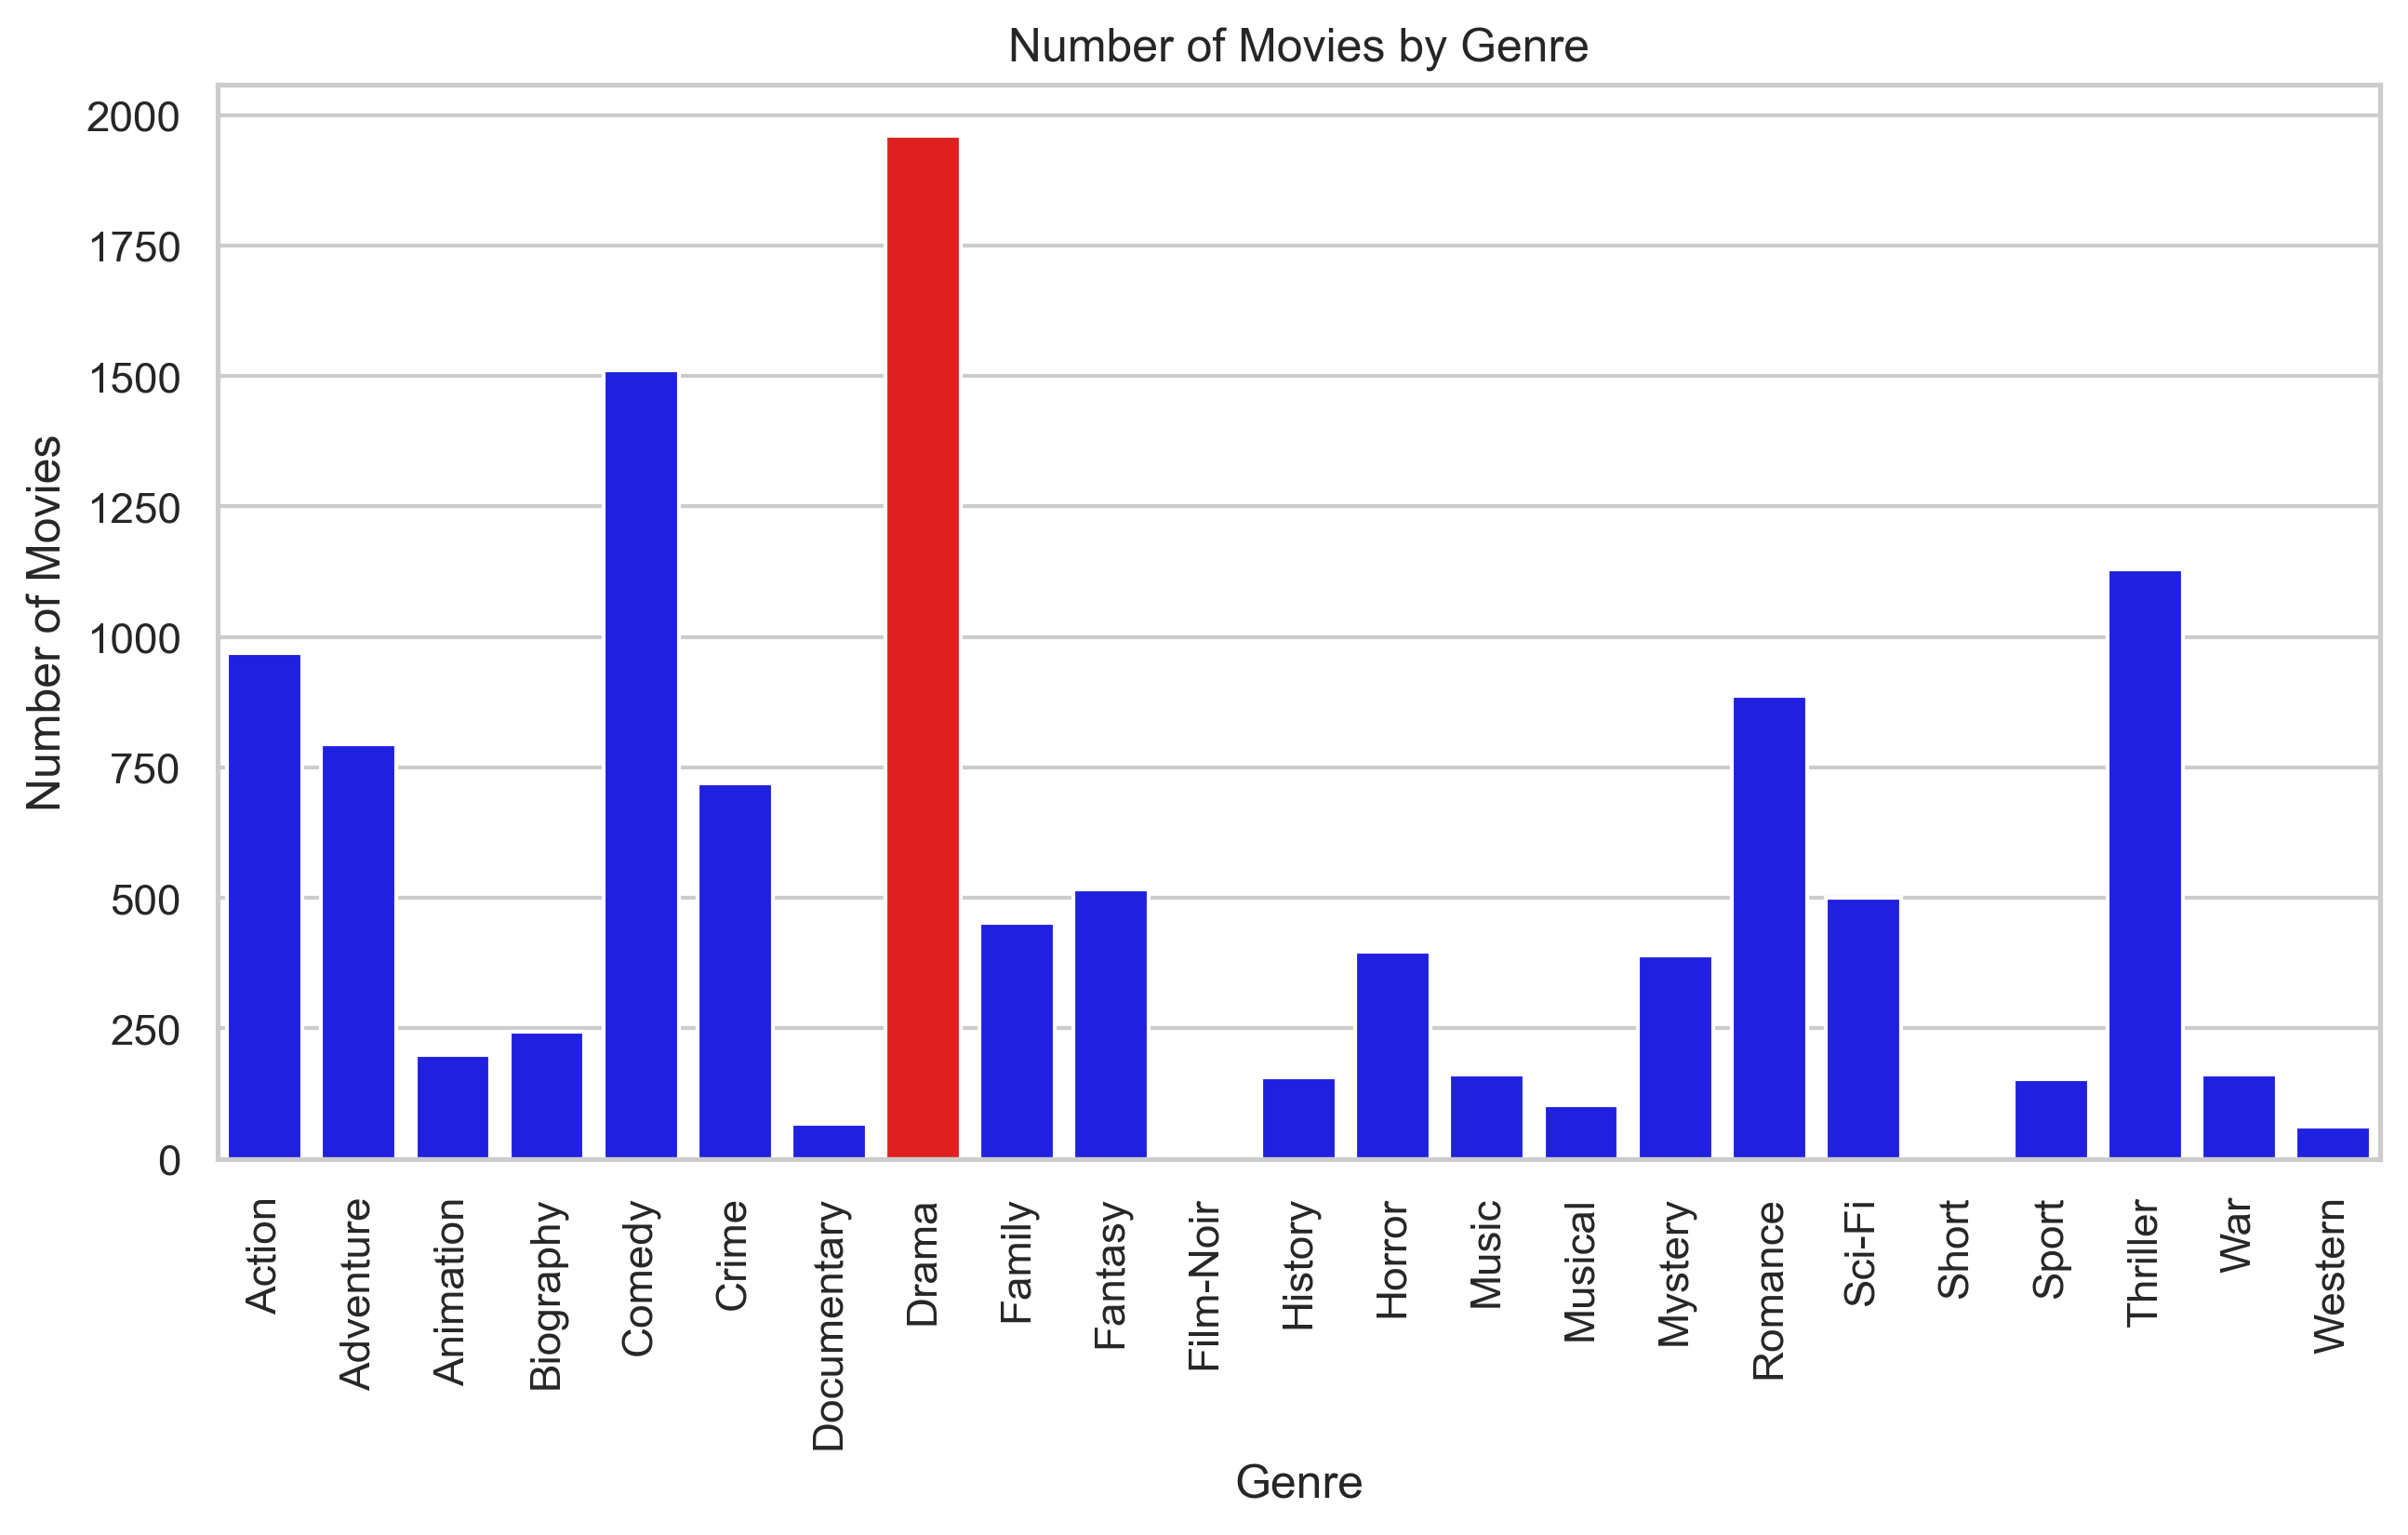

In [11]:
#เช็คประเภทหนังว่าแต่ละประเภทมีจำนวนหนังอยู่กี่เรื่อง
df['split_genres'] = df['genres'].apply(lambda x: x.split('|'))
df_explode = df.explode('split_genres')
genre_counts = df_explode.groupby('split_genres')['movie_title'].count()
max_genre = genre_counts.idxmax()
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.index, 
            y=genre_counts.values, 
            palette=['blue' if g != max_genre else 'red' for g in genre_counts.index])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.show()

/var/folders/kg/w853qbnj03x0b8wb35_f_v540000gp/T/ipykernel_94490/1128431807.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['title_year'], kde=False, color ='blue',


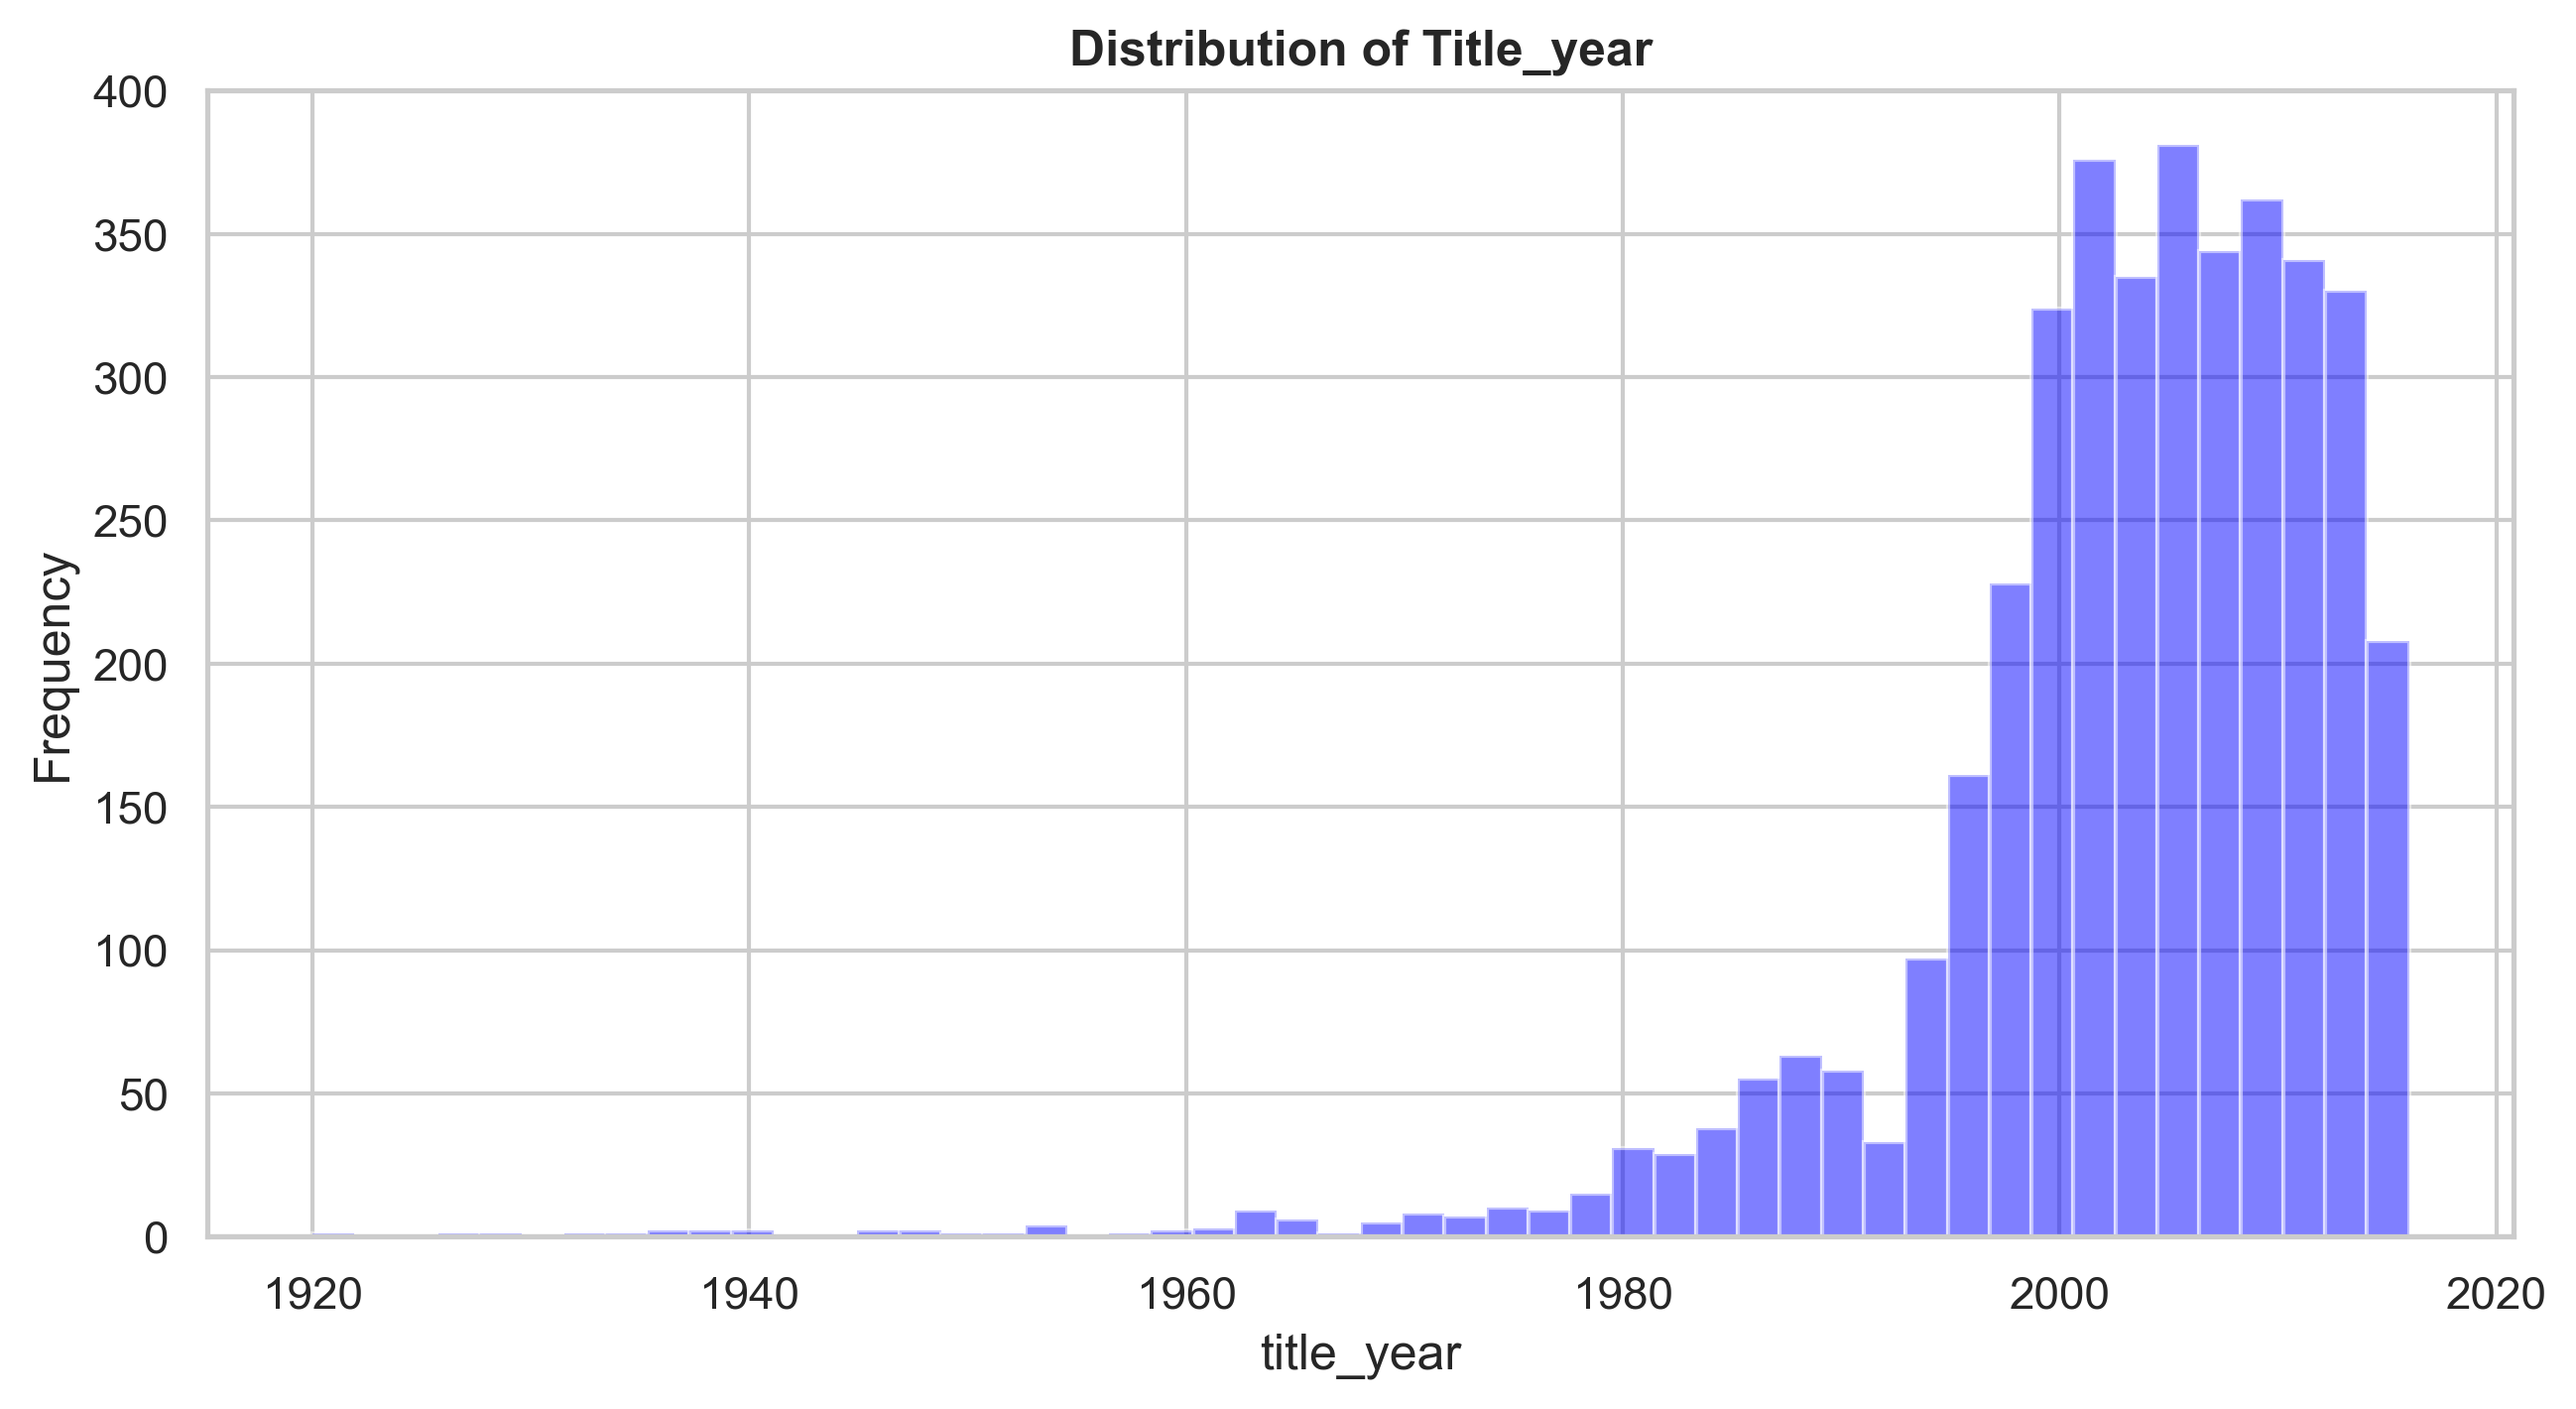

In [12]:
#แต่ละปีมีหนังถูกผลิตในปีไหนบ้าง การกระจายเป็นอย่างไร ตั้งแต่ 19xx-2016
plt.figure(figsize=(10,5), dpi=300)
ax = plt.gca()
sns.distplot(df['title_year'], kde=False, color ='blue', 
            hist_kws={'alpha': 0.5},
            axlabel='Duration', 
            ax=ax)
ax.set_xlabel('title_year')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Title_year', fontweight='bold')
plt.show()

<AxesSubplot:xlabel='content_rating', ylabel='count'>

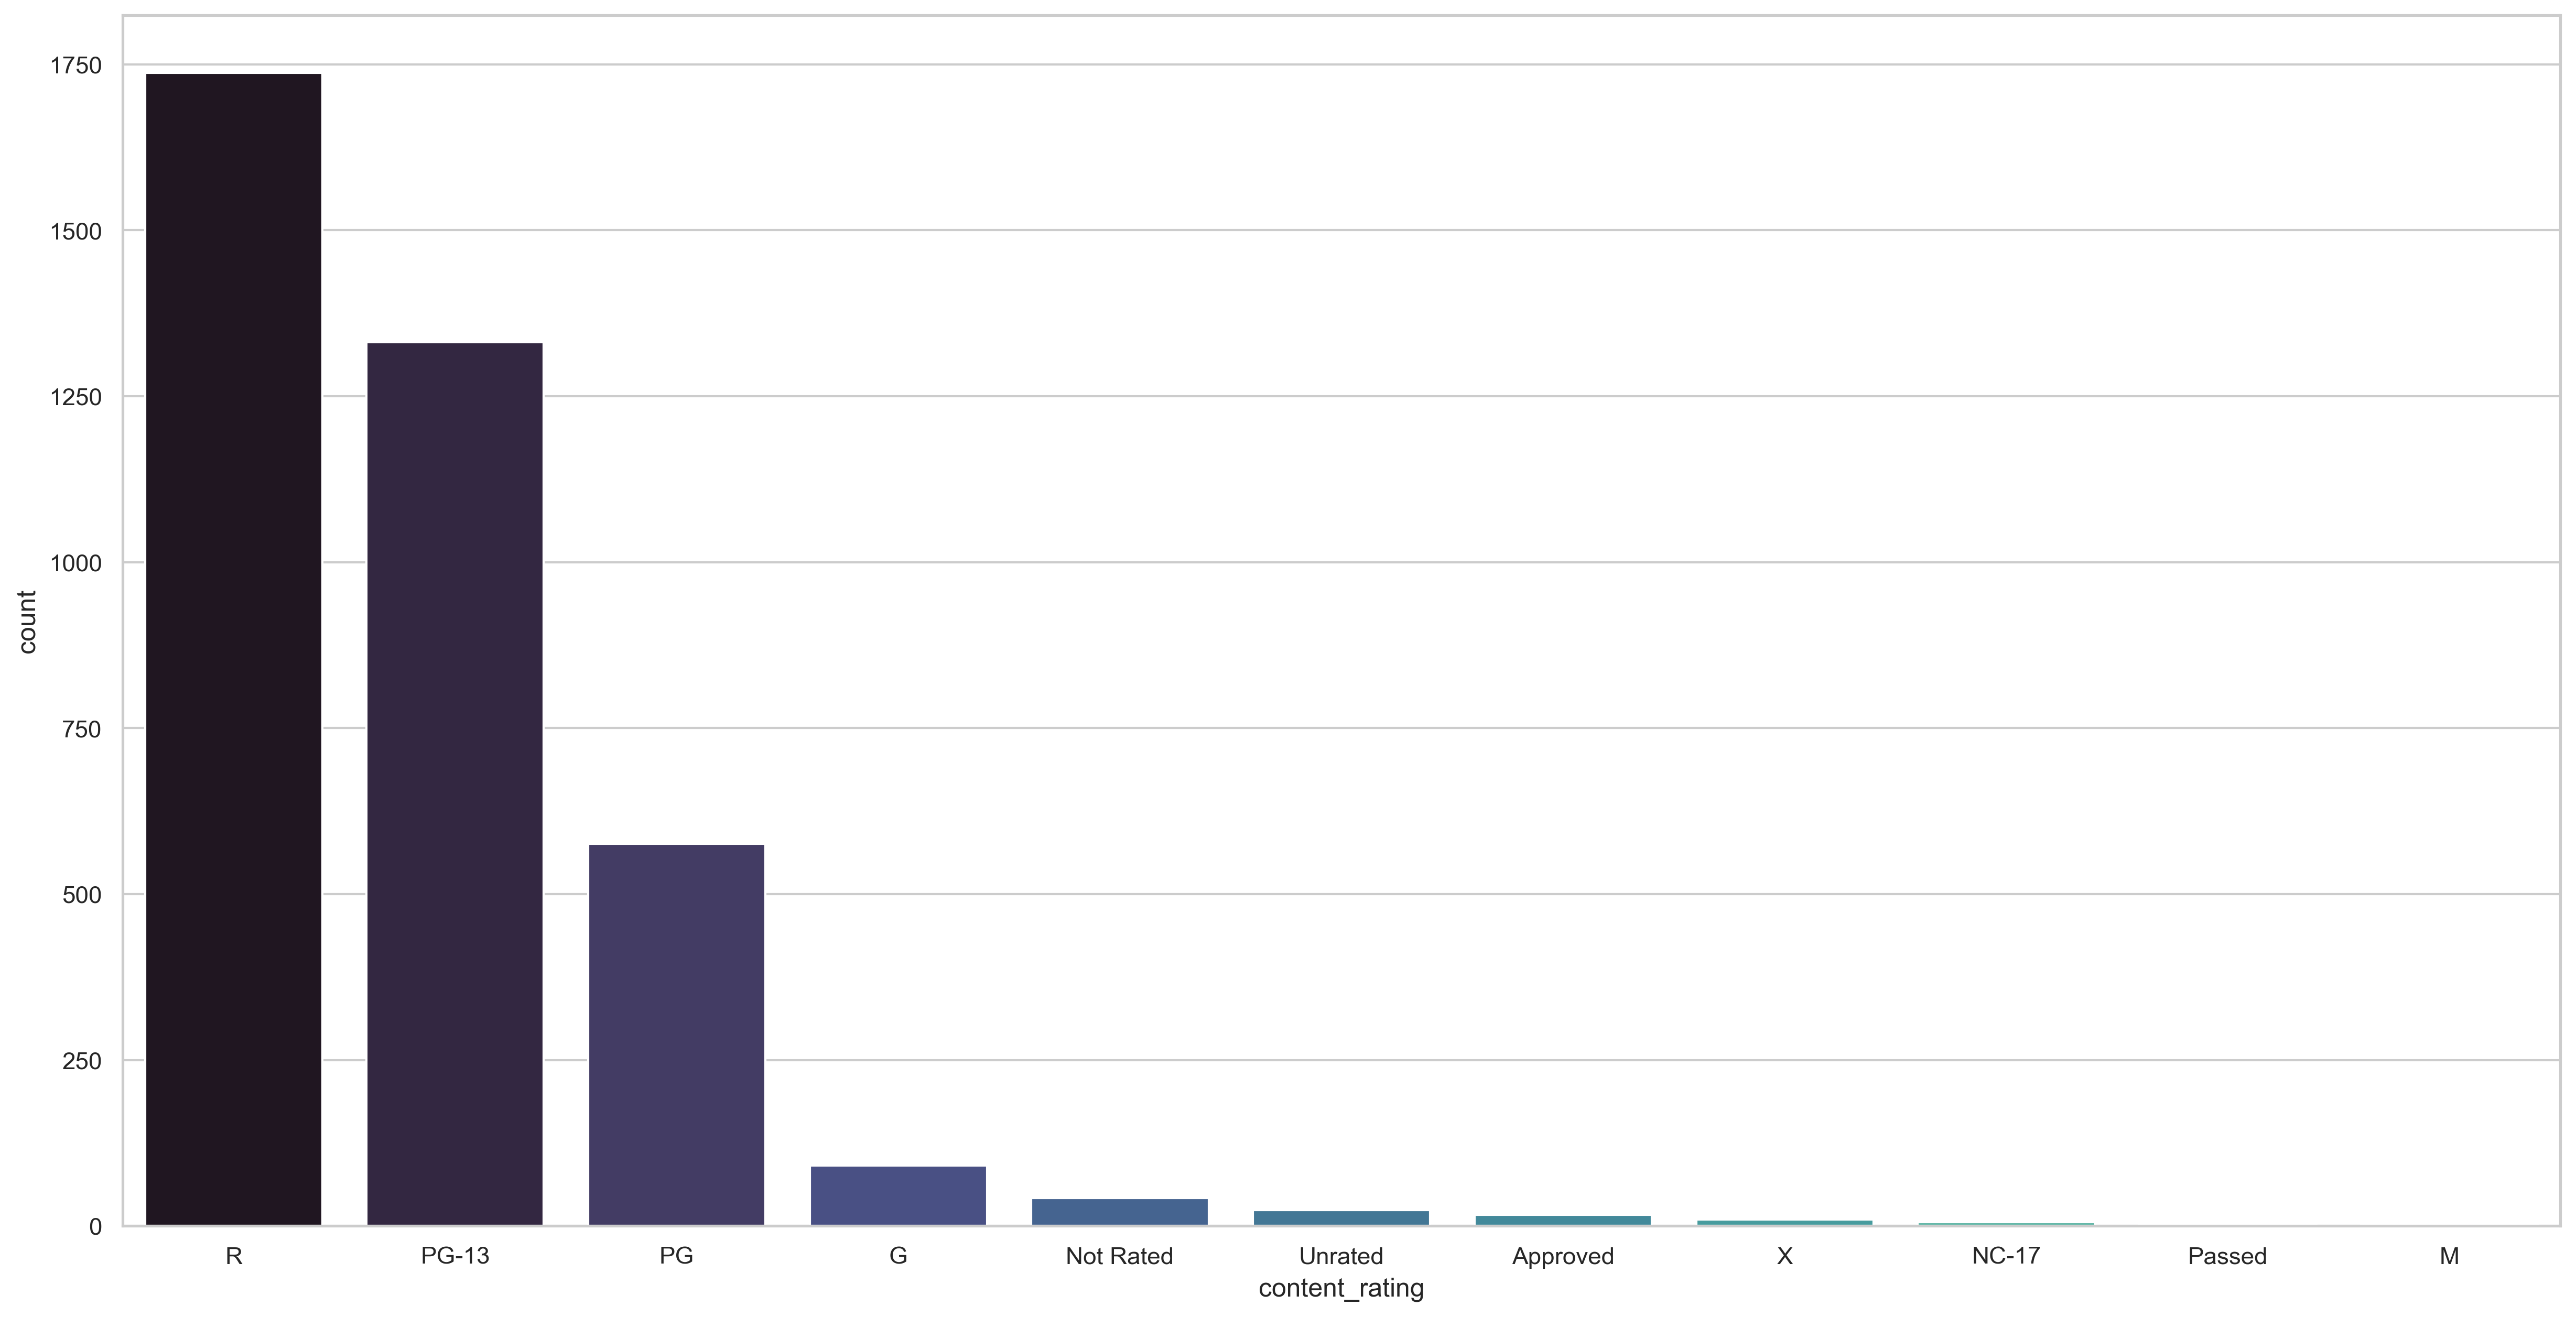

In [13]:
#นับจำนวน content rate แบบ barchart
plt.figure(figsize=(20,10))
sns.countplot(x='content_rating', order = df['content_rating'].value_counts().index[0:-1],palette ="mako",data = df)

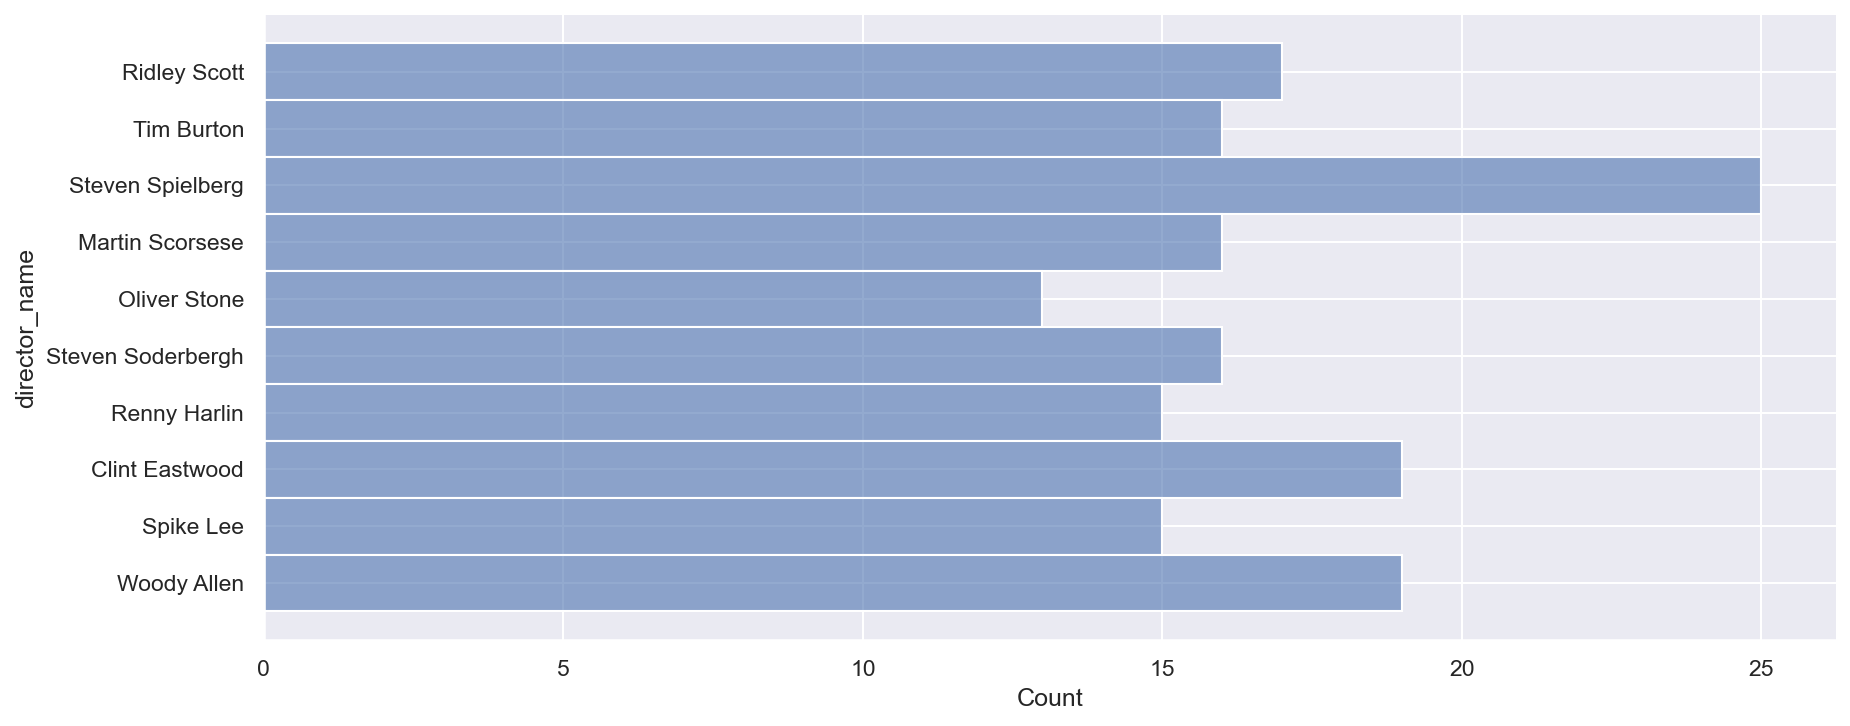

In [14]:
# จำนวนผู้ที่มีการทำหนังยอดสูงที่สุด
top_directors = df['director_name'].value_counts().head(10).index
df_top_directors = df[df['director_name'].isin(top_directors)]
sns.set(rc={'figure.dpi':150})
sns.displot( kind='hist',       # default:'hist'
             data=df_top_directors, 
             y='director_name',
             bins=20,           # default:10
             height=5, aspect=2.5,
             alpha=0.6,

          )

/var/folders/kg/w853qbnj03x0b8wb35_f_v540000gp/T/ipykernel_94490/901814355.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['imdb_score'], kde=False, color='red',


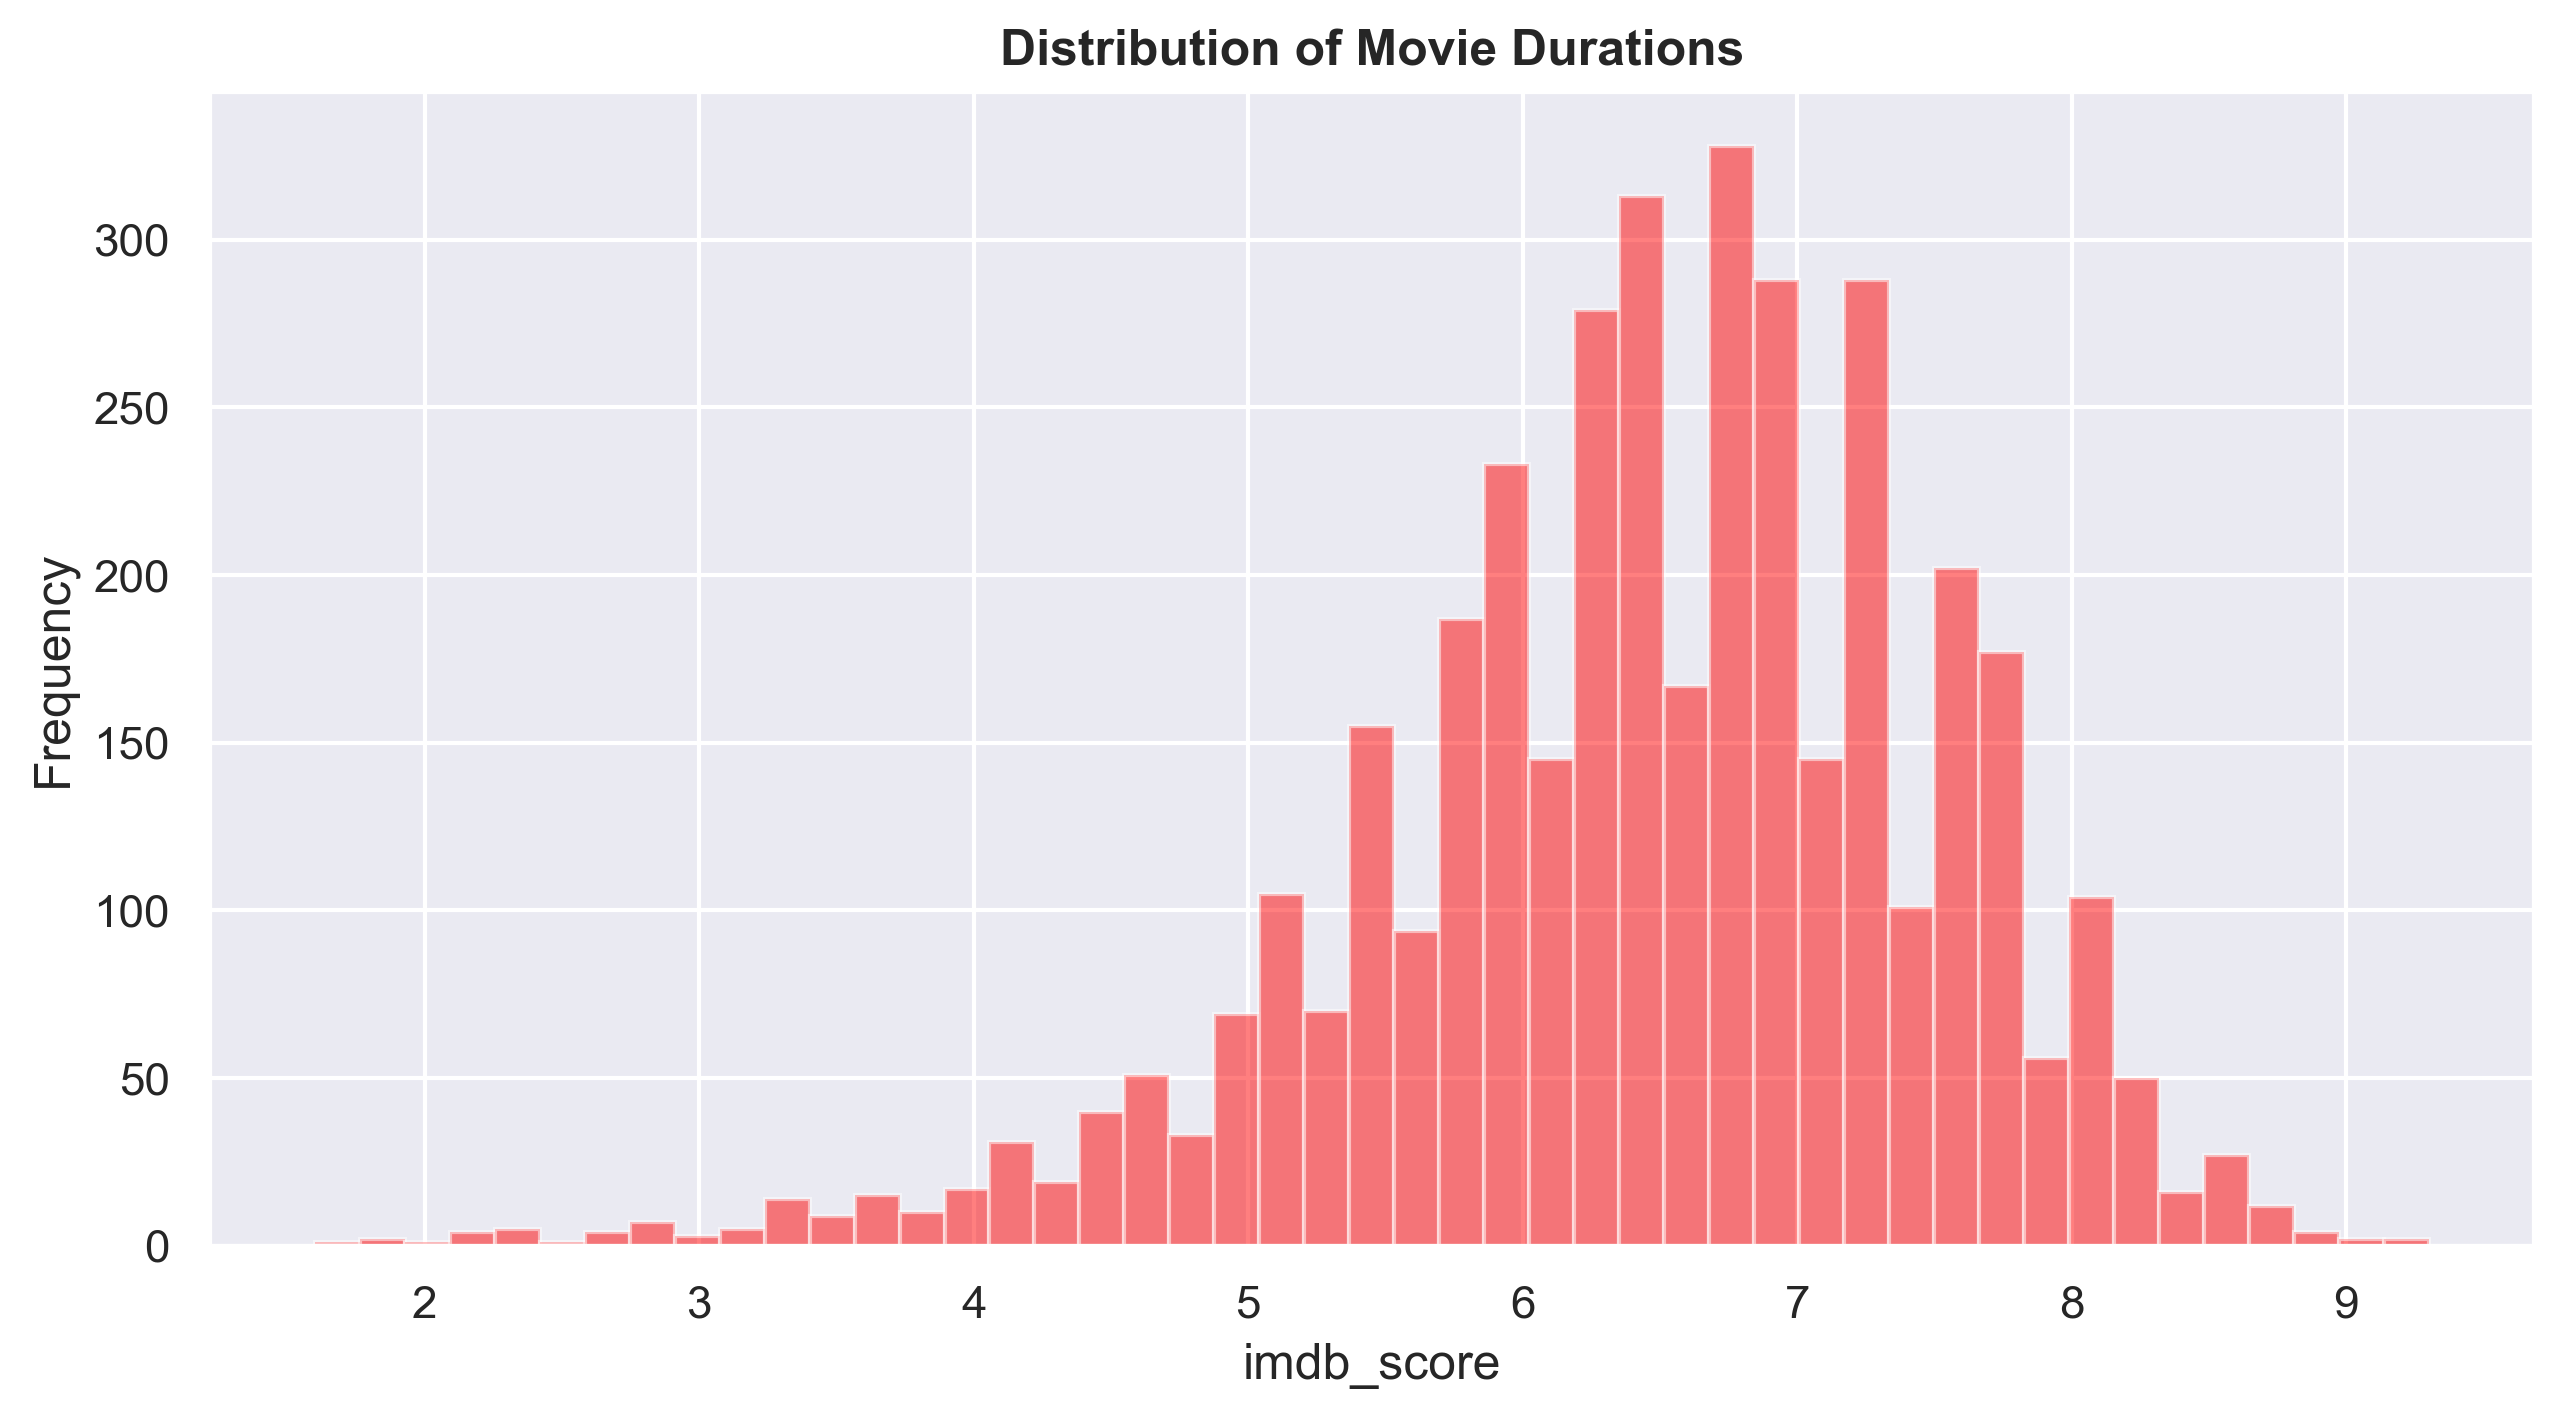

In [15]:
#ดูการกระจายตัวของscore หนังทั้งหมด ว่ามีคะแนนอยู่ในช่วงใด
plt.figure(figsize=(10,5), dpi=300)
ax = plt.gca()
sns.distplot(df['imdb_score'], kde=False, color='red', 
            hist_kws={'alpha': 0.5},
            axlabel='imdb_score', 
            ax=ax)
ax.set_xlabel('imdb_score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Durations', fontweight='bold')
plt.show()

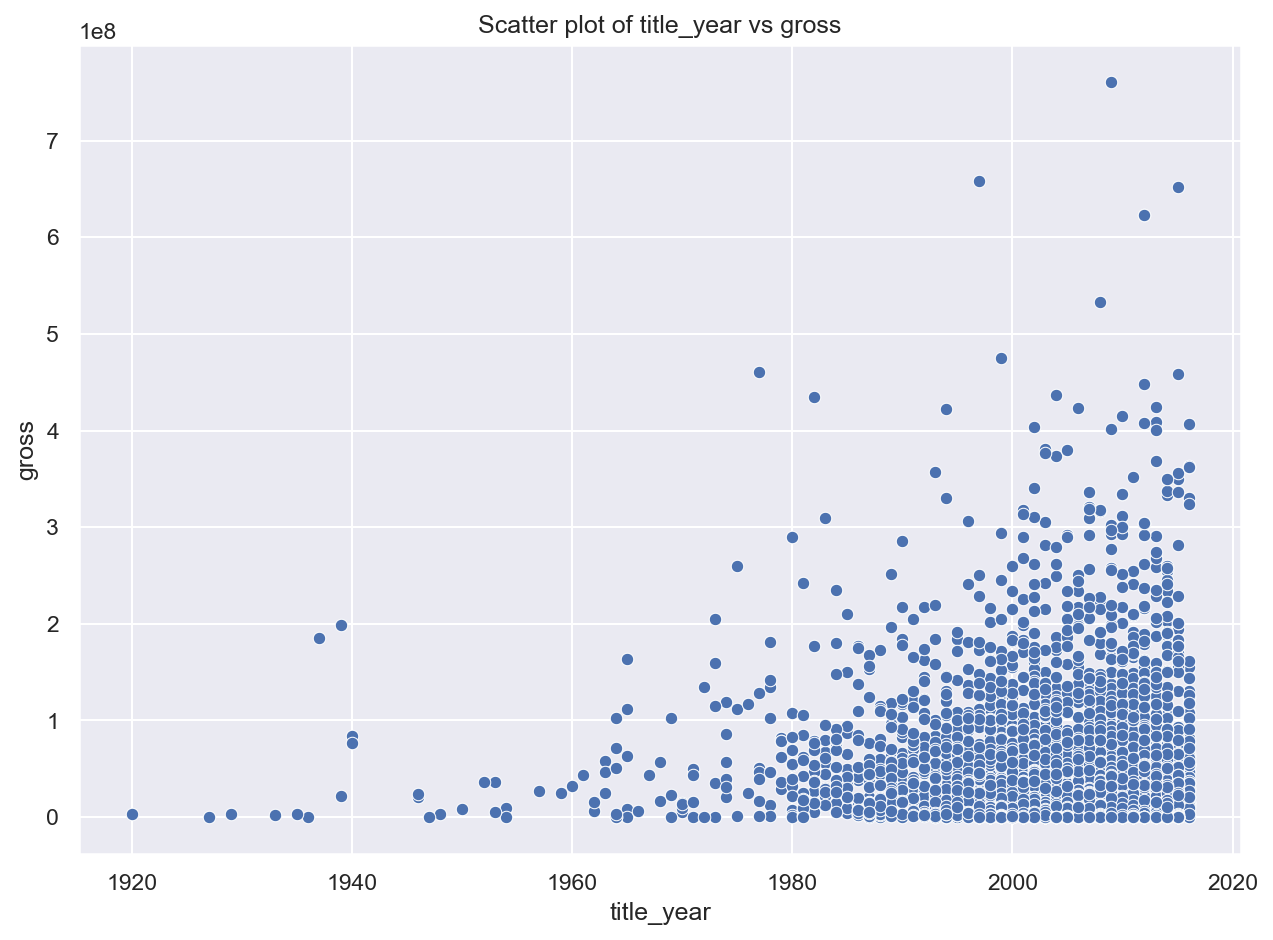

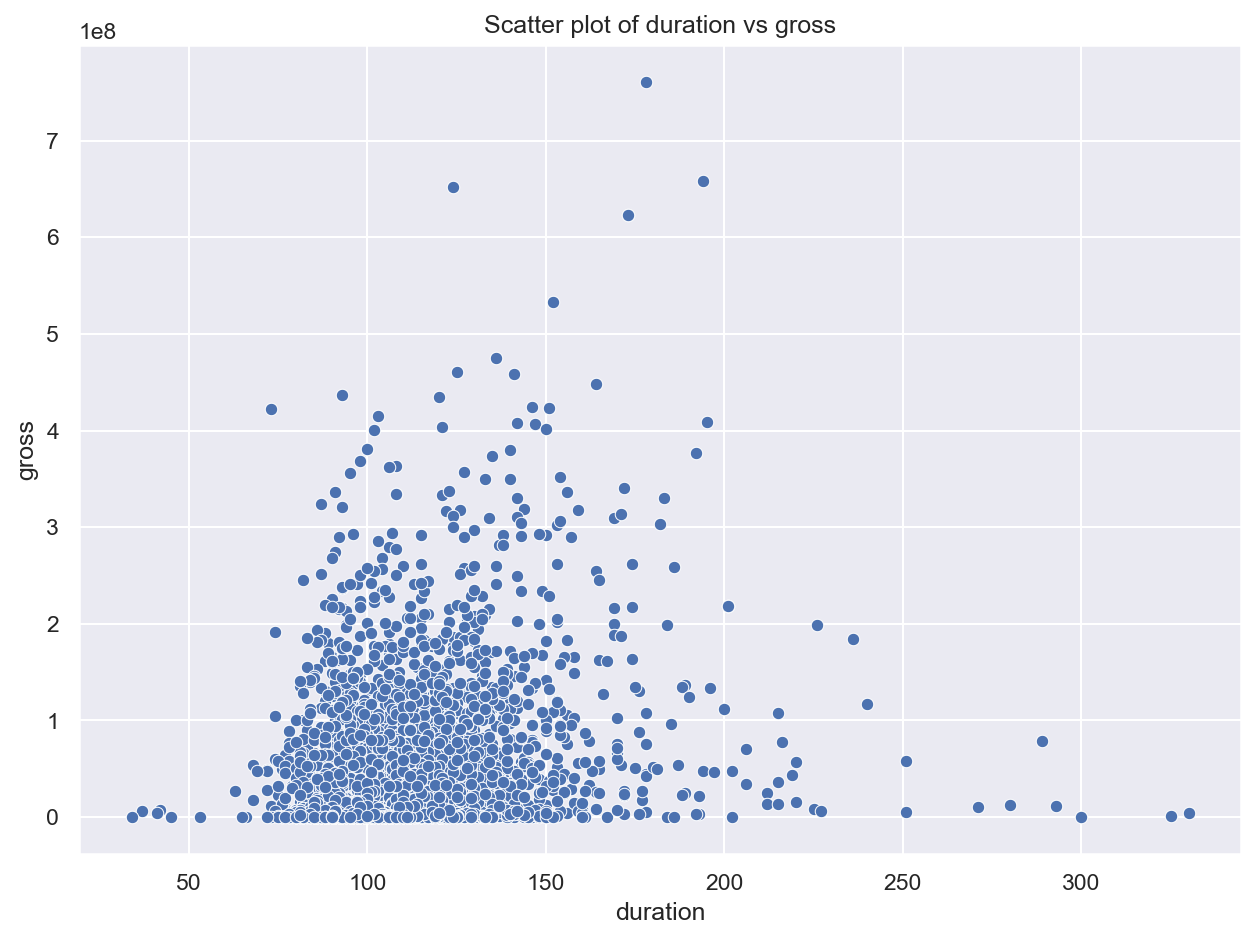

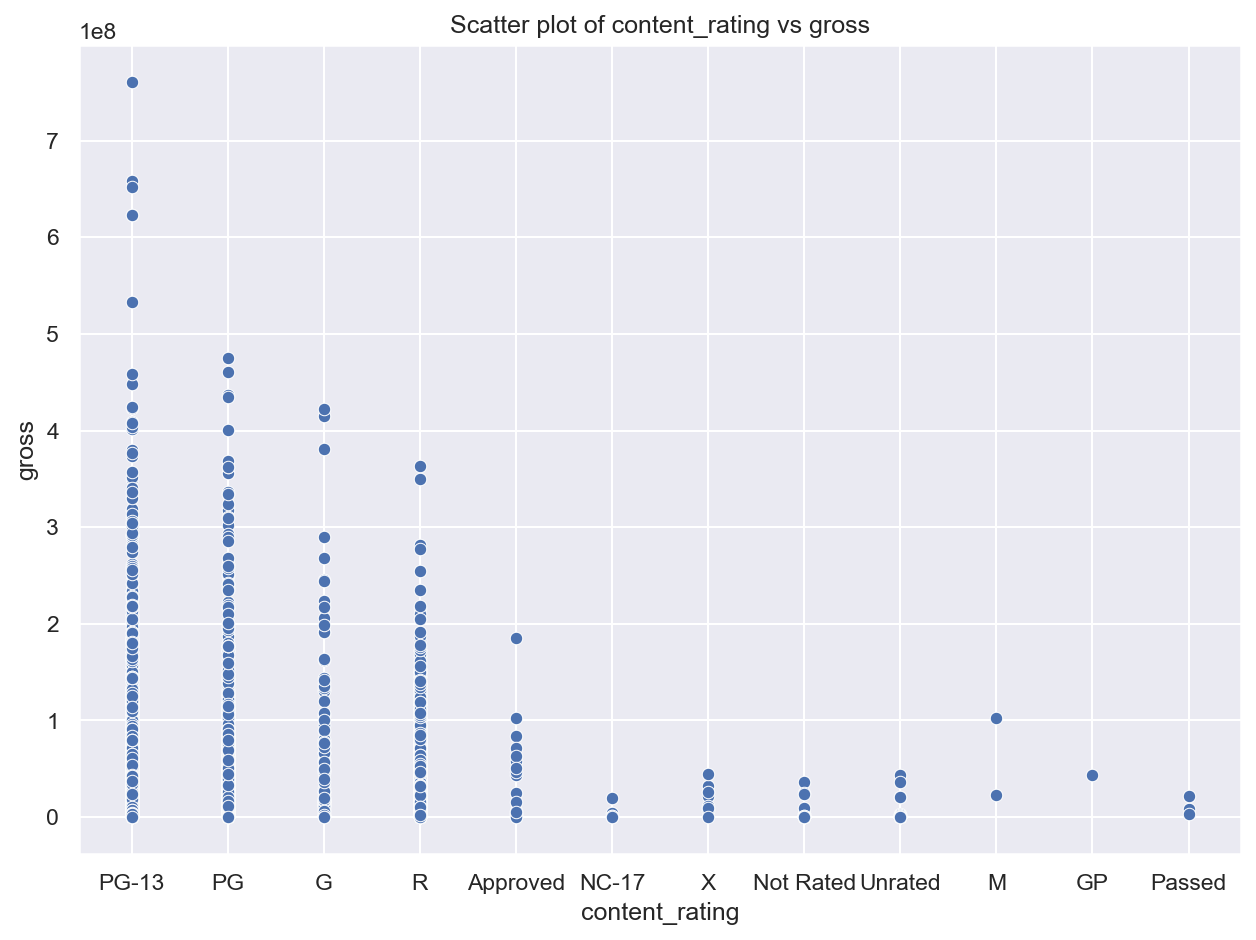

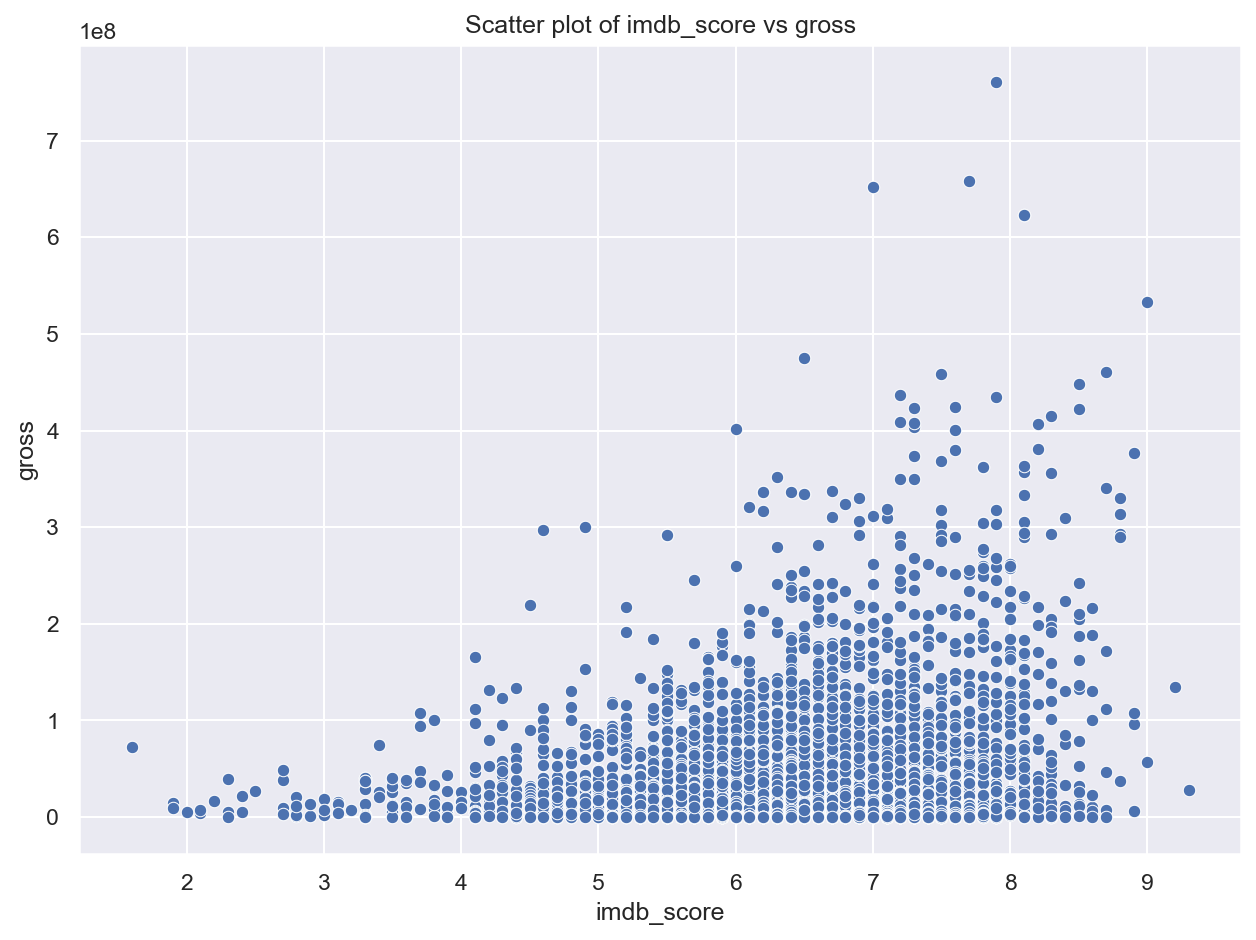

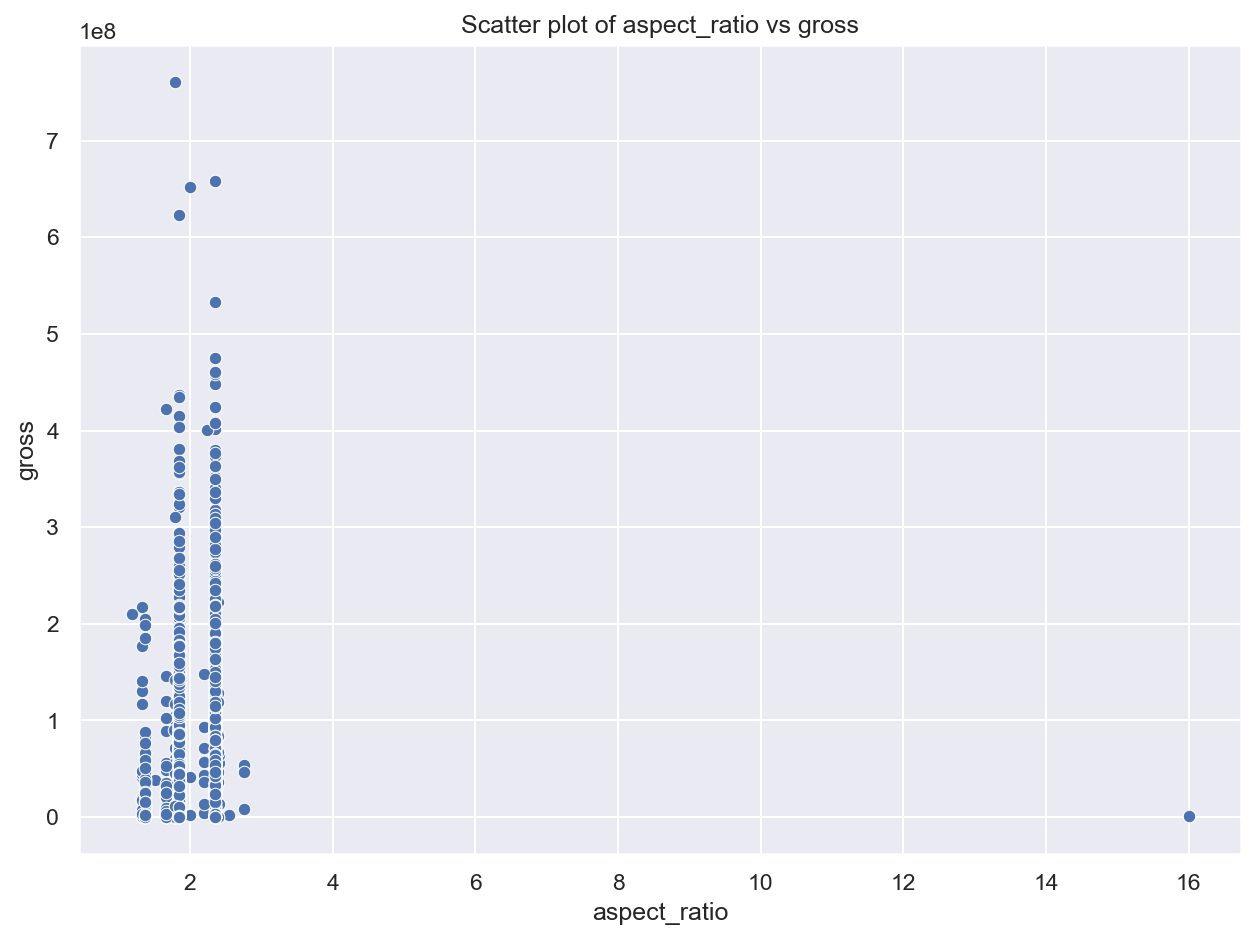

In [16]:
#plot สำหรับการเช็คว่ามีตัวแปรใดบ้างที่มีผลกับ Gross
datawithgross = ["title_year", "duration", "content_rating", "imdb_score", "aspect_ratio"]

for a in datawithgross:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=a, y="gross", data=df, alpha=1)
    plt.title("Scatter plot of {} vs gross".format(a))
    plt.show()

In [17]:
df_select = df.drop(['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','cast_total_facebook_likes','facenumber_in_poster','movie_imdb_link','num_user_for_reviews','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes'], axis=1)

In [18]:
df_select.sort_values('imdb_score', ascending=False )['imdb_score'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7,
       6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5, 5.4,
       5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1,
       4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. , 2.9, 2.8,
       2.7, 2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.6])

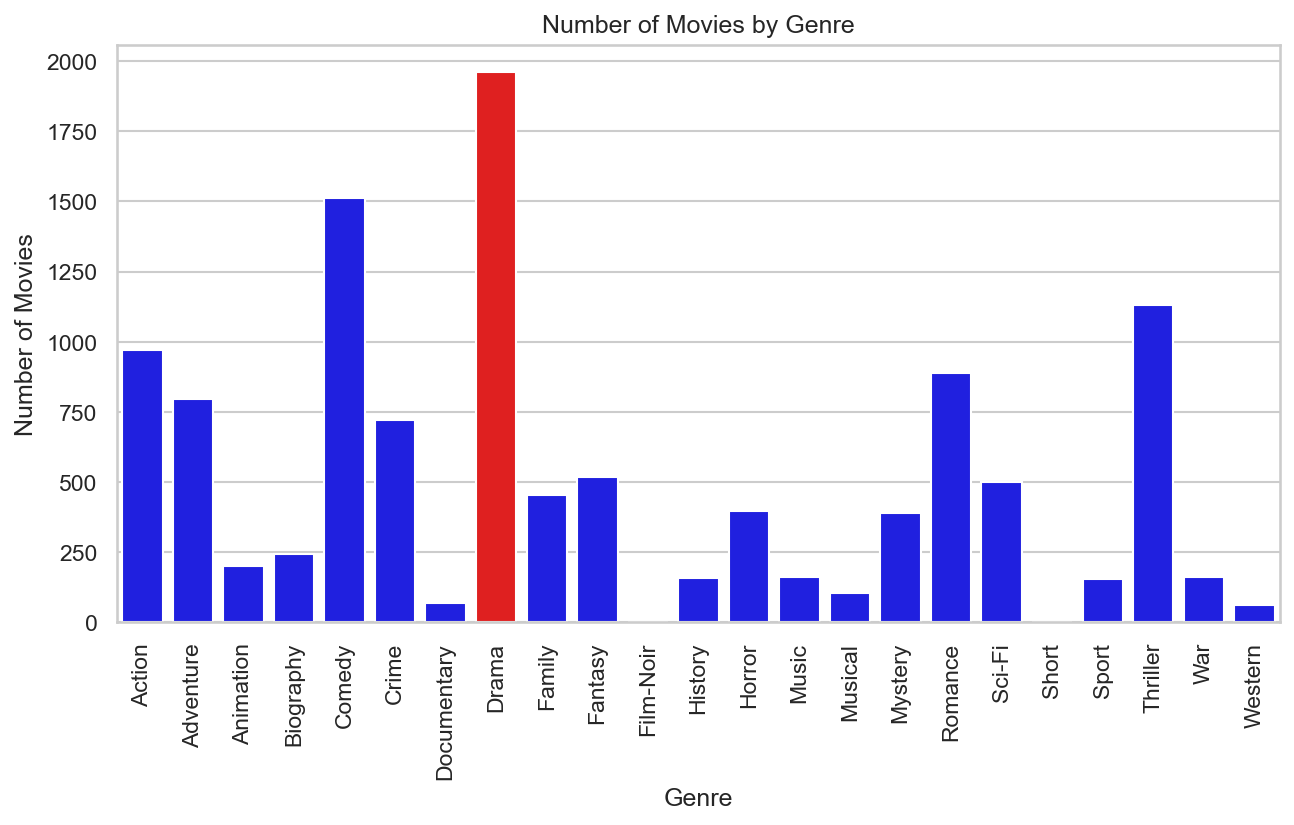

In [19]:
#เช็คประเภทหนังว่าแต่ละประเภทมีจำนวนหนังอยู่กี่เรื่อง
df['split_genres'] = df['genres'].apply(lambda x: x.split('|'))
df_explode = df.explode('split_genres')
genre_counts = df_explode.groupby('split_genres')['movie_title'].count()
max_genre = genre_counts.idxmax()
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.index, 
            y=genre_counts.values, 
            palette=['blue' if g != max_genre else 'red' for g in genre_counts.index])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.show()


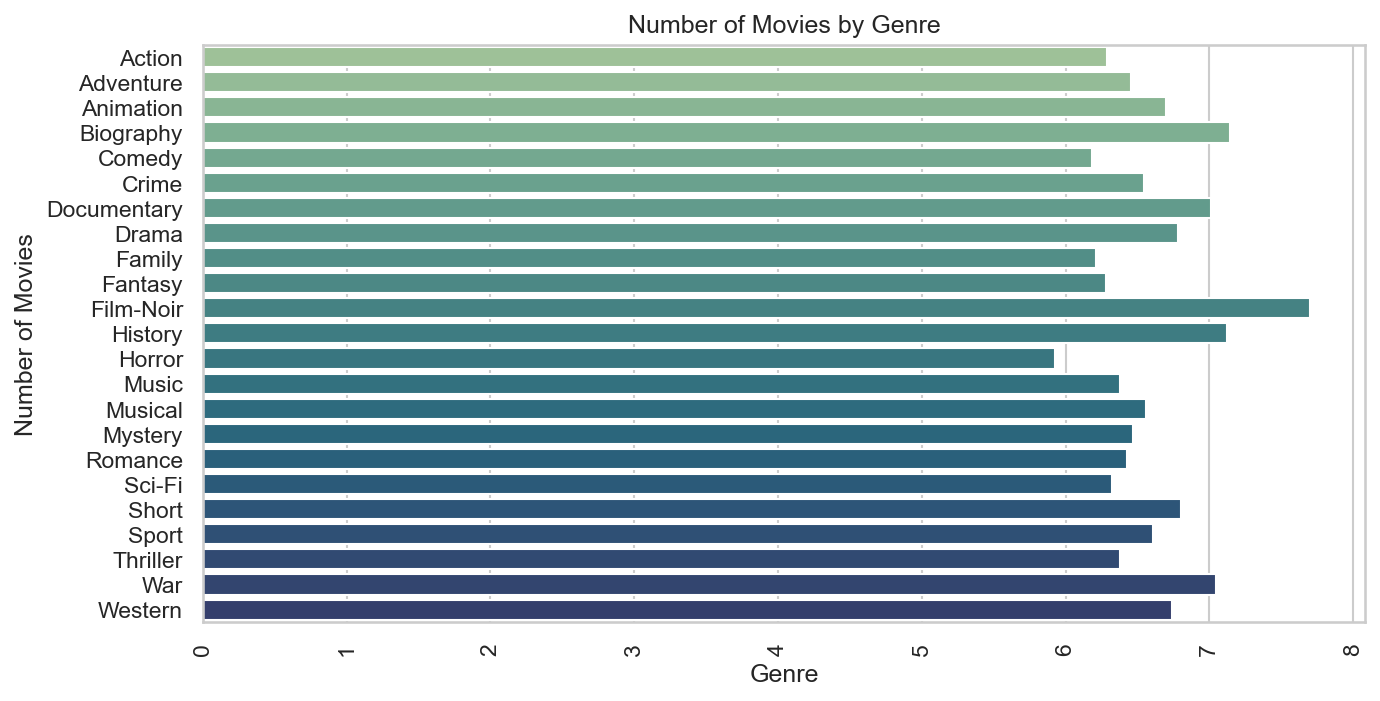

In [20]:
#เปลี่ยนให้ดูง่ายขึ้น
genre_mean = df_explode.groupby('split_genres')['imdb_score'].mean()
genre_mean
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(y=genre_mean.index, 
            x=genre_mean.values,
            palette="crest" )
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.show()

In [21]:
#2. หนังประเภทไหน มีbudget ในการทำสูง
df2_split = df['genres'].str.split('|', expand=True)
df2_split


0          1         2        3         4     5     6     7
0          Action  Adventure   Fantasy   Sci-Fi      None  None  None  None
1          Action  Adventure   Fantasy     None      None  None  None  None
2          Action  Adventure  Thriller     None      None  None  None  None
3          Action   Thriller      None     None      None  None  None  None
4          Action  Adventure    Sci-Fi     None      None  None  None  None
...           ...        ...       ...      ...       ...   ...   ...   ...
3886        Drama     Sci-Fi  Thriller     None      None  None  None  None
3887     Thriller       None      None     None      None  None  None  None
3888       Action      Crime     Drama  Romance  Thriller  None  None  None
3889       Comedy      Drama      None     None      None  None  None  None
3890  Documentary       None      None     None      None  None  None  None

[3891 rows x 8 columns]

In [22]:
column_data.unique()

NameError: name 'column_data' is not defined

country
Brazil          7.760000
Iran            7.725000
Argentina       7.600000
Indonesia       7.600000
Sweden          7.600000
Netherlands     7.566667
Israel          7.500000
Colombia        7.500000
New Zealand     7.481818
South Africa    7.433333
Afghanistan     7.400000
Italy           7.345455
Denmark         7.233333
Finland         7.200000
Taiwan          7.150000
Norway          7.150000
China           7.073333
Mexico          6.990909
Ireland         6.985714
Spain           6.972727
Name: imdb_score, dtype: float64


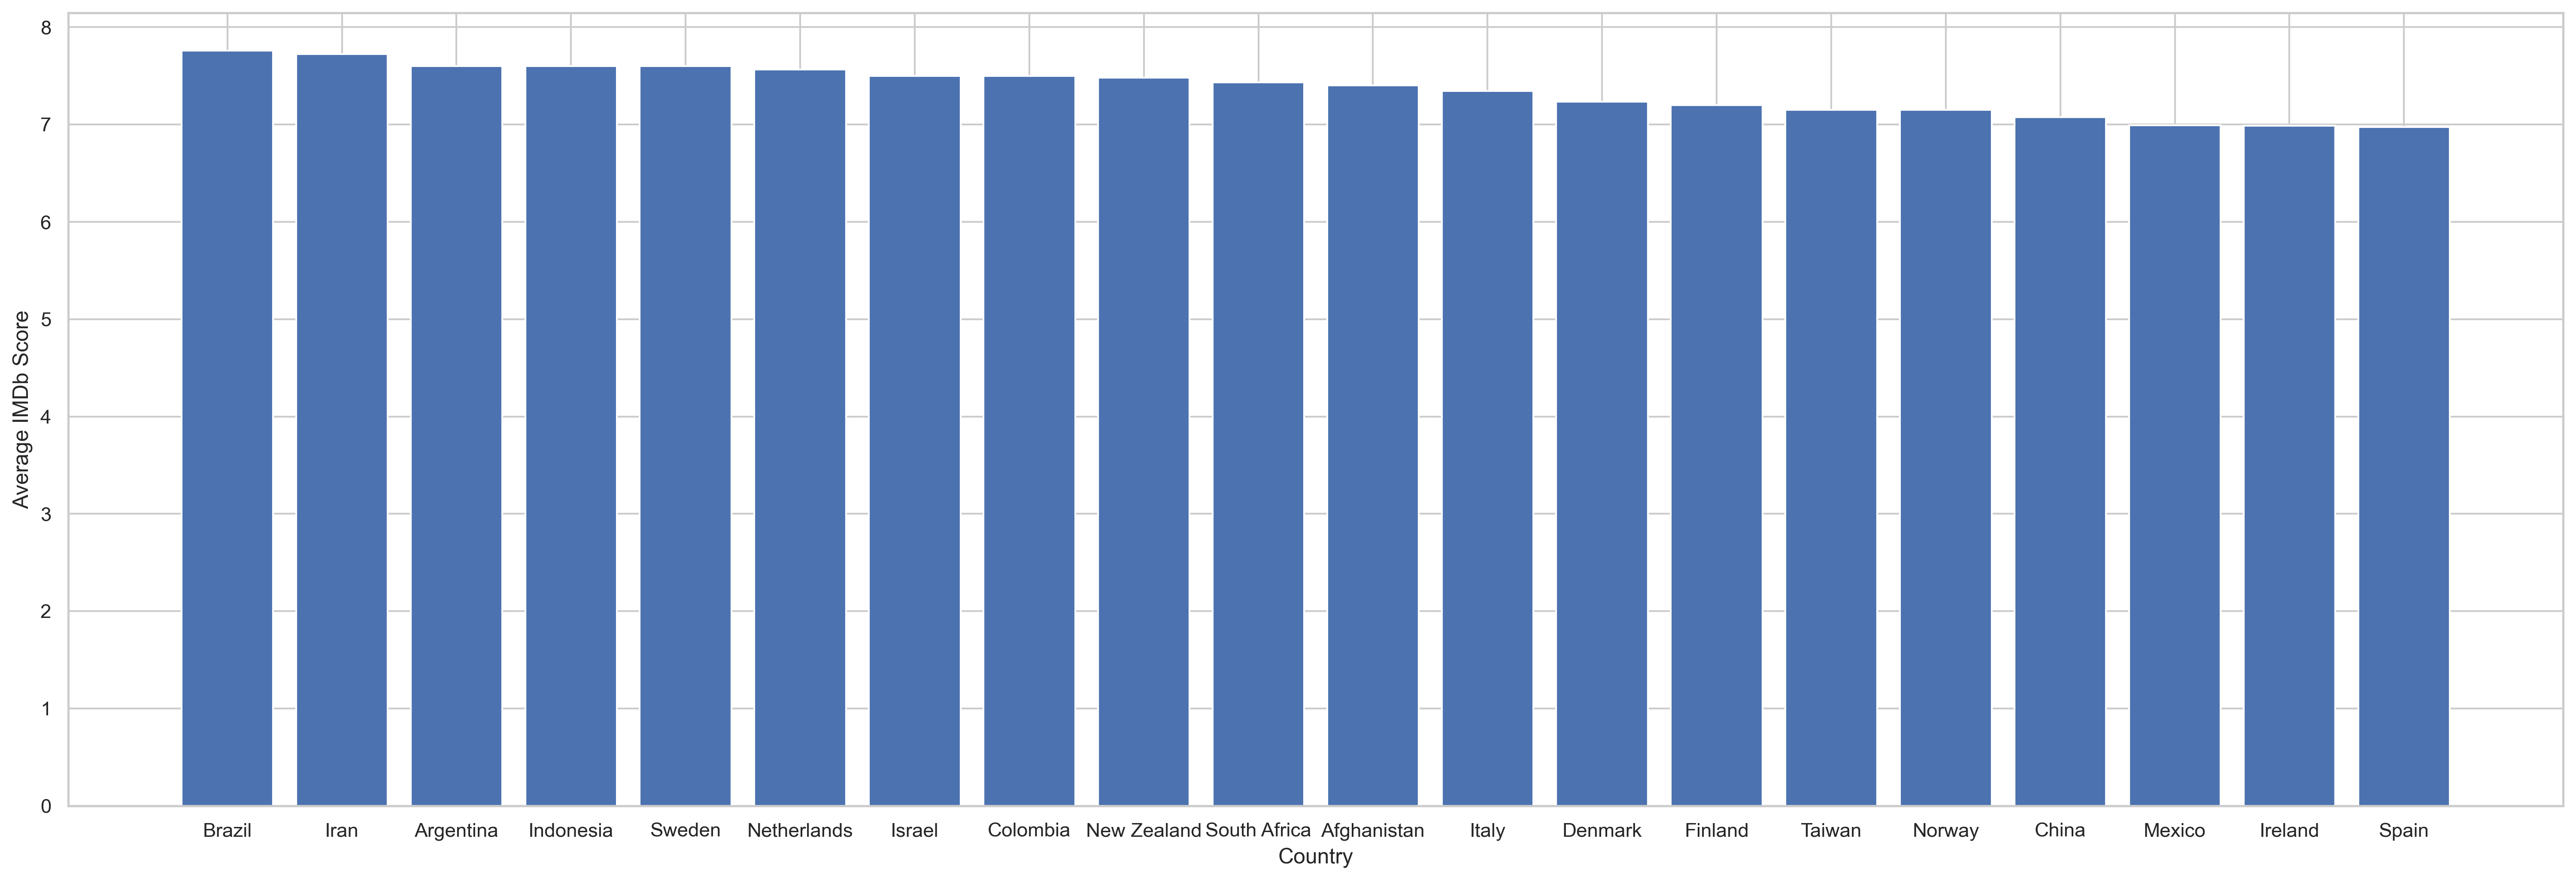

In [ ]:
# หาประเภทที่มีจำนวน IMDb score สูงที่สุด
p_country = df.groupby('country')['imdb_score'].mean()
p_country = p_country.sort_values(ascending=False).head(20)
# p_country.plot(kind='bar', figsize=(20, 10))
# plt.title('Average IMDb Scores by Country')
# plt.xlabel('Country')
# plt.ylabel('Average IMDb Score')
# plt.show()
# p_country = df.loc[:,['country','imdb_score']]
# p_country = p_country.groupby( ['country'] )
# print(p_country)

# grouped = p_country.groupby( ['country'] )
# print(grouped.size, end='\n\n' )
# grouped.plot()
# (Optional) Figure setting
plt.figure(figsize=(25,8),dpi=300)

# Plot
plt.bar( x=p_country.index, height=p_country )

plt.xlabel('Country')                  # Add label to x-axis
plt.ylabel('Average IMDb Score') # Add label to y-axis
print(p_country)

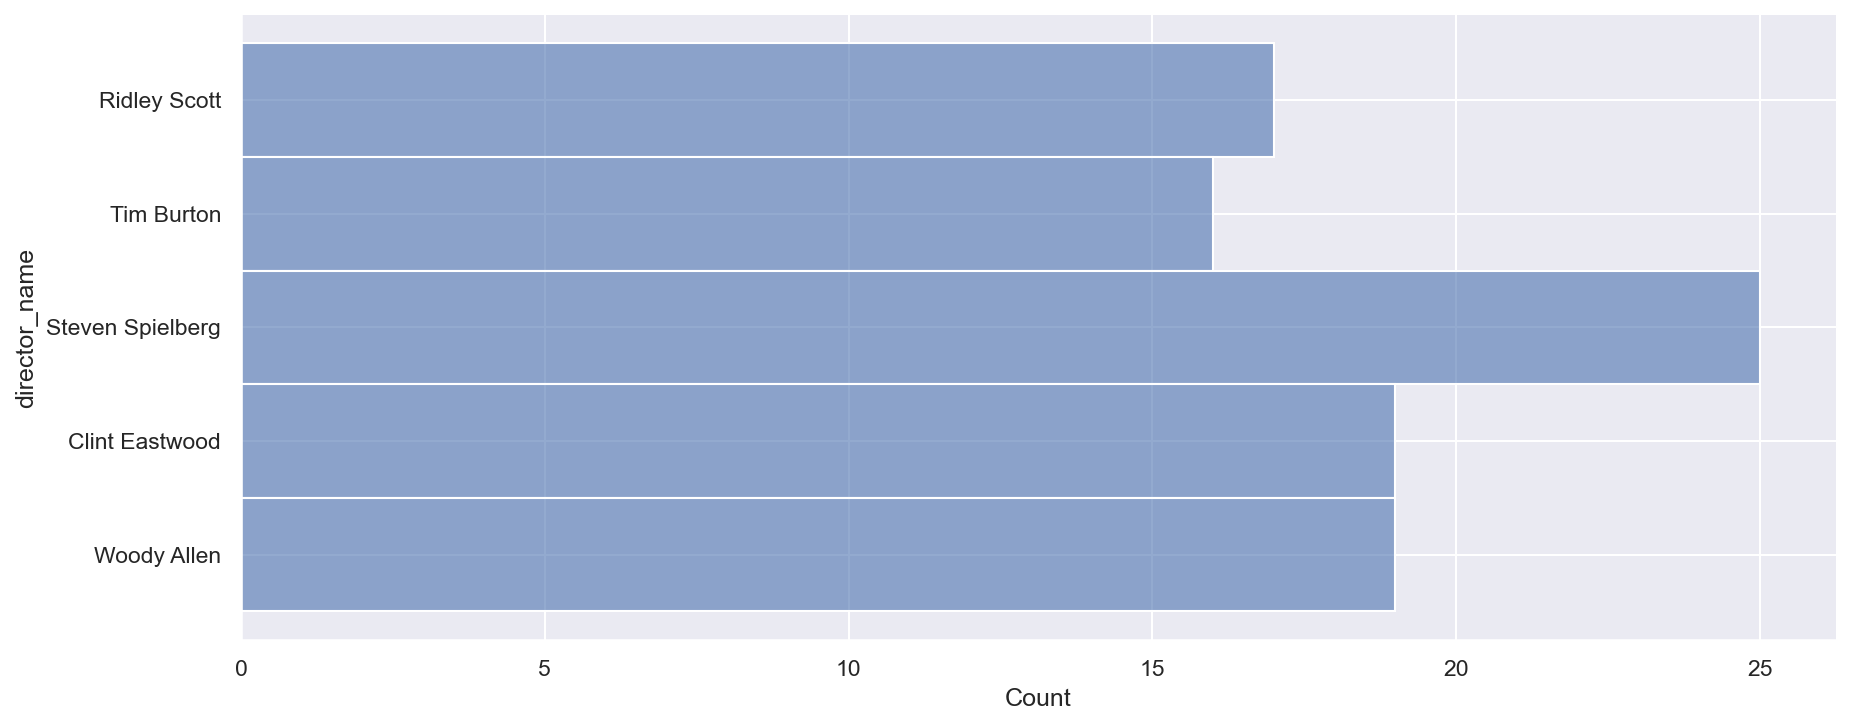

In [ ]:
#คนทำหนังที่มีจำนวนการทำหนังมากที่สุด และมี ratinh การทำหนังสูงที่สุด 5 อันดับแรก
top_directors = df['director_name'].value_counts().head(5).index
df_top_directors = df[df['director_name'].isin(top_directors)]
sns.set(rc={'figure.dpi':150})
sns.displot( kind='hist',       # default:'hist'
             data=df_top_directors, 
             y='director_name',
             bins=20,           # default:10
             height=5, aspect=2.5,
             alpha=0.6,
          )

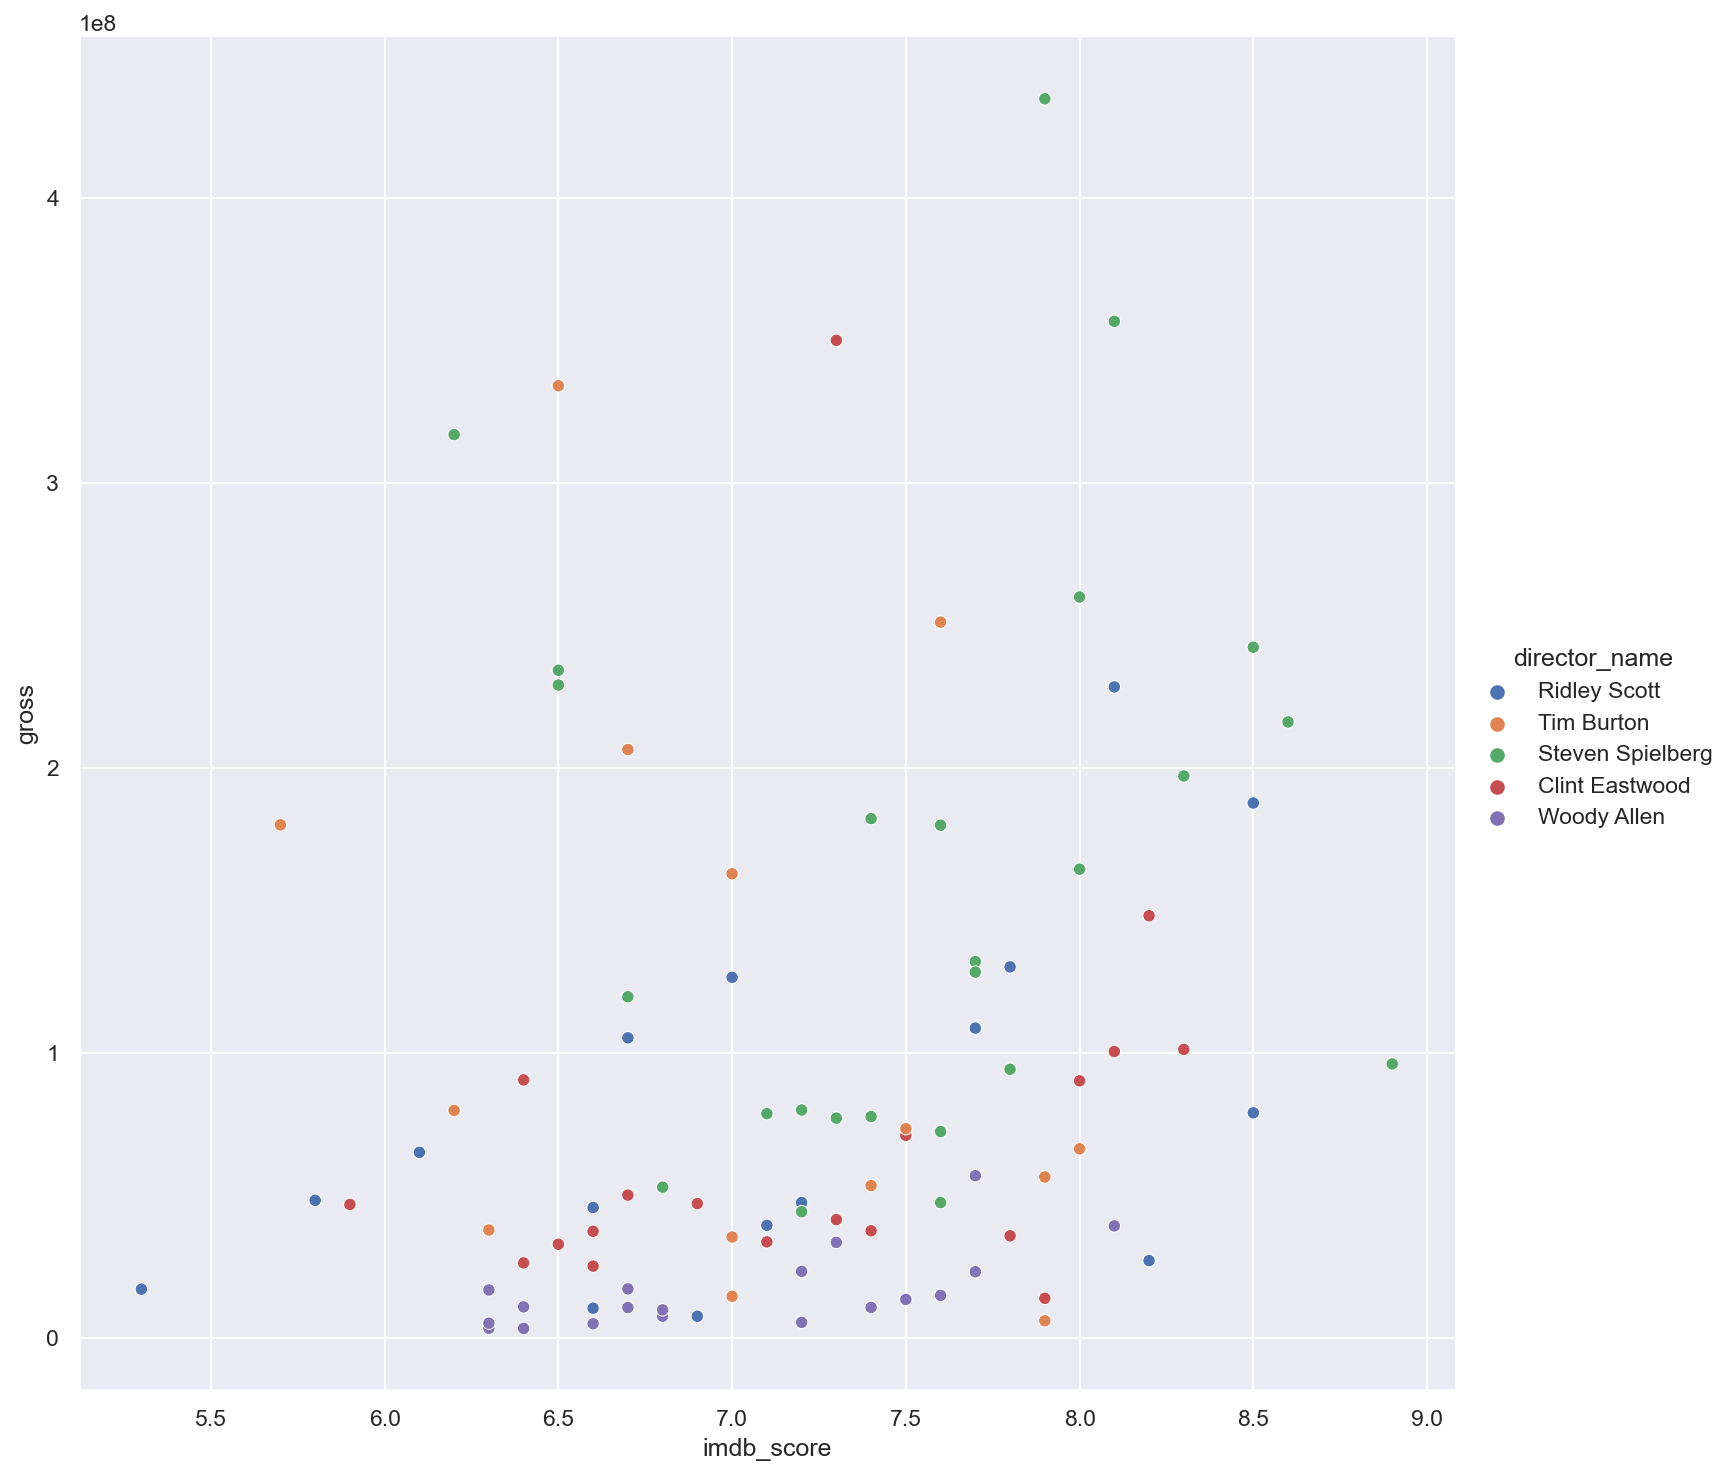

In [ ]:
sns.relplot(kind='scatter',
            data=df_top_directors,
            x='imdb_score',
            y='gross',
            hue= 'director_name',
            height=10, aspect=1,    # Figure size must be set in the figure-level function
            alpha=1,
            ) 
# Display plot
plt.show()

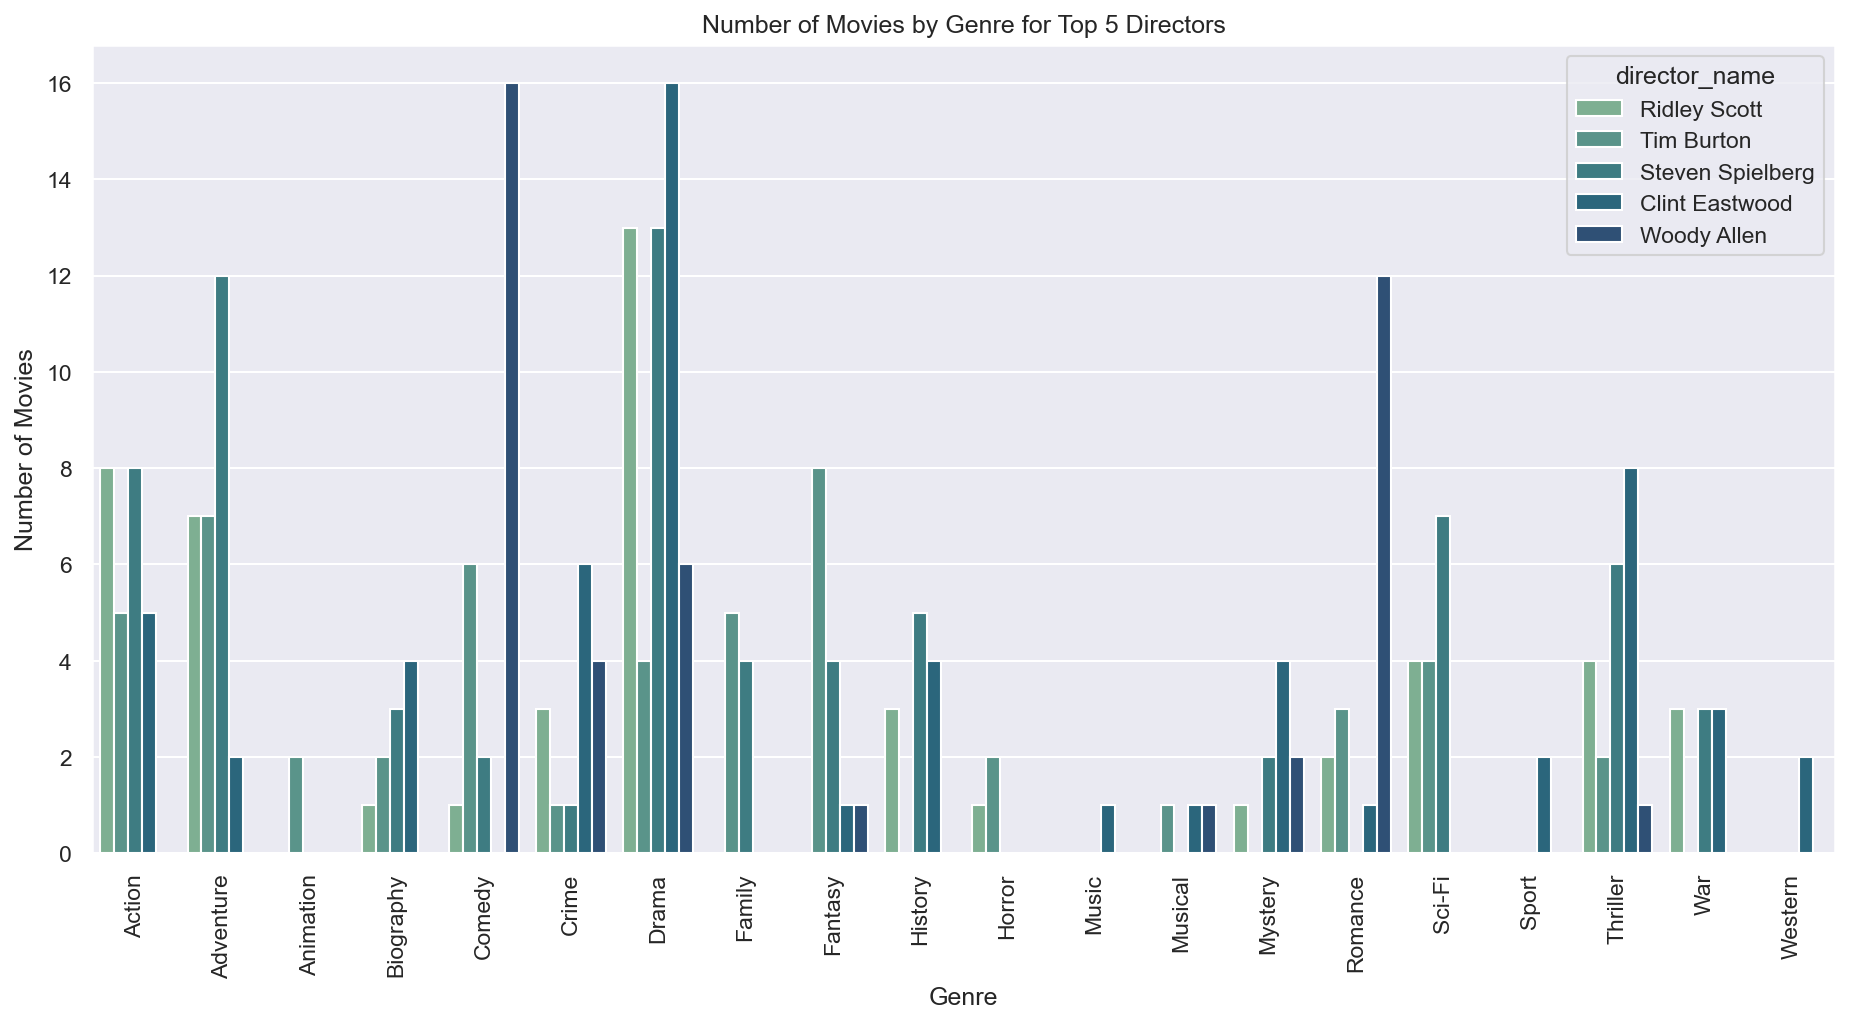

In [ ]:
# 5อันดับคนที่ทำหนังที่มีรายได้สูงที่สุด เพื่อมาประเมินว่าส่วนใหญ่ใครมีการทำหนังประเภทอะไร
df_explode_top5 = df_top_directors.explode('split_genres')
genre_counts_top5 = df_explode_top5.groupby('split_genres')['movie_title'].count()
max_genre_top5 = genre_counts_top5.idxmax()
genre_mean_top5 = df_explode_top5.groupby('split_genres')['imdb_score'].mean()

plt.figure(figsize=(15,7))
sns.countplot(x='split_genres', 
              order=genre_mean_top5.index, 
              palette='crest', 
              data=df_explode_top5, 
              hue='director_name'
              )
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre for Top 5 Directors')
plt.show()

# sns.set_style('whitegrid')
# plt.figure(figsize=(10,5))
# sns.catplot(y=genre_mean_top5.index, 
#             x=genre_mean_top5.values,
#             palette="crest" )

In [ ]:
genre_mean_top5


split_genres
Action       6.919231
Adventure    6.946429
Animation    7.200000
Biography    7.520000
Comedy       6.932000
Crime        6.966667
Drama        7.290385
Family       6.988889
Fantasy      7.064286
History      7.500000
Horror       7.233333
Music        6.900000
Musical      7.033333
Mystery      7.155556
Romance      7.150000
Sci-Fi       7.200000
Sport        7.750000
Thriller     6.995238
War          7.355556
Western      7.800000
Name: imdb_score, dtype: float64

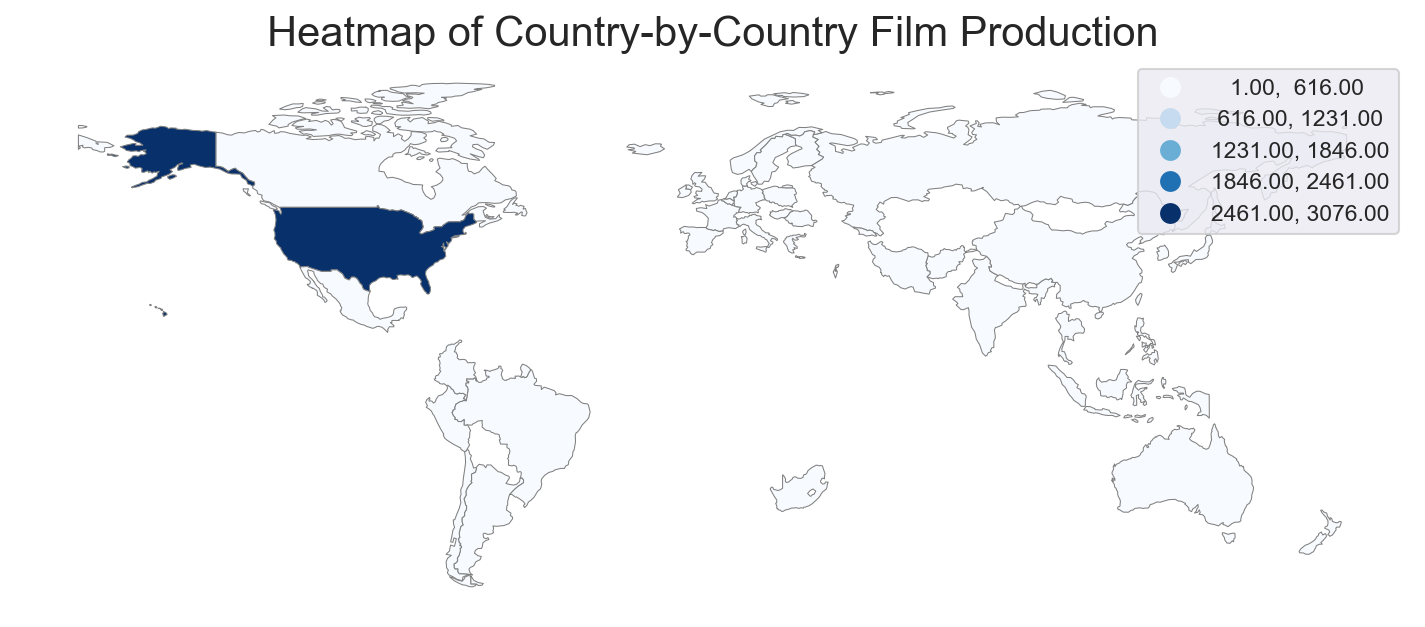

The country with the most movies is United States of America with 3076 movies.


In [ ]:
#หนังถูกสร้างขึ้นมาที่ประเทศอะไรมากทีุ่สด
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
df['country'] = df['country'].replace(['Official site', 'New Line','USA'], 'United States of America')\
    .replace(['West Germany'],'Germany').replace(['UK'],'United Kingdom')
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
movies_per_country = df.groupby('country')['movie_title'].count().reset_index()
merged_data = world_map.merge(movies_per_country, left_on='name', right_on='country')
classifier = mc.Quantiles(merged_data['movie_title'], k=5)
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(12,8))
merged_data.plot(column='movie_title', cmap=cmap, linewidth=0.5, ax=ax, edgecolor='gray', legend=True, scheme='equalinterval')
ax.set_title('Heatmap of Country-by-Country Film Production', fontsize=20)
ax.axis('off')
plt.show()
max_country = merged_data.loc[merged_data['movie_title'].idxmax(), 'name']
print(f"The country with the most movies is {max_country} with {merged_data['movie_title'].max()} movies.")


In [ ]:
#create df from USA country only
df_usa =df.loc[df['country']=='United States of America']

**INSIGHT**

1. Industry Growth (จำนวนหนังที่เพิ่มสูงขึ้นในแต่ละปี ทำให้มีรายได้รวมที่เพิ่มขึ้นในทุกๆปี **แต่จริงหรือไม่ที่การเติบโตเฉลี่ยนั้นเพิ่มขึ้นตาม >> ถ้าไม่เพราะอะไร)
>> จากกราฟด้านล่าง จะเห็นว่ากราฟค่ารวมรายได้ของหนังต่อปี มีรายได้ที่เพิ่มขึ้นเรื่อยๆต่อปีอย่างมาก แต่กลับกัน พอมาดูกราฟที่เป็นค่าเฉลี่ยรายได้ต่อปี กลับพบว่าไม่ได้มีค่าสูงขึ้นแต่อย่างใด ซึ่งสาเหตุนั้นมาจากในแต่ละปีนั้นก็มีจำนวนหนังที่เพิ่มสูง (คู่แข่งจำนวนมากขึ้น)ซึ่งทำให้มีการแบ่ง market share ออกไปเช่นกัน


/Users/pongsapak/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


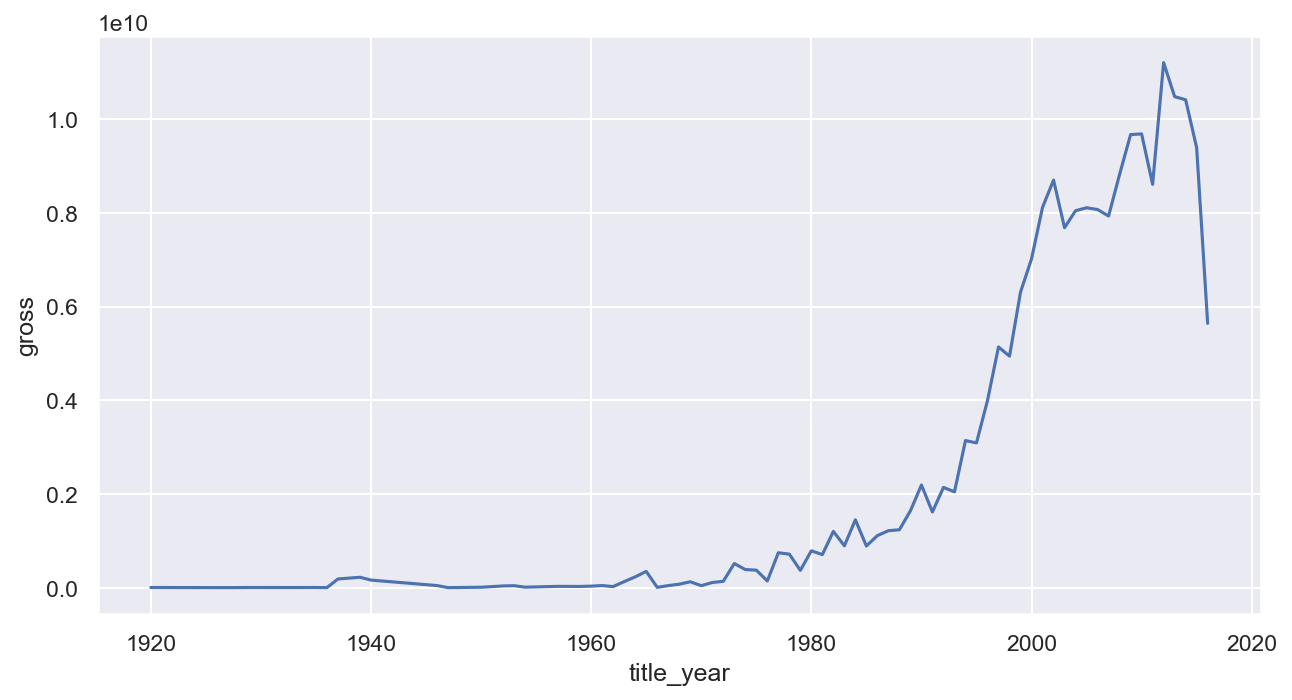

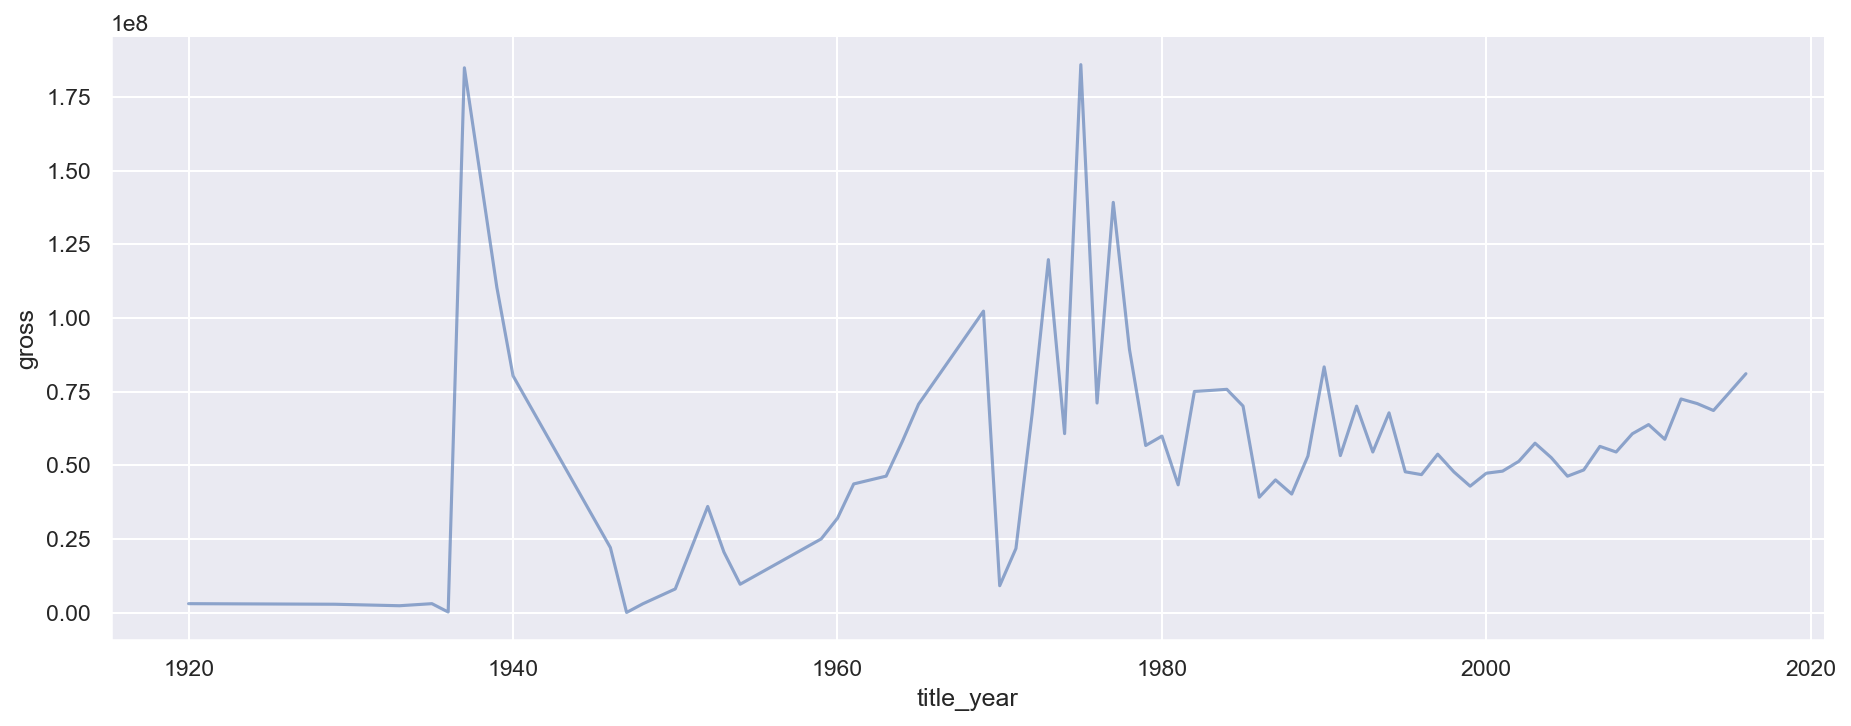

In [ ]:
gross_year = df.groupby('title_year')['gross'].sum()

plt.figure(figsize=(10,5))
gross_year.plot()
plt.ylabel('gross')

sns.set(rc={'figure.dpi':150})
sns.relplot( kind='line',
             data=df_usa, 
             x='title_year', y='gross', 
             height=5, aspect=2.5,
             alpha=0.6,
            ci= None
          )

/Users/pongsapak/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


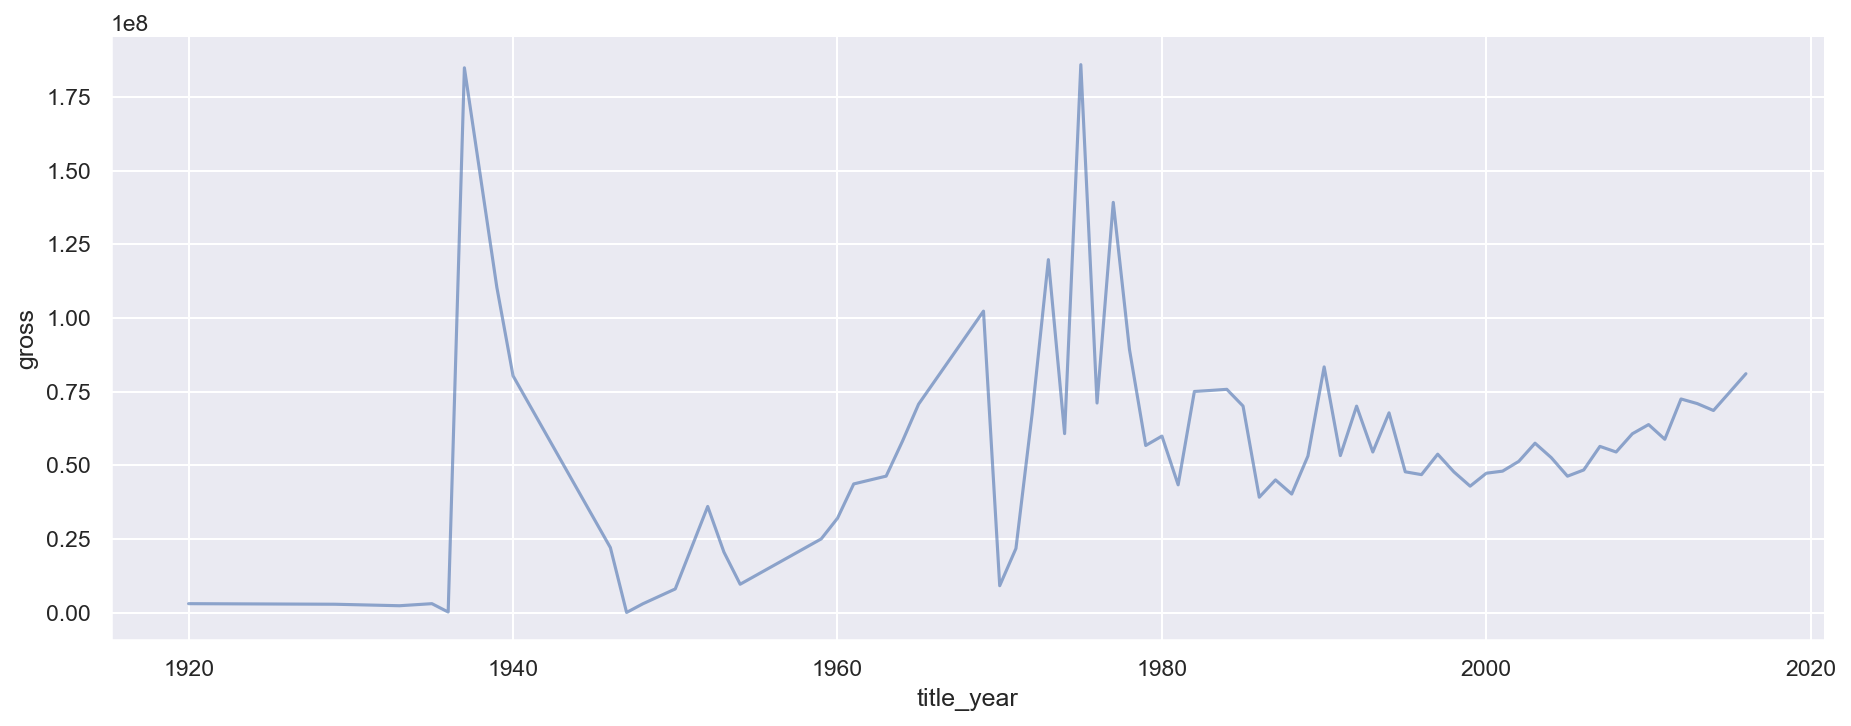

In [ ]:
# ปีที่เพิ่มขึ้น แต่ growth ไม่ได้เพิ่มขึ้นตาม
sns.set(rc={'figure.dpi':150})
sns.relplot( kind='line',
             data=df_usa, 
             x='title_year', y='gross', 
             height=5, aspect=2.5,
             alpha=0.6,
            ci= None
          )


2. Budget vs Gross (USA) >> หนังที่มีต้นทุนสูง จะมีรายได้สูงตาม จริงหรือไม่?**
>>จากกราฟ พบว่าหนังที่มีต้นทุนสูง นั้นจะส่งผลให้มี รายได้ที่เพิ่มสูงตาม เป็นความสัมพันธ์แบบแปรผันตรงเชิงบวก

<AxesSubplot:xlabel='budget', ylabel='gross'>

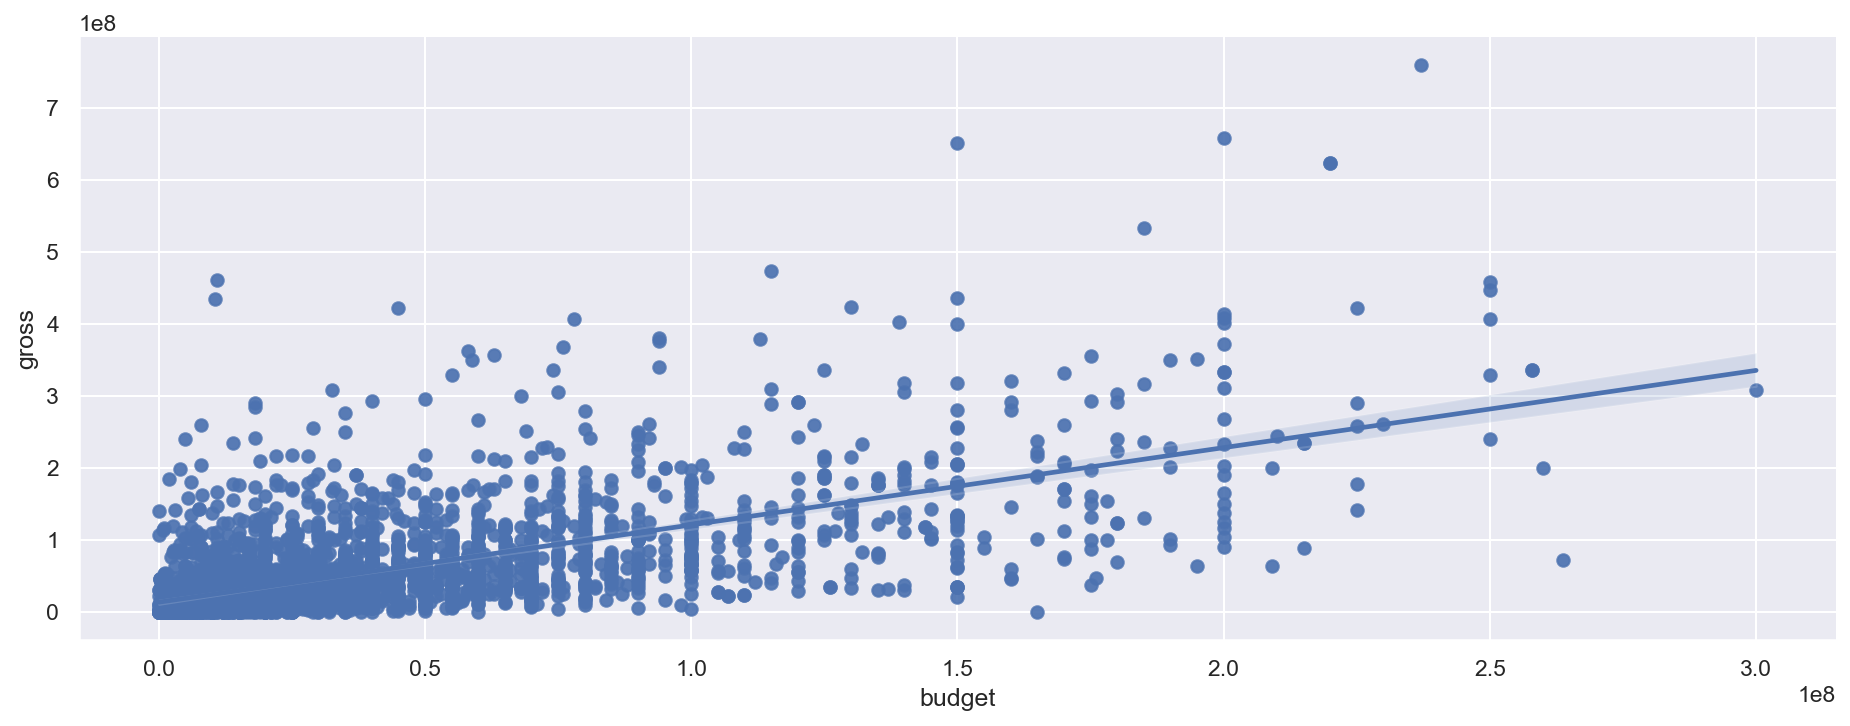

In [ ]:
#focus only USA because they have the same dollar currency
sns.set(rc={'figure.dpi':150})
sns.relplot( kind='scatter',          # default:'scatter'
             data=df_usa,            # Data to plot
             x='budget', y='gross', # Positions of x and y axes
             #hue='size',              # Grouping variable that will produce elements with different colors
             height=5, aspect=2.5,    # Figure size must be set in the figure-level function
             alpha=0.6,
            ) 
sns.regplot( data=df_usa,
             x='budget', y='gross', 
        )

>>แต่กลับกัน การที่มีต้นทุนในการทำหนังที่สูง นั้นไม่ได้ส่งผลให้มี imdb_score ที่สูงตามอย่างมีนัยสำคัญ ดังกราฟ scatter plot ด้านล่าง


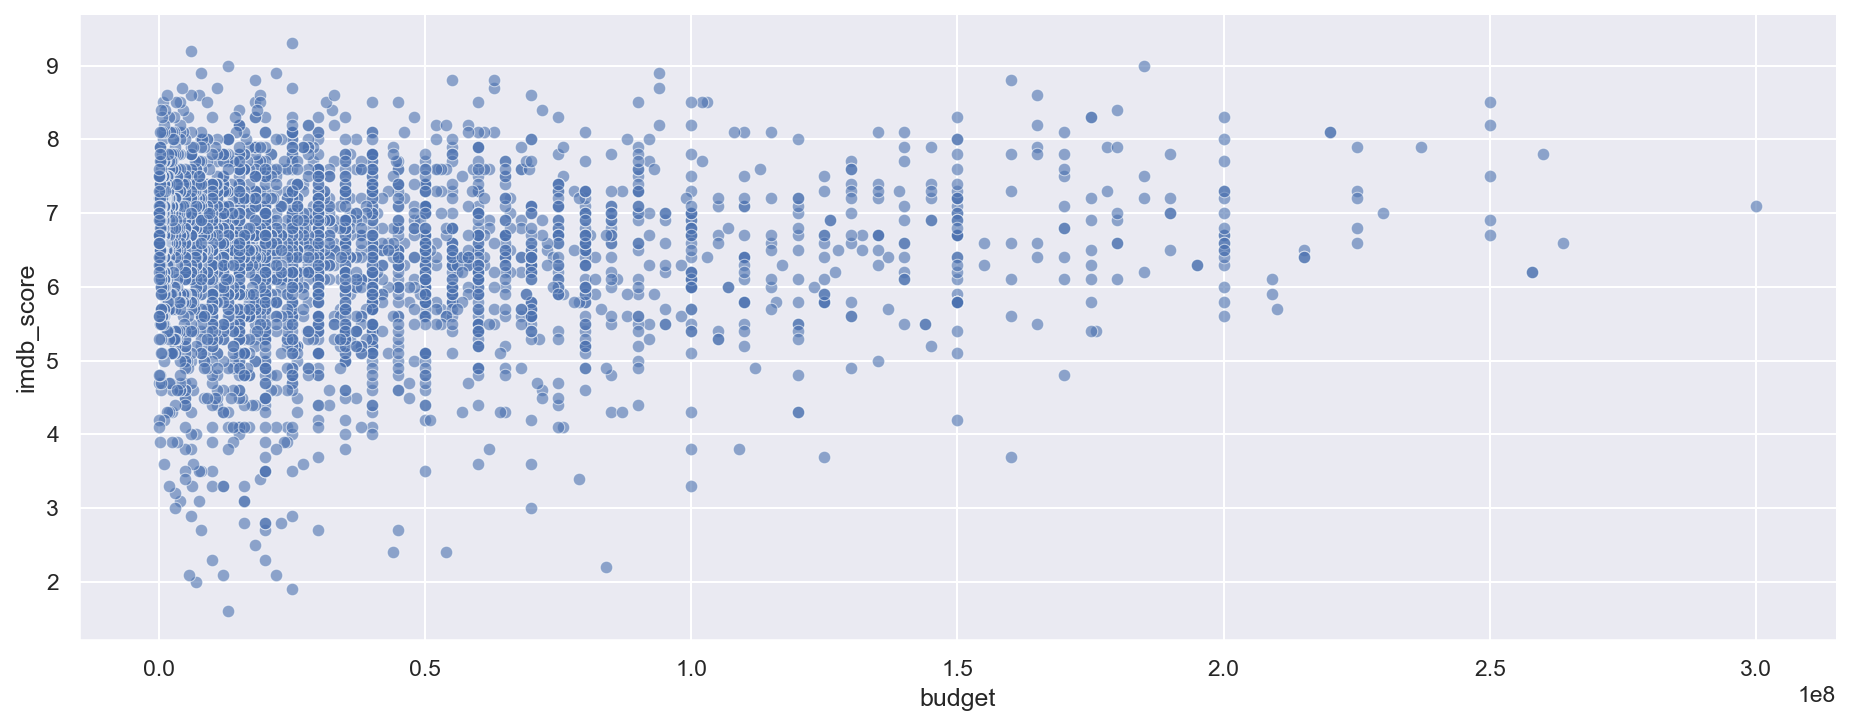

In [ ]:
sns.set(rc={'figure.dpi':150})
sns.relplot( kind='scatter',          # default:'scatter'
             data=df_usa,            # Data to plot
             x='budget', y='imdb_score', # Positions of x and y axes
             #hue='size',              # Grouping variable that will produce elements with different colors
             height=5, aspect=2.5,    # Figure size must be set in the figure-level function
             alpha=0.6,
            ) 




3. Gross vs IMDB score >> หนังที่มี imdb_score สูง นั้นจะมีรายได้สูงจริงหรือไม่?  

>> จากกราฟด้านล่าง พบว่า imdb_score ที่มีค่าต่ำนั้นทำให้มีรายได้อยู่ในระดับต่ำอย่างแน่นอน แต่หนังที่มีคะแนน imdb_score ที่สูงนั้นมีโอกาสที่จะมีรายได้ที่สูง หรือต่ำก็ได้ (มีการกระจายในวงที่ค่อนข้างกว้าง)

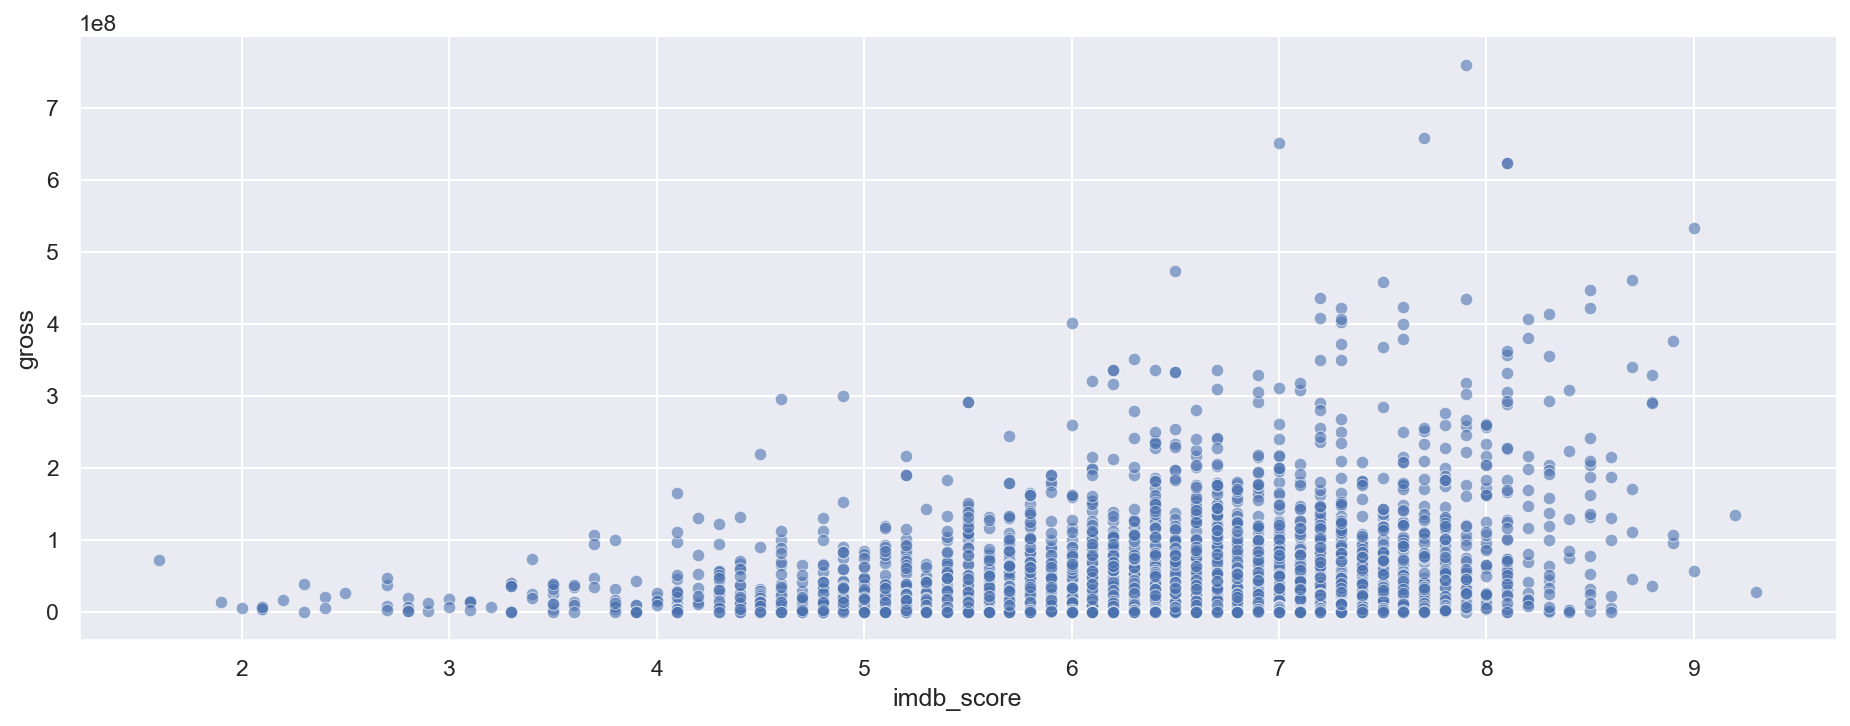

In [ ]:
#USA gross vs imdb_score

sns.set(rc={'figure.dpi':150})
sns.relplot( kind='scatter',          # default:'scatter'
             data=df_usa,            # Data to plot
             x='imdb_score', y='gross', # Positions of x and y axes
             #hue='size',              # Grouping variable that will produce elements with different colors
             height=5, aspect=2.5,    # Figure size must be set in the figure-level function
             alpha=0.6,
            ) 
#sns.regplot( data=df_usa,
 #            x='imdb_score', y='gross', 
  #      )


4. Duration ช่วงไหน ทำให้มี high gross + high imdb_score 
>> แบ่งช่วง Duration ให้เป็นทั้งหมด 3 ช่วง 
ได้แก่ Short ต่ำกว่า 90 นาที, 
Medium ช่วง 90-120 นาที, 
Long ช่วงสูงกว่า 120 นาที 
เพื่อดูว่า Duration type ช่วงไหนที่ส่งผลให้มีรายได้สูงที่สุด และ imdb_score สูงที่สุด


>>สรุปได้ว่า ช่วง Long หรือระยะเวลาหนังตั้งแต่ 120 นาทีขึ้นไป จะ

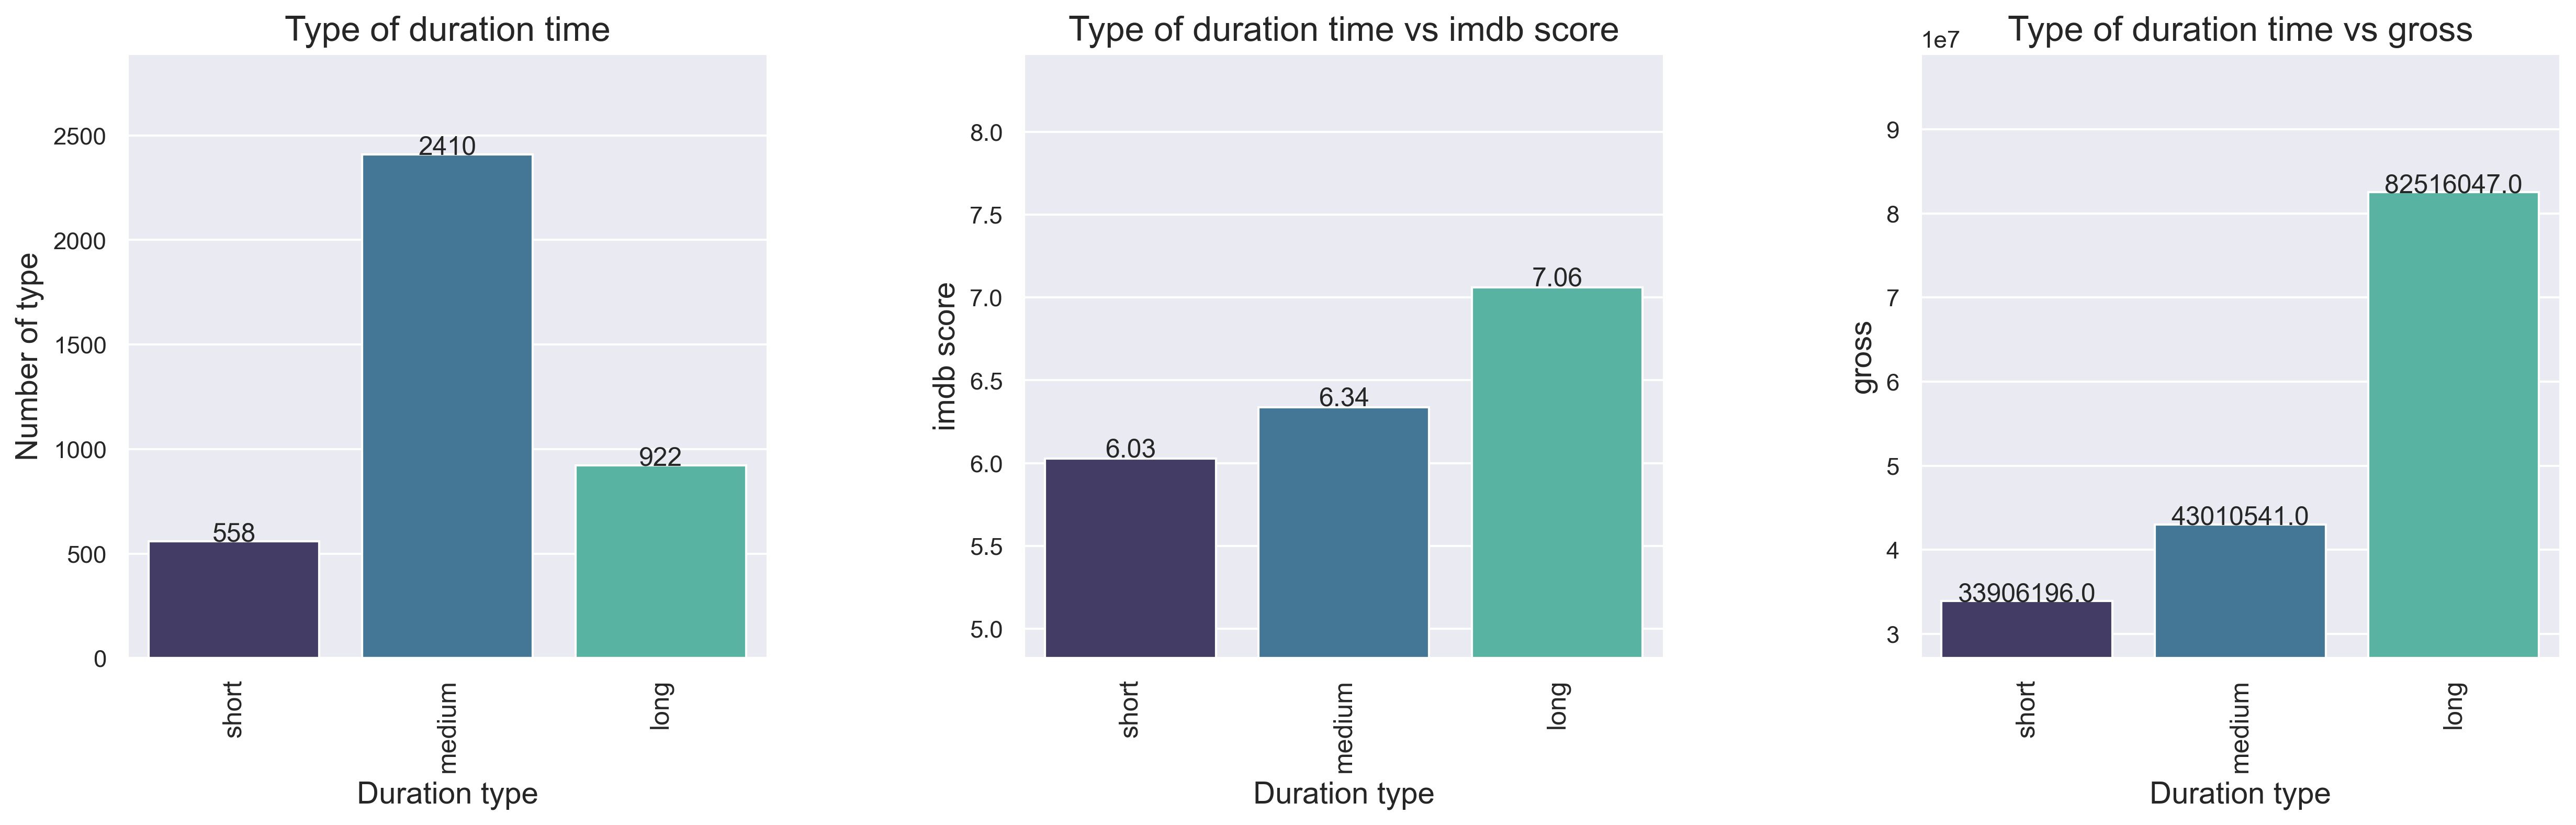

In [ ]:
df['duration_category'] = pd.cut(df['duration'], 
                                 bins=[0, 90, 120, float('inf')], 
                                 labels=['short', 'medium', 'long'])

duration_mean = df.groupby('duration_category')['imdb_score'].mean()
duration_mean_gross = df.groupby('duration_category')['gross'].mean()
duration_df = df.groupby('duration_category')['movie_title'].count()

fig, ax = plt.subplots(1, 3, figsize=(20,5),dpi = 300)
sns.barplot(x=duration_df.index, y=duration_df.values, ax=ax[0],palette ="mako")

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, fontsize=12)
ax[0].set_xlabel('Duration type', fontsize=14)
ax[0].set_ylabel('Number of type', fontsize=14)
ax[0].set_title('Type of duration time', fontsize=16)
for i, count in enumerate(duration_df.values):
    ax[0].text(i, count+0.5, str(count), ha='center', fontsize=12)
sns.barplot(x=duration_mean.index, y=duration_mean.values, ax=ax[1],palette ="mako")

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=12)
ax[1].set_xlabel('Duration type', fontsize=14)
ax[1].set_ylabel('imdb score', fontsize=14)
ax[1].set_title('Type of duration time vs imdb score', fontsize=16)

for i, count in enumerate(duration_mean.values):
    ax[1].text(i, count+0.01, str(round(count, 2)), ha='center', fontsize=12)
sns.barplot(x=duration_mean_gross.index, y=duration_mean_gross.values, ax=ax[2],palette ="mako")

ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90, fontsize=12)
ax[2].set_xlabel('Duration type', fontsize=14)
ax[2].set_ylabel('gross', fontsize=14)
ax[2].set_title('Type of duration time vs gross', fontsize=16)

for i, count in enumerate(duration_mean_gross.values):
    ax[2].text(i, count+0.01, str(round(count, 0)), ha='center', fontsize=12)
ax[0].set_ylim([0, duration_df.values.max()*1.2])
ax[1].set_ylim([duration_mean.values.min()*0.8, duration_mean.values.max()*1.2])
ax[2].set_ylim([duration_mean_gross.values.min()*0.8, duration_mean_gross.values.max()*1.2])
plt.subplots_adjust(wspace=0.4)
plt.show()


5. จากคำกล่าวที่ว่าหนังเก่าๆมี imdb_score ที่สูง จริงหรือไม่? อะไรเป็นสาเหตุดังกล่าว?
>>โดยพบว่า หนังที่ผลิตก่อนปี 2000 นั้น ติดอันดับ Top 10 ของทั้งหมด ในสัดส่วน 6 ใน 10

โดยเรื่องที่ติด อันดับ 1 อย่าง The Shawshank Redemtion นั้นครองใจคนดูเป็น Top 1 ตลอดมา

In [ ]:
#ใส่เพิ่มว่าหนัง เรื่องอะไร ในปีเก่าๆที่ imdb_score สูง และหนังประเภทไหน ที่เก่าแต่คนยังให้ความสนใจ
#top_directors = df['director_name'].value_counts().head(5).index
#df_top_directors = df[df['director_name'].isin(top_directors)]

df[df['title_year']<2000].sort_values(by="imdb_score", ascending=False).head(10)["movie_title"]

1806                          The Shawshank Redemption 
3041                                     The Godfather 
2564                            The Godfather: Part II 
3638                    The Good, the Bad and the Ugly 
1748                                  Schindler's List 
2962                                      Pulp Fiction 
1904    Star Wars: Episode V - The Empire Strikes Back 
653                                         Fight Club 
795                                       Forrest Gump 
1774                                        Goodfellas 
Name: movie_title, dtype: object

In [ ]:
#หนังทั้งหมด ในimdb รวมเก่า ใหม่ >> จะเห็นว่ามี 4 เรื่องที่ออกมาก่อน 2000
df.sort_values(by="imdb_score", ascending=False).head(10)["movie_title"]

1806                            The Shawshank Redemption 
3041                                       The Godfather 
64                                       The Dark Knight 
2564                              The Godfather: Part II 
2962                                        Pulp Fiction 
1748                                    Schindler's List 
3638                      The Good, the Bad and the Ugly 
328        The Lord of the Rings: The Return of the King 
94                                             Inception 
260     The Lord of the Rings: The Fellowship of the R...
Name: movie_title, dtype: object

In [ ]:
Top10_list = df.sort_values(by="imdb_score", ascending=False).head(10)["movie_title"]
Top10_movie =df[df['movie_title'].isin(Top10_list)]
Top10_movie

color         director_name  num_critic_for_reviews  \
64               Color     Christopher Nolan                   645.0   
94               Color     Christopher Nolan                   642.0   
260              Color         Peter Jackson                   297.0   
328              Color         Peter Jackson                   328.0   
1748   Black and White      Steven Spielberg                   174.0   
1806             Color        Frank Darabont                   199.0   
2564             Color  Francis Ford Coppola                   149.0   
2962             Color     Quentin Tarantino                   215.0   
3041             Color  Francis Ford Coppola                   208.0   
3638             Color          Sergio Leone                   181.0   

      duration  director_facebook_likes  actor_3_facebook_likes  \
64       152.0                  22000.0                 11000.0   
94       148.0                  22000.0                 23000.0   
260      171.0                      0.0                   857.0   
328      192.0                      0.0                   416.0   
1748     185.0                  14000.0                   212.0   
1806     142.0                      0.0                   461.0   
2564     220.0                      0.0                  3000.0   
2962     178.0                  16000.0                   857.0   
3041     175.0                      0.0                  3000.0   
3638     142.0                      0.0                    24.0   

        actor_2_name  actor_1_facebook_likes        gross  \
64      Heath Ledger                 23000.0  533316061.0   
94         Tom Hardy                 29000.0  292568851.0   
260    Orlando Bloom                 16000.0  313837577.0   
328       Billy Boyd                  5000.0  377019252.0   
1748  Embeth Davidtz                 14000.0   96067179.0   
1806  Jeffrey DeMunn                 11000.0   28341469.0   
2564       Al Pacino                 22000.0   57300000.0   
2962     Eric Stoltz                 13000.0  107930000.0   
3041   Marlon Brando                 14000.0  134821952.0   
3638  Luigi Pistilli                 16000.0    6100000.0   

                                genres  ...                   country  \
64         Action|Crime|Drama|Thriller  ...  United States of America   
94    Action|Adventure|Sci-Fi|Thriller  ...  United States of America   
260     Action|Adventure|Drama|Fantasy  ...               New Zealand   
328     Action|Adventure|Drama|Fantasy  ...  United States of America   
1748           Biography|Drama|History  ...  United States of America   
1806                       Crime|Drama  ...  United States of America   
2564                       Crime|Drama  ...  United States of America   
2962                       Crime|Drama  ...  United States of America   
3041                       Crime|Drama  ...  United States of America   
3638                           Western  ...                     Italy   

     content_rating       budget  title_year actor_2_facebook_likes  \
64            PG-13  185000000.0      2008.0                13000.0   
94            PG-13  160000000.0      2010.0                27000.0   
260           PG-13   93000000.0      2001.0                 5000.0   
328           PG-13   94000000.0      2003.0                  857.0   
1748              R   22000000.0      1993.0                  795.0   
1806              R   25000000.0      1994.0                  745.0   
2564              R   13000000.0      1974.0                14000.0   
2962              R    8000000.0      1994.0                  902.0   
3041              R    6000000.0      1972.0                10000.0   
3638       Approved    1200000.0      1966.0                   34.0   

      imdb_score aspect_ratio movie_facebook_likes  \
64           9.0         2.35                37000   
94           8.8         2.35               175000   
260          8.8         2.35                21000   
328         

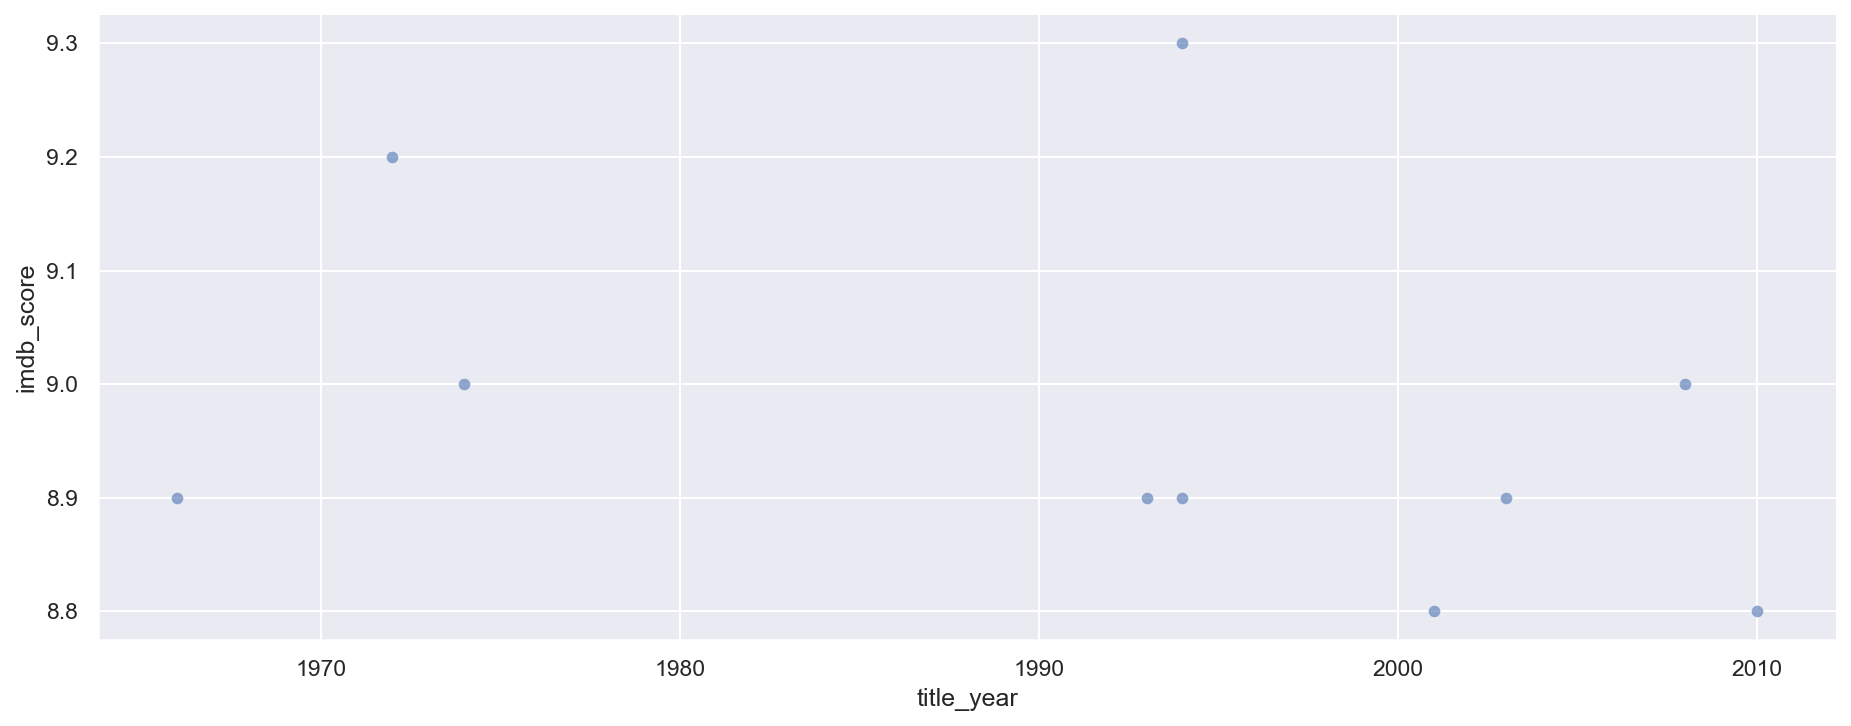

In [ ]:
sns.set(rc={'figure.dpi':150})
sns.relplot( kind='scatter',          # default:'scatter'
             data=Top10_movie,            # Data to plot
             x='title_year', y='imdb_score', # Positions of x and y axes
             #hue='size',              # Grouping variable that will produce elements with different colors
             height=5, aspect=2.5,    # Figure size must be set in the figure-level function
             alpha=0.6,
            ) 

6. Actionable Insight (Produce movie with multiple feature) 
>> เสนอแนะนำว่าจากข้อมูลที่หามาจะแนะนำ industry อย่างไร

>> a. Should produce with duration : Long (more than 120 mins)

>> b. Should produce with 3 best genres : Animetion, Adventure, Family

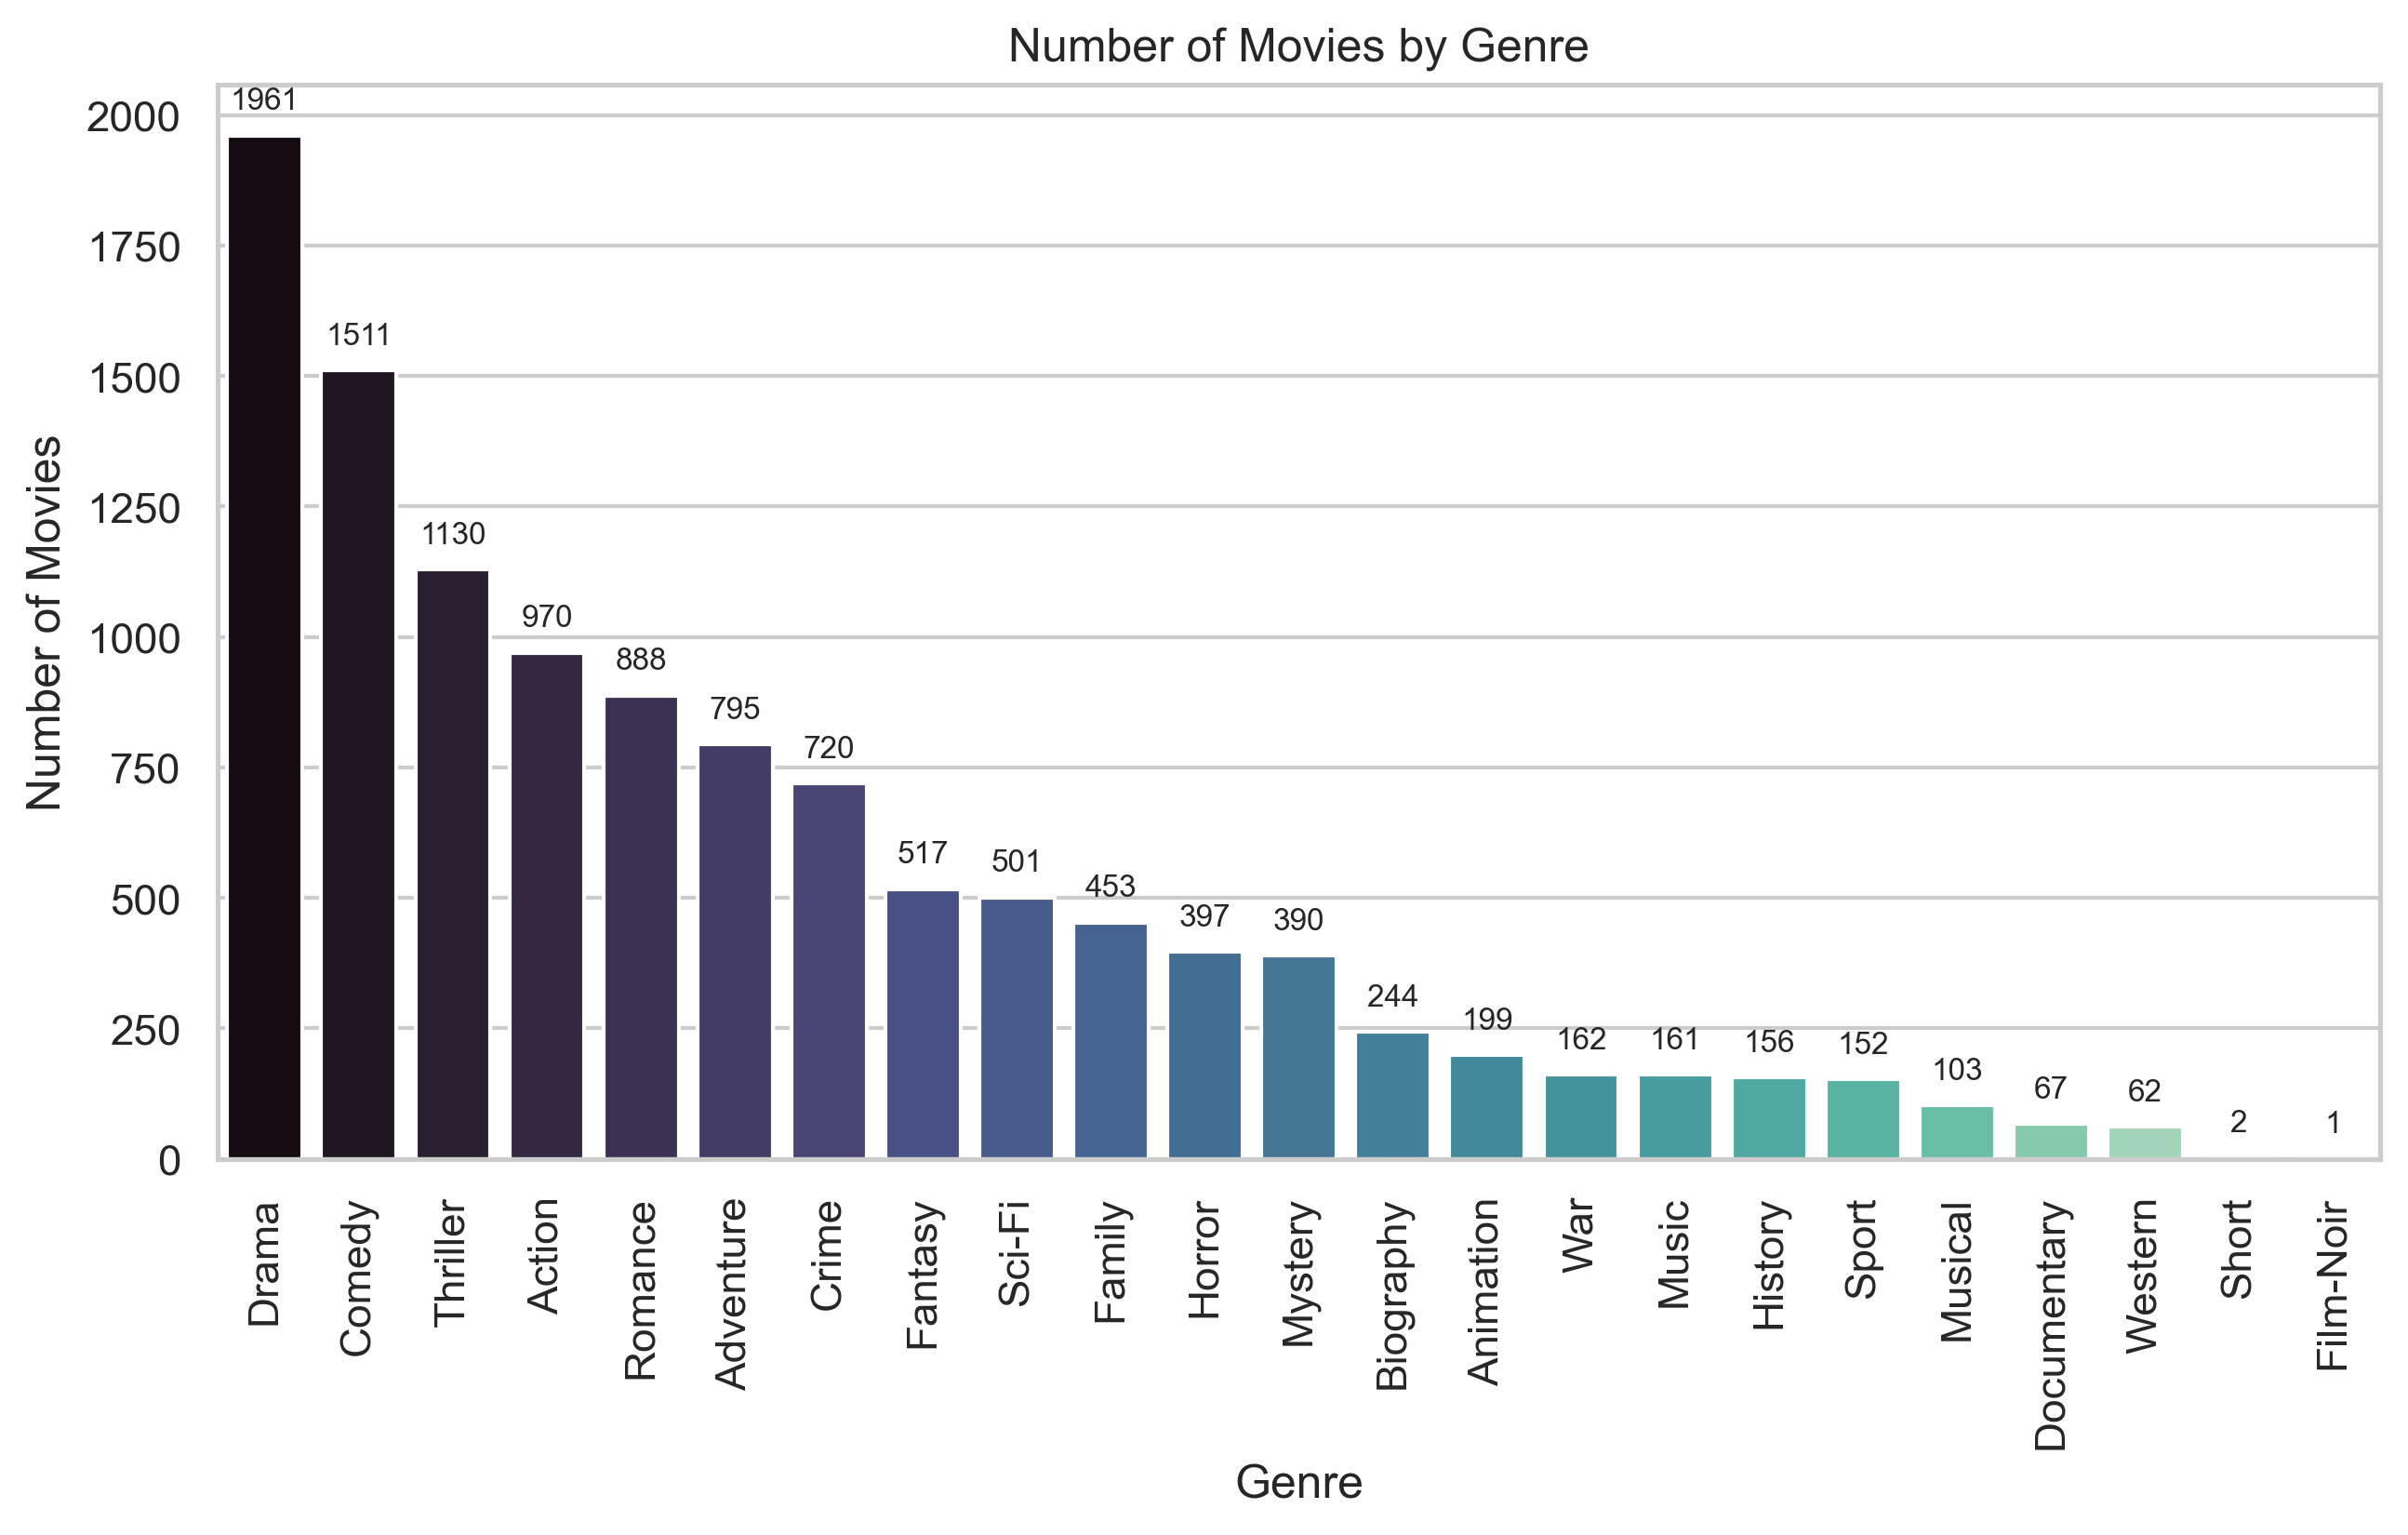

In [ ]:
df['split_genres'] = df['genres'].apply(lambda x: x.split('|'))
df_explode = df.explode('split_genres')
genre_counts = df_explode.groupby('split_genres')['movie_title'].count()
genre_counts = genre_counts.sort_values(ascending=False)
max_genre = genre_counts.idxmax()
sns.set_style('whitegrid')
plt.figure(figsize=(10,5),dpi=300)
sns.barplot(x=genre_counts.index, 
            y=genre_counts.values, 
            palette='mako')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')

for i, v in enumerate(genre_counts.values):
    plt.text(i, v+50, str(v), ha='center', fontsize=8)
plt.show()

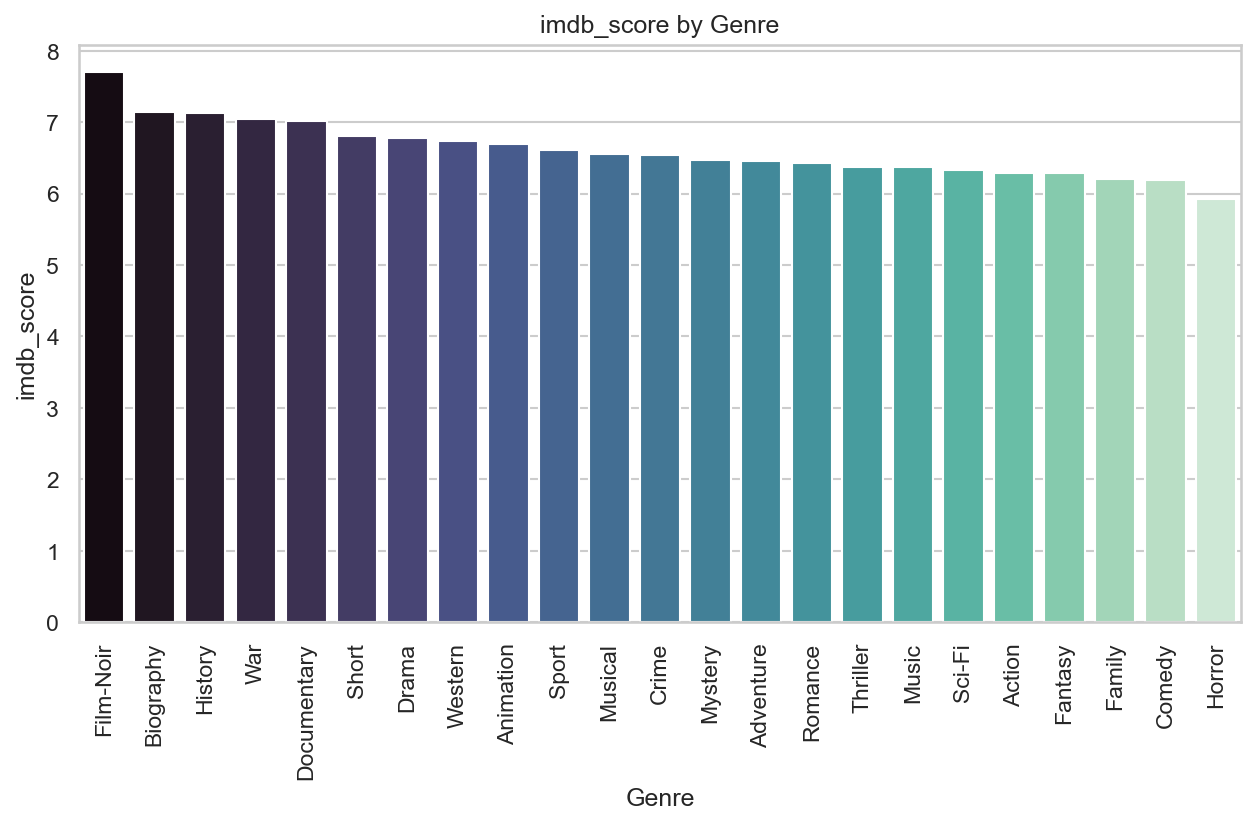

In [ ]:
genre_mean = df_explode.groupby('split_genres')['imdb_score'].mean()
genre_mean = genre_mean.sort_values(ascending=False)
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(y=genre_mean.values, 
            x=genre_mean.index,
            palette="mako" )
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('imdb_score')
plt.title('imdb_score by Genre')
plt.show()

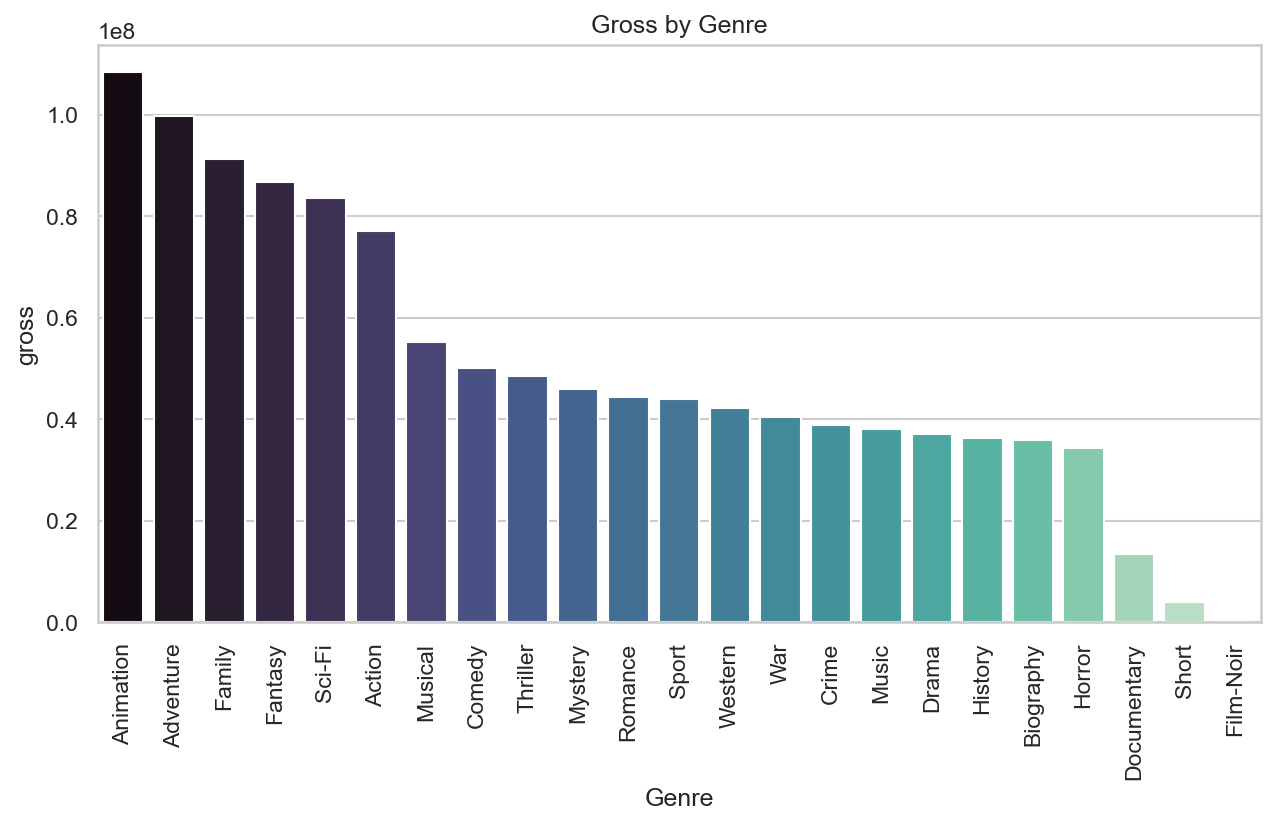

In [ ]:
genre_mean = df_explode.groupby('split_genres')['gross'].mean()
genre_mean = genre_mean.sort_values(ascending=False)
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(y=genre_mean.values, 
            x=genre_mean.index,
            palette="mako" )
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('gross')
plt.title('Gross by Genre')
plt.show()

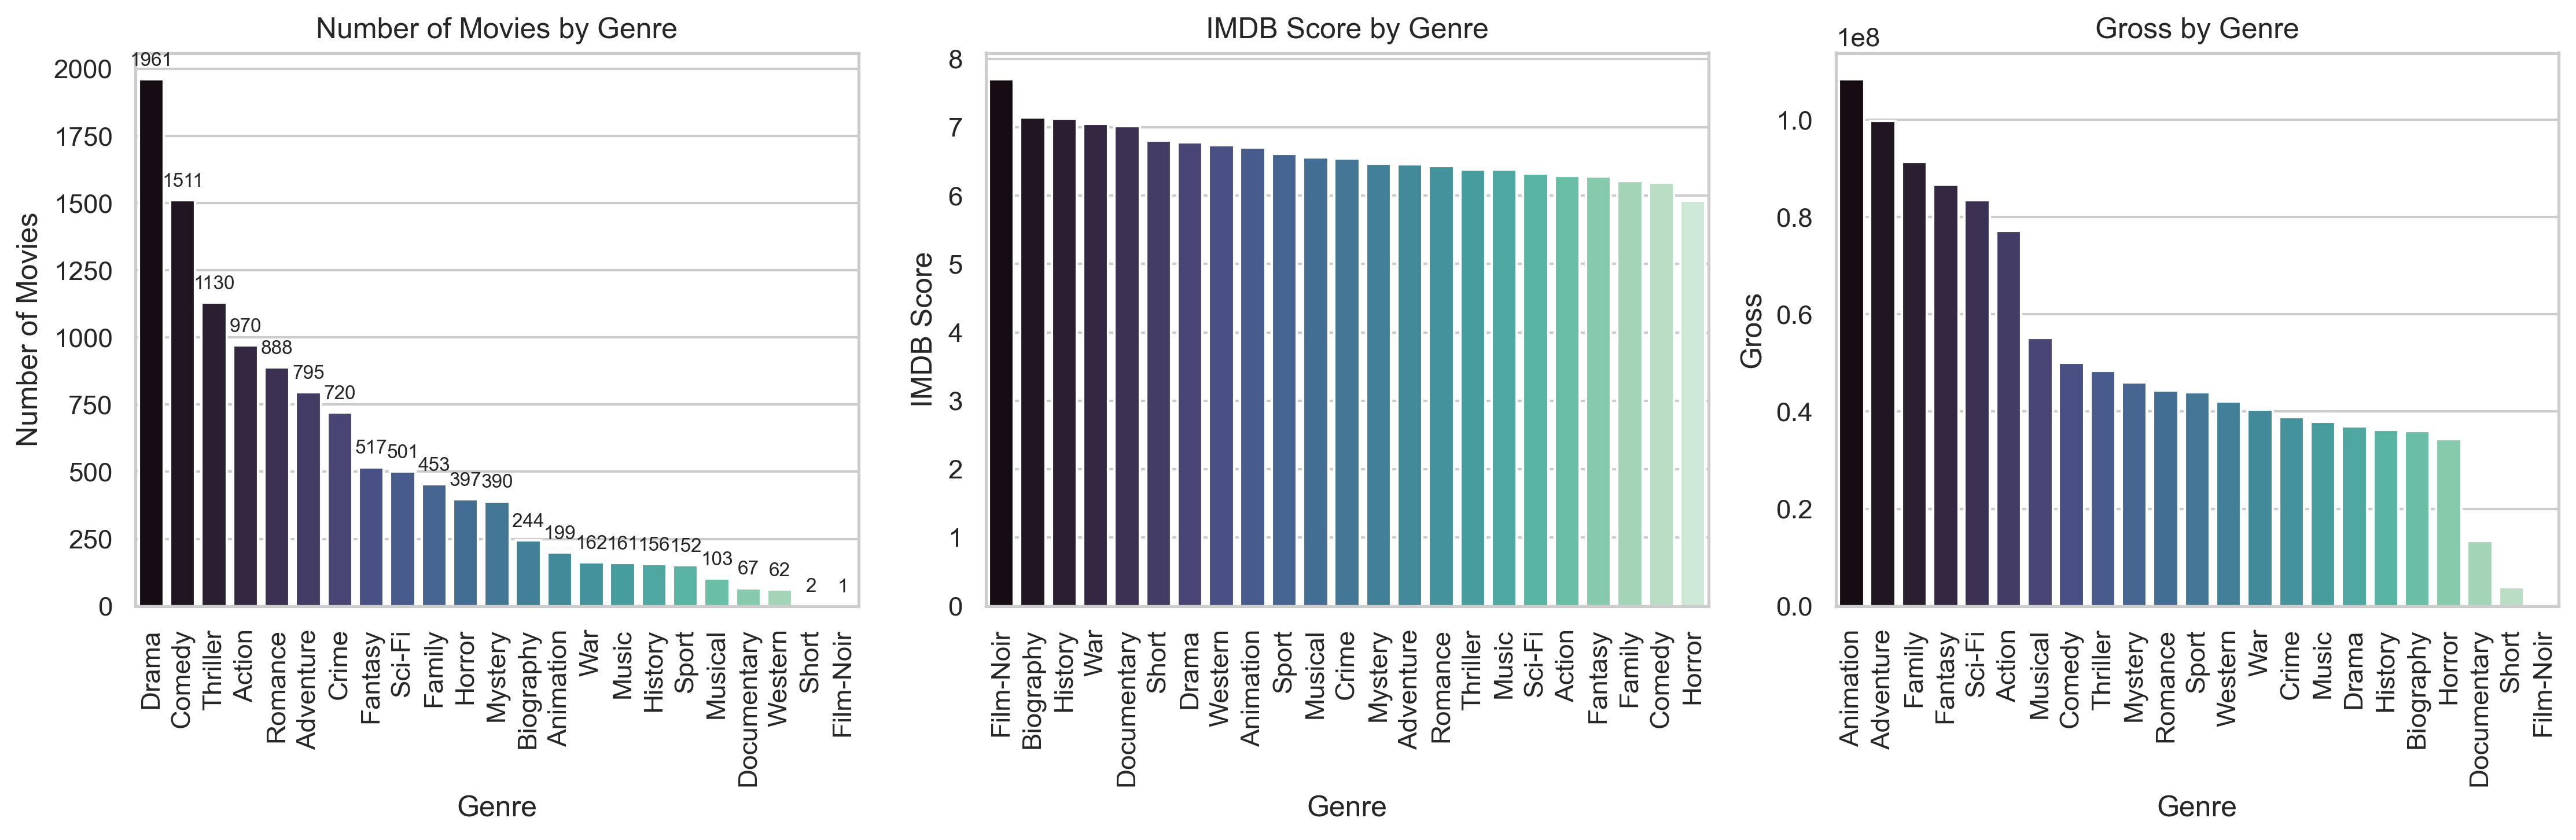

In [ ]:
# Create the dataframe
df['split_genres'] = df['genres'].apply(lambda x: x.split('|'))
df_explode = df.explode('split_genres')

# Plot 1: Number of movies by genre
genre_counts = df_explode.groupby('split_genres')['movie_title'].count()
genre_counts = genre_counts.sort_values(ascending=False)
max_genre = genre_counts.idxmax()

# Plot 2: IMDB score by genre
genre_mean_imdb = df_explode.groupby('split_genres')['imdb_score'].mean()
genre_mean_imdb = genre_mean_imdb.sort_values(ascending=False)

# Plot 3: Gross by genre
genre_mean_gross = df_explode.groupby('split_genres')['gross'].mean()
genre_mean_gross = genre_mean_gross.sort_values(ascending=False)

# Create a single figure with 3 subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=300)

# Set the style and title for all subplots
sns.set_style('whitegrid')

# Plot 1: Number of movies by genre
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='mako', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Number of Movies')
axs[0].set_title('Number of Movies by Genre')

for i, v in enumerate(genre_counts.values):
    axs[0].text(i, v+50, str(v), ha='center', fontsize=8)

# Plot 2: IMDB score by genre
sns.barplot(y=genre_mean_imdb.values, x=genre_mean_imdb.index, palette='mako', ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('IMDB Score')
axs[1].set_title('IMDB Score by Genre')

# Plot 3: Gross by genre
sns.barplot(y=genre_mean_gross.values, x=genre_mean_gross.index, palette='mako', ax=axs[2])
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
axs[2].set_xlabel('Genre')
axs[2].set_ylabel('Gross')
axs[2].set_title('Gross by Genre')

plt.tight_layout()
plt.show()


7. หนัง Drama มีจำนวนเยอะจริง แต่ หนัง drama ในแต่ละปีมี imdb_score และ รายได้เพิ่มตามจริงหรือไม่

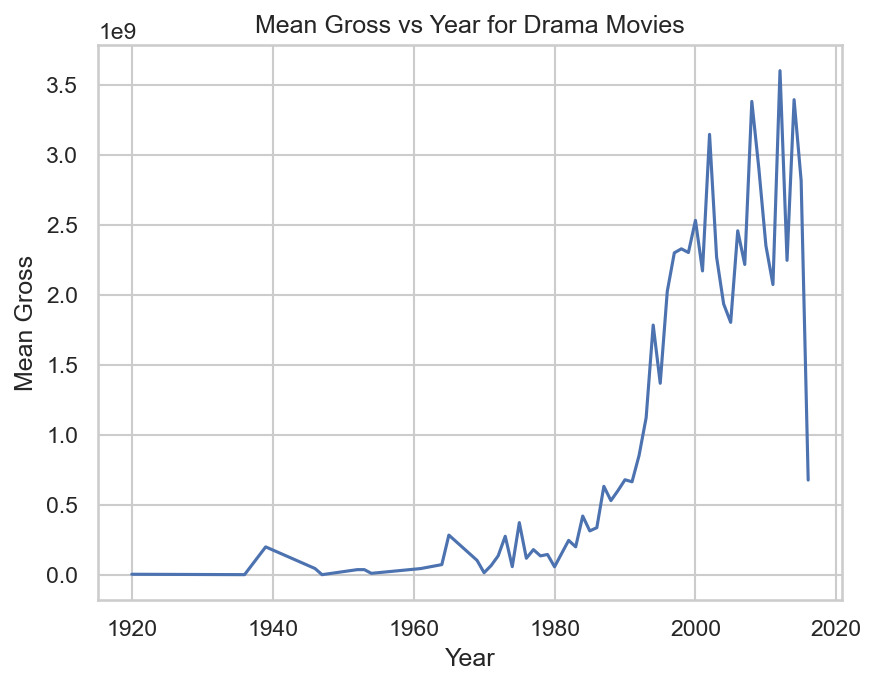

In [ ]:
drama_movies = df_usa[df_usa['genres'].str.contains('Drama')]
yearly_gross = drama_movies.groupby('title_year')['gross'].sum()
plt.plot(yearly_gross.index, yearly_gross.values)
plt.title('Mean Gross vs Year for Drama Movies')
plt.xlabel('Year')
plt.ylabel('Mean Gross')

plt.show()

8. Director vs Gross and Director vs imdb_score Top 10
>> กราฟดังกล่าวแสดง ชื่อ Director ที่ทำหนังแล้วมีรายได้สูง 10 คนแรก มีรายการดังนี้
>> นำรายชื่อ Director แต่ละคนที่ทำรายได้สูงสุดมาดูค่า imdb_score ซึ่ง Director ที่ทำหนังได้รายได้สูง ไม่ได้มี imdb_score 


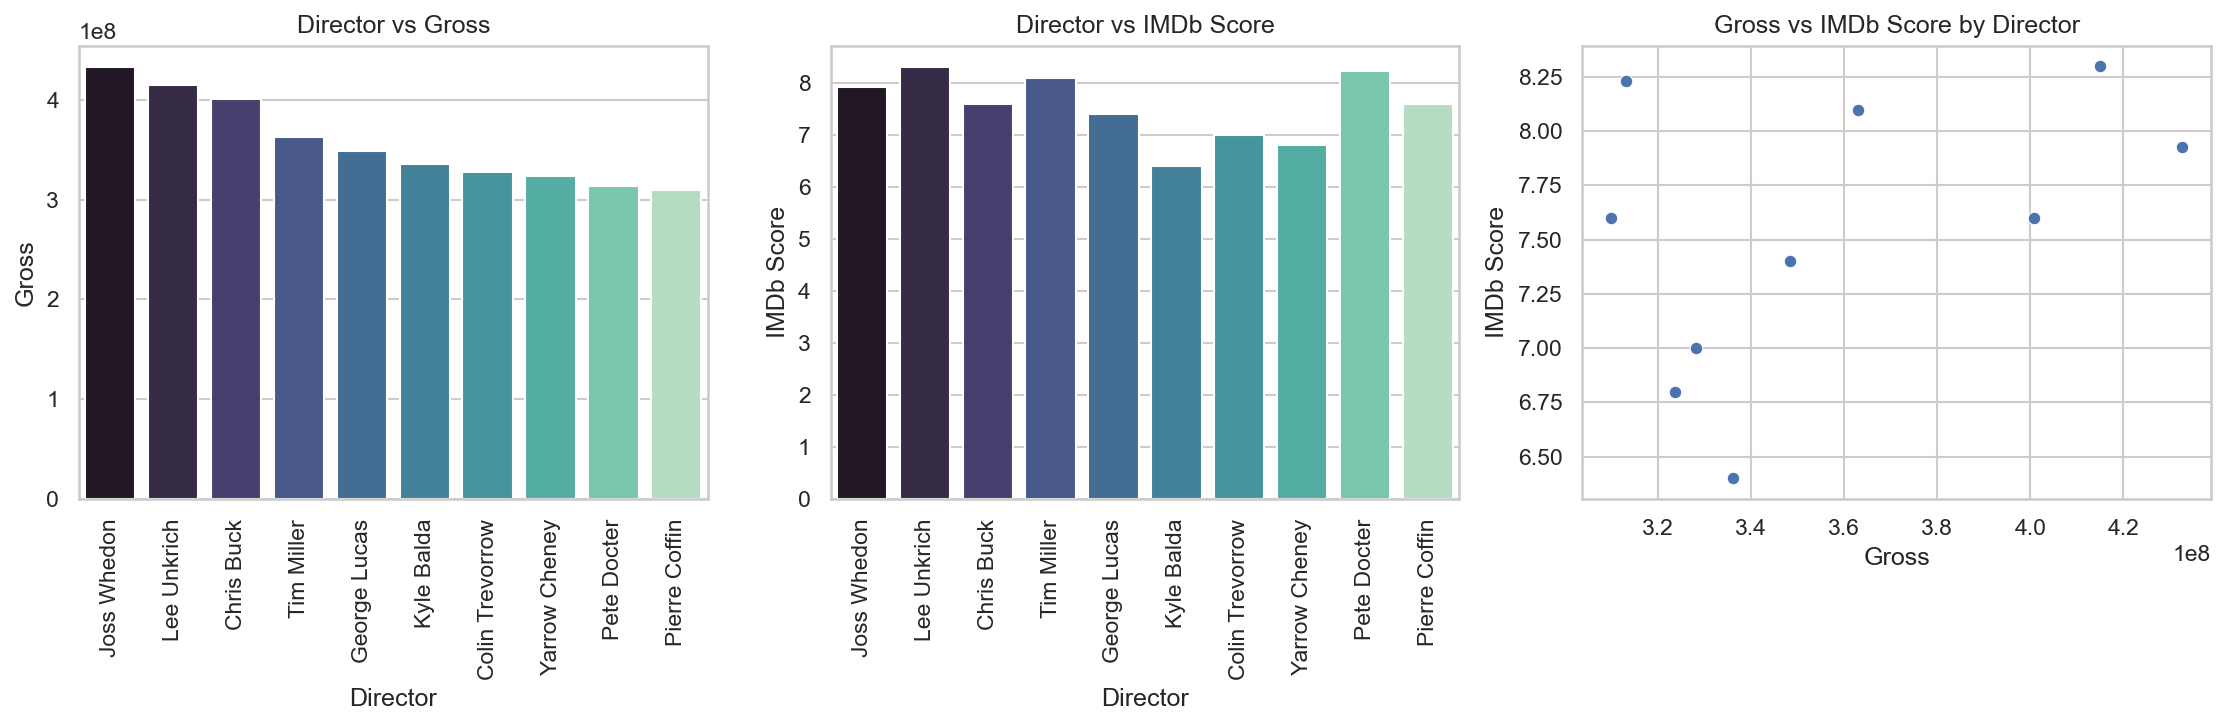

In [ ]:
director_gross = df.groupby('director_name').agg({'gross': 'mean'}).reset_index()
director_imdb = df.groupby('director_name').agg({'imdb_score': 'mean'}).reset_index()
director_gross = director_gross.sort_values(by='gross', ascending=False).head(10)
director_gross_based = director_gross.merge(director_imdb, on='director_name')
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.barplot(x='director_name', y='gross', data=director_gross_based, palette='mako', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Director')
axs[0].set_ylabel('Gross')
axs[0].set_title('Director vs Gross')

sns.barplot(x='director_name', y='imdb_score', data=director_gross_based, palette='mako', ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Director')
axs[1].set_ylabel('IMDb Score')
axs[1].set_title('Director vs IMDb Score')

sns.scatterplot(x='gross', y='imdb_score', data=director_gross_based, ax=axs[2])
axs[2].set_xlabel('Gross')
axs[2].set_ylabel('IMDb Score')
axs[2].set_title('Gross vs IMDb Score by Director')

plt.tight_layout()
plt.show()
